In [1]:
!which python

/Users/tirth/Desktop/accimap_env/bin/python


In [2]:
# Function to get file paths from the user
def get_file_paths():
    print("Enter the paths of the files you want to process (PNG or PDF).")
    print("Press Enter after each file. When you're done, just press Enter without typing a file path.")
    
    file_paths = []
    while True:
        file_path = input("Enter file path (or press Enter to finish): ").strip()
        if not file_path:  # Stop when the user presses Enter without input
            break
        if file_path.lower().endswith(('.png', '.pdf')):  # Accept only PNG or PDF files
            file_paths.append(file_path)
        else:
            print("Invalid file type. Please provide a PNG or PDF file.")
    
    return file_paths

# Call the function and store the selected file paths
global files_to_process  # Make the variable global so it can be accessed in other cells
files_to_process = get_file_paths()

# Display the selected files
if files_to_process:
    print("Selected files:")
    for file in files_to_process:
        print(file)
else:
    print("No files selected.")


Enter the paths of the files you want to process (PNG or PDF).
Press Enter after each file. When you're done, just press Enter without typing a file path.


Enter file path (or press Enter to finish):  /Users/tirth/Desktop/Accimap-Analysis-main/NewData/Airbus Zephyr.png
Enter file path (or press Enter to finish):  /Users/tirth/Desktop/Accimap-Analysis-main/NewData/Airship 11.png
Enter file path (or press Enter to finish):  /Users/tirth/Desktop/Accimap-Analysis-main/NewData/Ayres S2R & RPAS.png
Enter file path (or press Enter to finish):  


Selected files:
/Users/tirth/Desktop/Accimap-Analysis-main/NewData/Airbus Zephyr.png
/Users/tirth/Desktop/Accimap-Analysis-main/NewData/Airship 11.png
/Users/tirth/Desktop/Accimap-Analysis-main/NewData/Ayres S2R & RPAS.png


### Instructions for Running the Notebook

#### Overview
This notebook processes PNG and PDF files to extract specific features. If a PDF is provided, it will first be converted into PNG images, with each page saved as a separate PNG. The resulting PNGs will then be processed alongside any other provided PNG files.

#### Workflow
1. **Input Files**:
   - Users can upload PNG and PDF files.
   - If a PNG is provided, it will be processed directly without modification.
   - If a PDF is provided, it will be converted into PNG images, one for each page.

2. **PDF to PNG Conversion**:
   - **Library Used**: The `pdf2image` library is used for converting PDF pages into PNG images.
   - **Naming Convention**: Each page of the PDF is converted to a PNG file and saved in the same directory as the PDF, within a folder named `converted_files`. The naming format is:
     ```
     <original_filename>_convertedPNG_pg<page_number>.png
     ```
     For example, a PDF named `document.pdf` with 3 pages will generate:
     ```
     converted_files/document_convertedPNG_pg1.png
     converted_files/document_convertedPNG_pg2.png
     converted_files/document_convertedPNG_pg3.png
     ```
   - **Integration**: The paths of the converted PNG files are automatically added to the `files_to_process` list. This ensures seamless processing in subsequent steps.

3. **Processing**:
   - All PNG files, whether uploaded directly or generated from PDFs, are processed together in the final step.

#### Prerequisites
1. **Install Required Libraries**:
   Ensure the following Python libraries are installed:
   ```bash
   pip install pdf2image opencv-python-headless numpy
   ```
2. **Install Poppler for PDF Processing**:
   - **macOS (using Homebrew):**
     ```bash
     brew install poppler
     ```
   - **Linux (using APT):**
     ```bash
     sudo apt-get install poppler-utils
     ```
   - **Windows**:
     Download Poppler from [Poppler for Windows](https://blog.alivate.com.au/poppler-windows/), extract it, and add the `bin` folder to your system PATH.

#### Steps to Execute
1. **Run Cell 1**:
   - Input the file paths for the PNG and/or PDF files you want to process. Press Enter after each path. When finished, press Enter on an empty line.
2. **Run Cell 2**:
   - Converts all PDF files into PNGs. Converted PNGs are saved in a `converted_files` folder next to the respective PDFs.
   - All PNG paths (both directly uploaded and converted from PDFs) are added to `files_to_process`.
3. **Run Cell 3**:
   - Processes all PNG files in `files_to_process`.

#### Notes
- Ensure the file paths provided in **Cell 1** are correct.
- Any errors during processing will be logged in the console.
- The processed output (e.g., annotated PNGs) will be saved in designated folders based on your workflow.


In [3]:
from pdf2image import convert_from_path
import os

def convert_pdf_to_png(file_path, dpi=900):  # Default DPI set to 900
    """
    Converts a PDF file into PNG images, one per page, at 900 DPI resolution.
    Saves the images in a 'converted_files' directory next to the PDF.
    """
    # Ensure the output directory exists
    output_dir = os.path.join(os.path.dirname(file_path), "converted_files")
    os.makedirs(output_dir, exist_ok=True)

    # Extract the base name of the file (without extension)
    base_name = os.path.splitext(os.path.basename(file_path))[0]

    # Convert PDF to a list of images at the specified DPI
    try:
        images = convert_from_path(file_path, dpi=dpi)
    except Exception as e:
        print(f"[ERROR] Could not convert PDF: {file_path}. Error: {e}")
        return []

    output_paths = []

    # Save each page as a PNG
    for page_num, image in enumerate(images, start=1):
        output_path = os.path.join(output_dir, f"{base_name}_convertedPNG_pg{page_num}.png")
        image.save(output_path, "PNG")
        output_paths.append(output_path)
        print(f"[INFO] Saved: {output_path}")

    return output_paths

def process_pdfs(file_paths):
    """
    Process multiple PDF files, convert their pages to PNG,
    and update the global list 'files_to_process' with the converted PNG paths.
    """
    if not file_paths:
        print("[INFO] No PDF files to process.")
        return

    print(f"[INFO] PDF files to process: {len(file_paths)}")
    all_converted_paths = []

    for file_path in file_paths:
        if not os.path.exists(file_path):
            print(f"[ERROR] File not found: {file_path}")
            continue

        print(f"[INFO] Processing PDF: {file_path}")
        converted_paths = convert_pdf_to_png(file_path)
        all_converted_paths.extend(converted_paths)

    # Update the global 'files_to_process' to include the converted PNGs
    files_to_process.extend(all_converted_paths)

    print("\n[INFO] PDF conversion completed.")
    return all_converted_paths

# Filter out PDF files from the user-provided file list and process them
if 'files_to_process' in globals():
    pdf_files = [file for file in files_to_process if file.lower().endswith('.pdf')]
    process_pdfs(pdf_files)
else:
    print("[ERROR] 'files_to_process' not found. Please run Cell 1 first.")


[INFO] No PDF files to process.


In [4]:
import os
import cv2
import numpy as np

def process_image(image_path):
    """Process a single image to create the temp.png file."""
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Failed to load image: {image_path}")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply binary thresholding
    _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Detect contours (these should correspond to boxes)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank image to draw the contours (for visualization purposes)
    contour_image = np.zeros_like(image)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

    flowchart_image = np.zeros_like(contour_image)

    # Iterate through each contour and apply filtering
    for contour in contours:
        # Calculate the contour's perimeter (arcLength) to identify small/dotted lines
        contour_length = cv2.arcLength(contour, True)
        
        # Get the bounding rectangle for each contour
        x, y, w, h = cv2.boundingRect(contour)
        
        # Set thresholds to filter out text and dotted lines
        min_contour_length = 200  # Adjust this value based on your image (for dotted lines)
        min_text_width = 20  # Minimum width for potential text (adjust based on image)
        min_text_height = 20  # Minimum height for potential text (adjust based on image)
        
        # Filter out small/dotted lines and text contours
        if contour_length > min_contour_length and (w > min_text_width and h > min_text_height):
            # Draw remaining contours (that are not filtered out)
            cv2.drawContours(flowchart_image, [contour], -1, (0, 0, 255), 5)

    # Get the directory of the selected image
    output_dir = os.path.join(os.path.dirname(image_path), "processed_files")
    os.makedirs(output_dir, exist_ok=True)

    # Create the output path
    output_path = os.path.join(output_dir, f"{os.path.splitext(os.path.basename(image_path))[0]}_temp.png")

    # Save the temp image to the same location
    cv2.imwrite(output_path, flowchart_image)

    print(f"Temporary file saved at: {output_path}")
    return output_path

def process_files(file_paths):
    """Process multiple files to create temp images for all."""
    if not file_paths:
        print("[INFO] No files to process.")
        return

    print(f"[INFO] Files to process: {len(file_paths)}")
    temp_image_paths = []

    for file_path in file_paths:
        # Ensure only PNG files are processed
        if not file_path.lower().endswith('.png'):
            print(f"[WARNING] Skipping non-PNG file: {file_path}")
            continue

        if not os.path.exists(file_path):
            print(f"[ERROR] File not found: {file_path}")
            continue

        print(f"[INFO] Processing file: {file_path}")
        try:
            temp_path = process_image(file_path)
            temp_image_paths.append(temp_path)
        except Exception as e:
            print(f"[ERROR] Failed to process file {file_path}: {e}")

    print("\n[INFO] All files processed successfully.")
    return temp_image_paths

# Ensure this part is executed to process multiple files
if 'files_to_process' in globals():
    temp_files = process_files(files_to_process)
else:
    print("[ERROR] 'files_to_process' not found. Please run Cell 1 first.")


[INFO] Files to process: 3
[INFO] Processing file: /Users/tirth/Desktop/Accimap-Analysis-main/NewData/Airbus Zephyr.png
Temporary file saved at: /Users/tirth/Desktop/Accimap-Analysis-main/NewData/processed_files/Airbus Zephyr_temp.png
[INFO] Processing file: /Users/tirth/Desktop/Accimap-Analysis-main/NewData/Airship 11.png
Temporary file saved at: /Users/tirth/Desktop/Accimap-Analysis-main/NewData/processed_files/Airship 11_temp.png
[INFO] Processing file: /Users/tirth/Desktop/Accimap-Analysis-main/NewData/Ayres S2R & RPAS.png
Temporary file saved at: /Users/tirth/Desktop/Accimap-Analysis-main/NewData/processed_files/Ayres S2R & RPAS_temp.png

[INFO] All files processed successfully.


[INFO] Processing 3 files...
[INFO] Processing file: /Users/tirth/Desktop/Accimap-Analysis-main/NewData/processed_files/Airbus Zephyr_temp.png
[INFO] Labeled image saved at: processed_files/Airbus Zephyr_temp_labeled.png


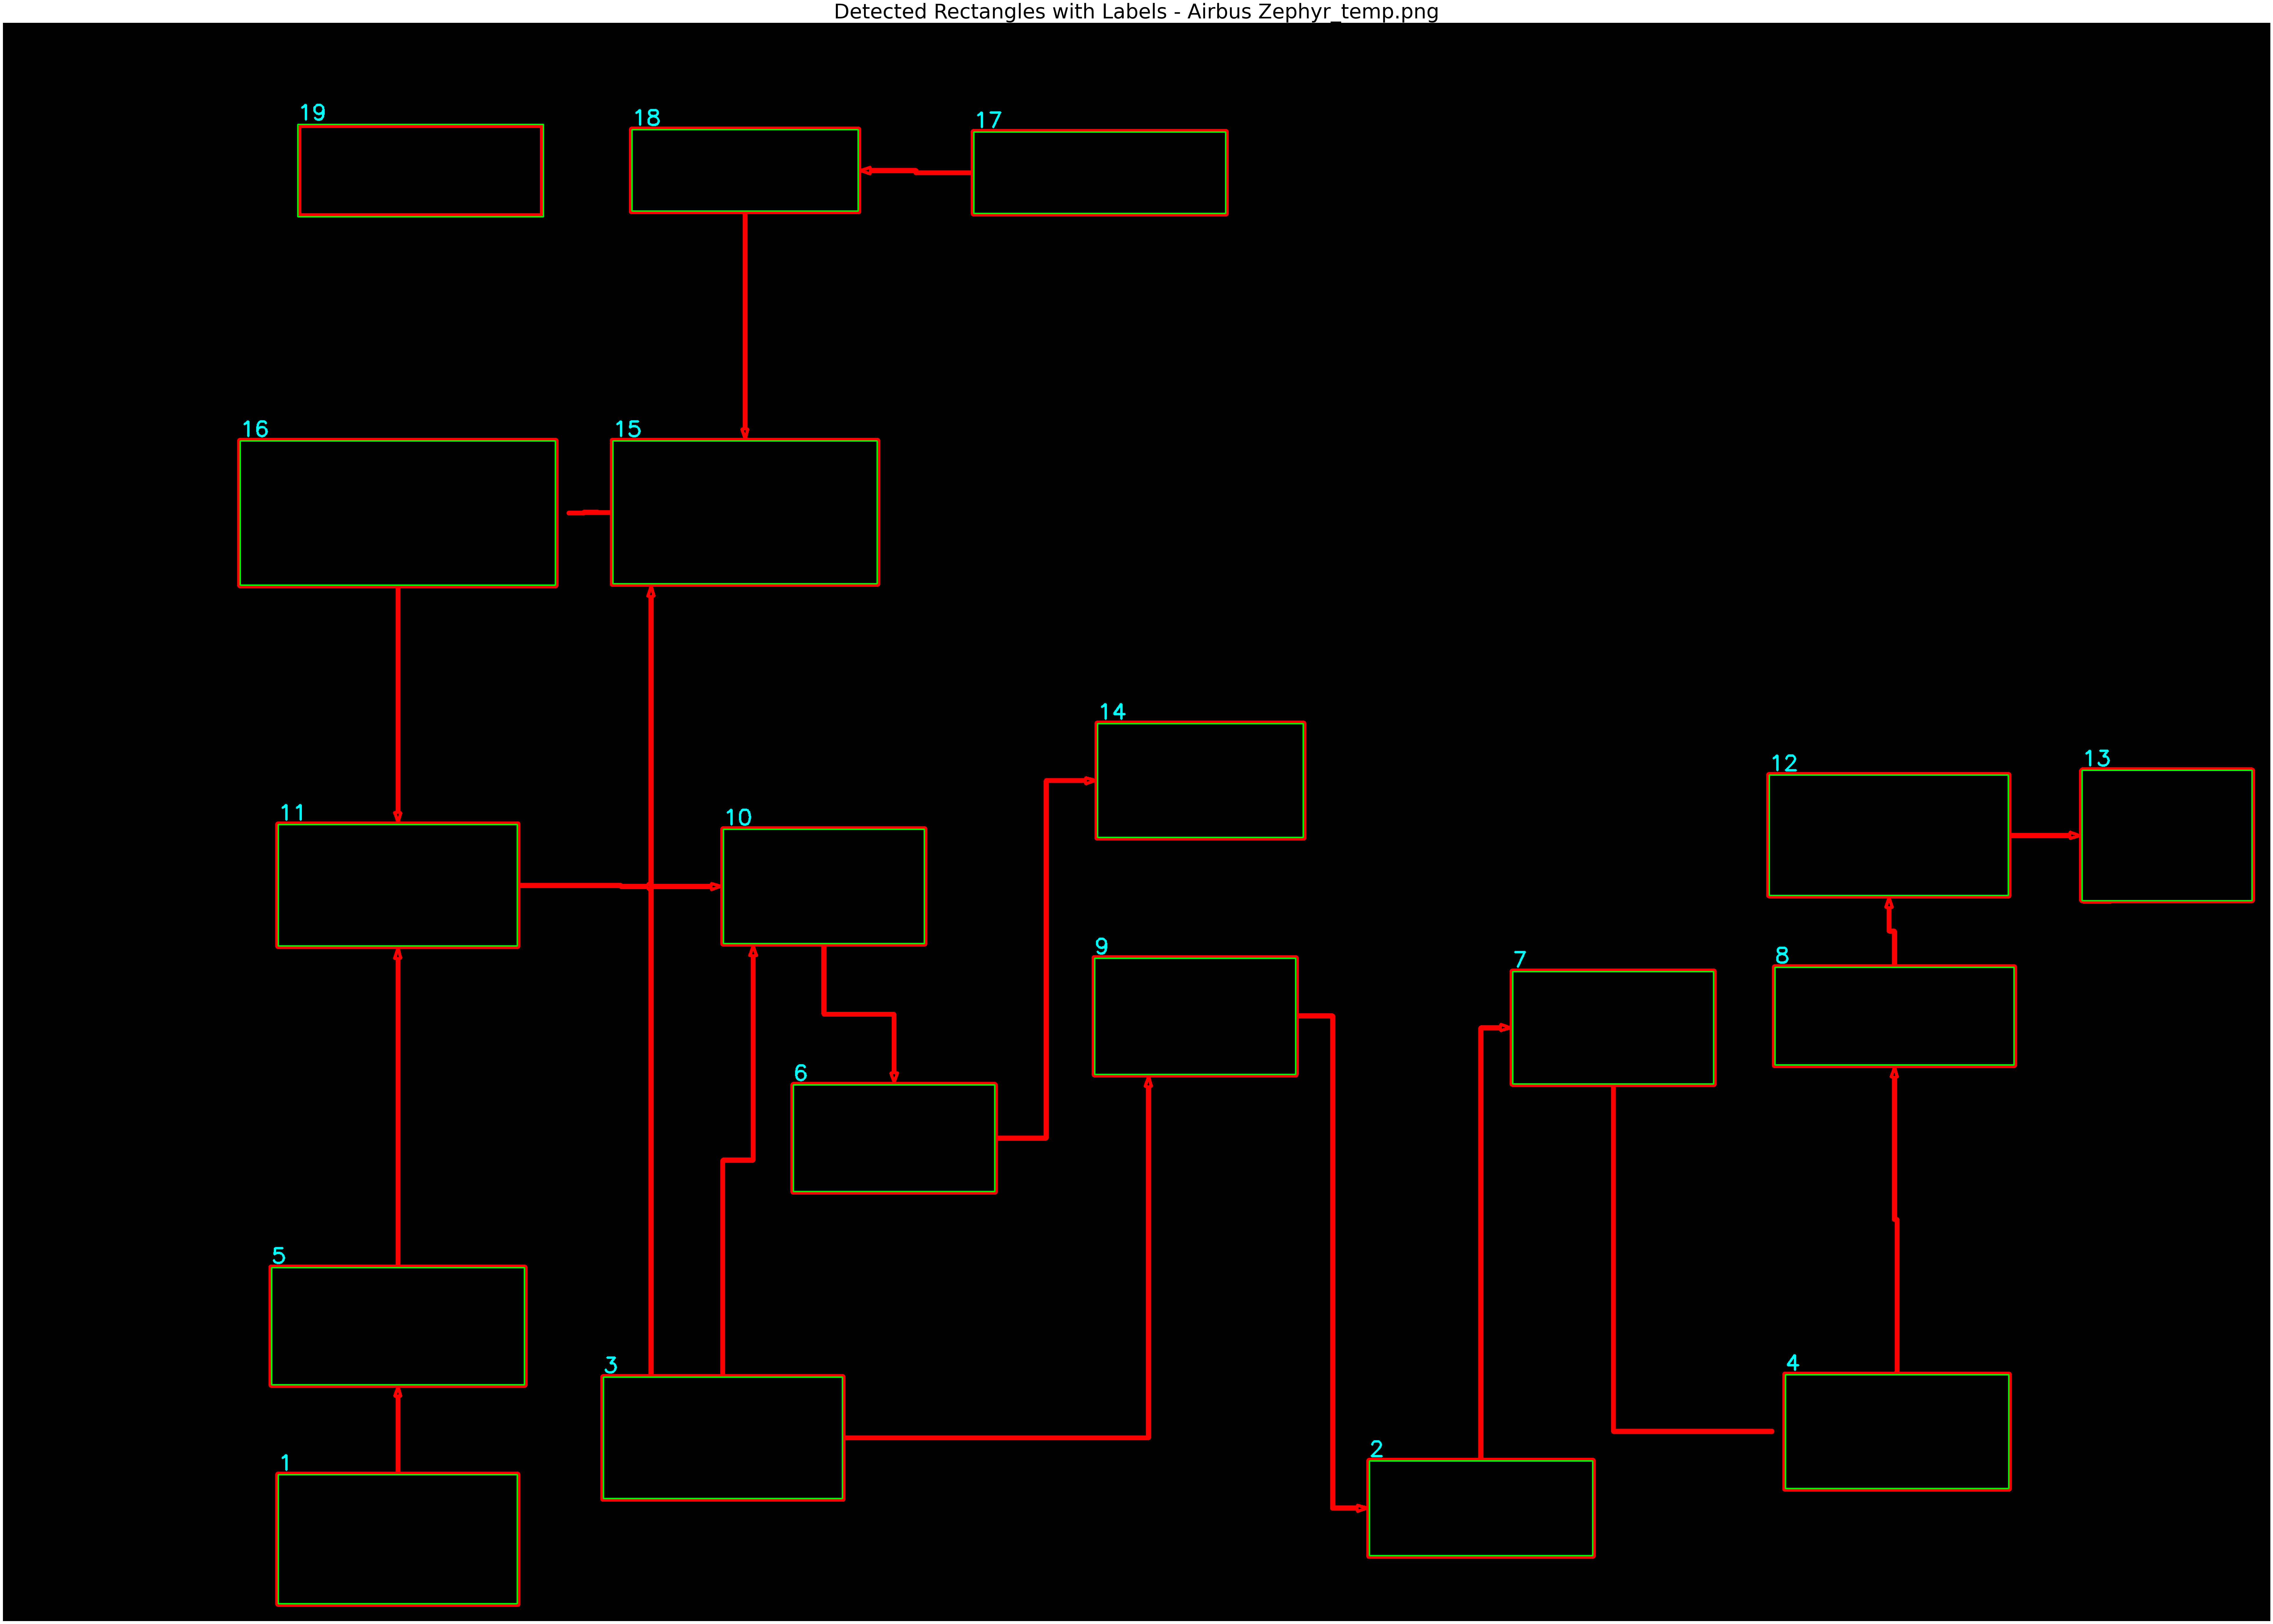

[INFO] Processing file: /Users/tirth/Desktop/Accimap-Analysis-main/NewData/processed_files/Airship 11_temp.png
[INFO] Labeled image saved at: processed_files/Airship 11_temp_labeled.png


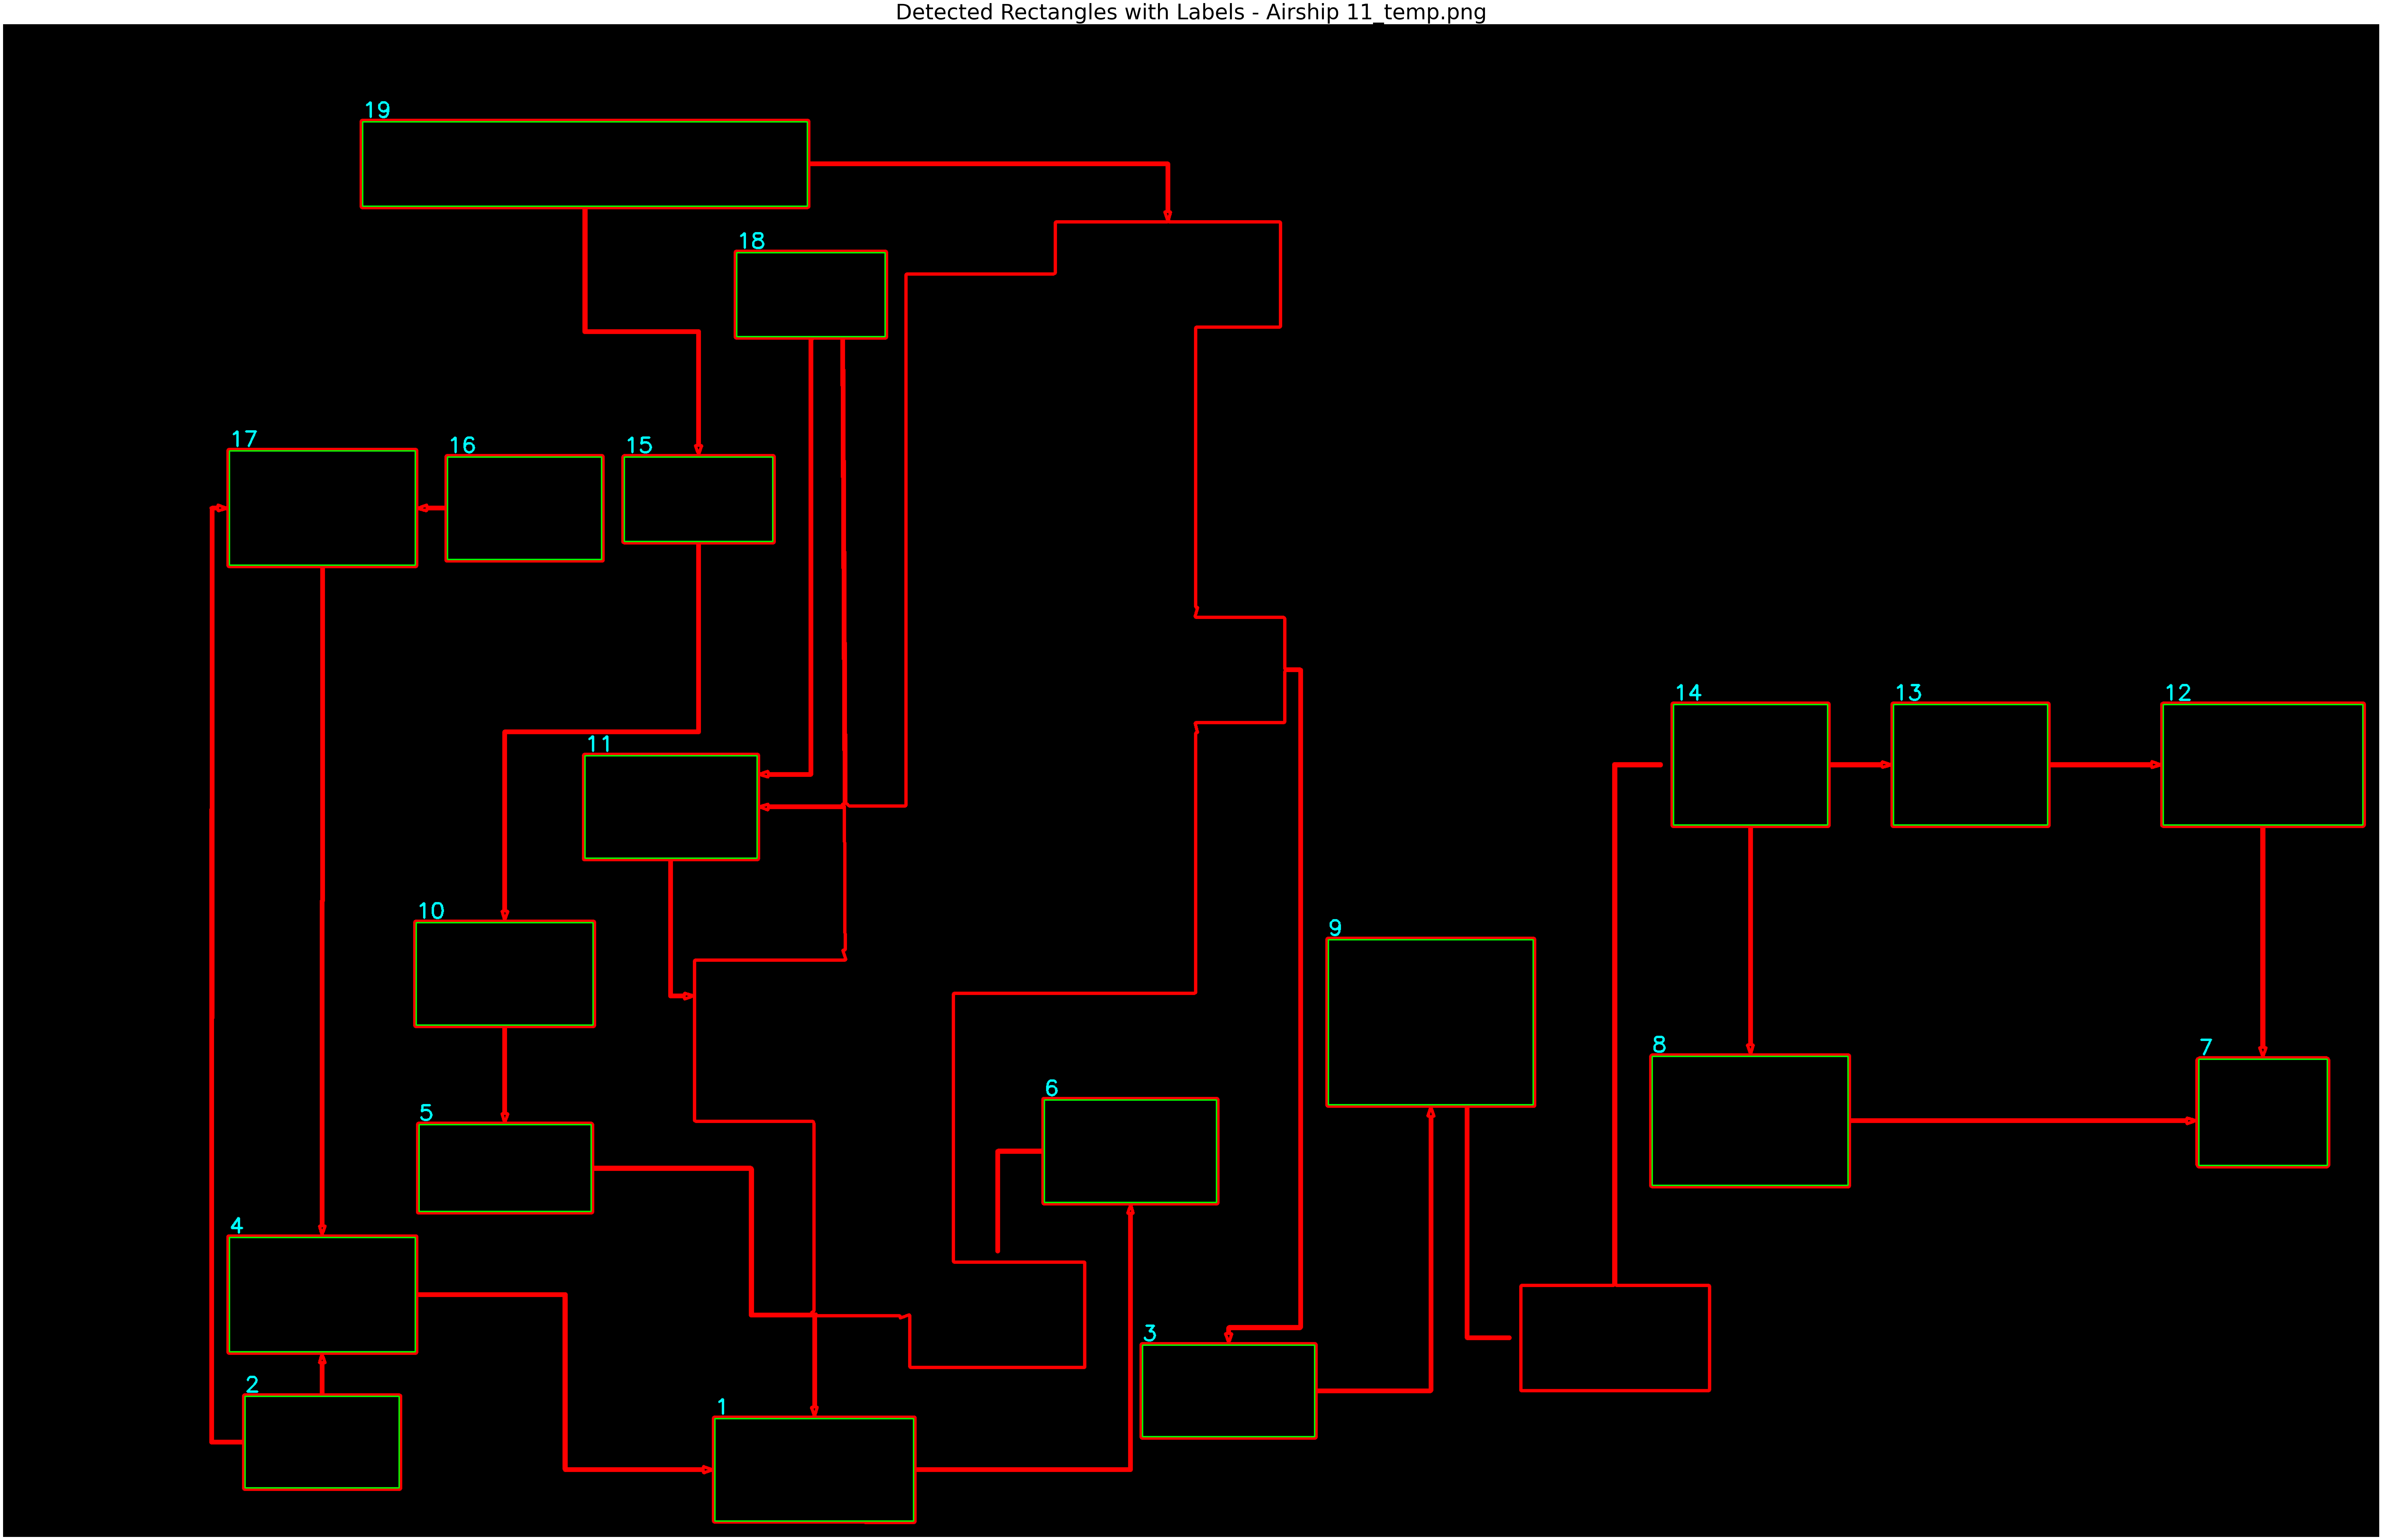

[INFO] Processing file: /Users/tirth/Desktop/Accimap-Analysis-main/NewData/processed_files/Ayres S2R & RPAS_temp.png
[INFO] Labeled image saved at: processed_files/Ayres S2R & RPAS_temp_labeled.png


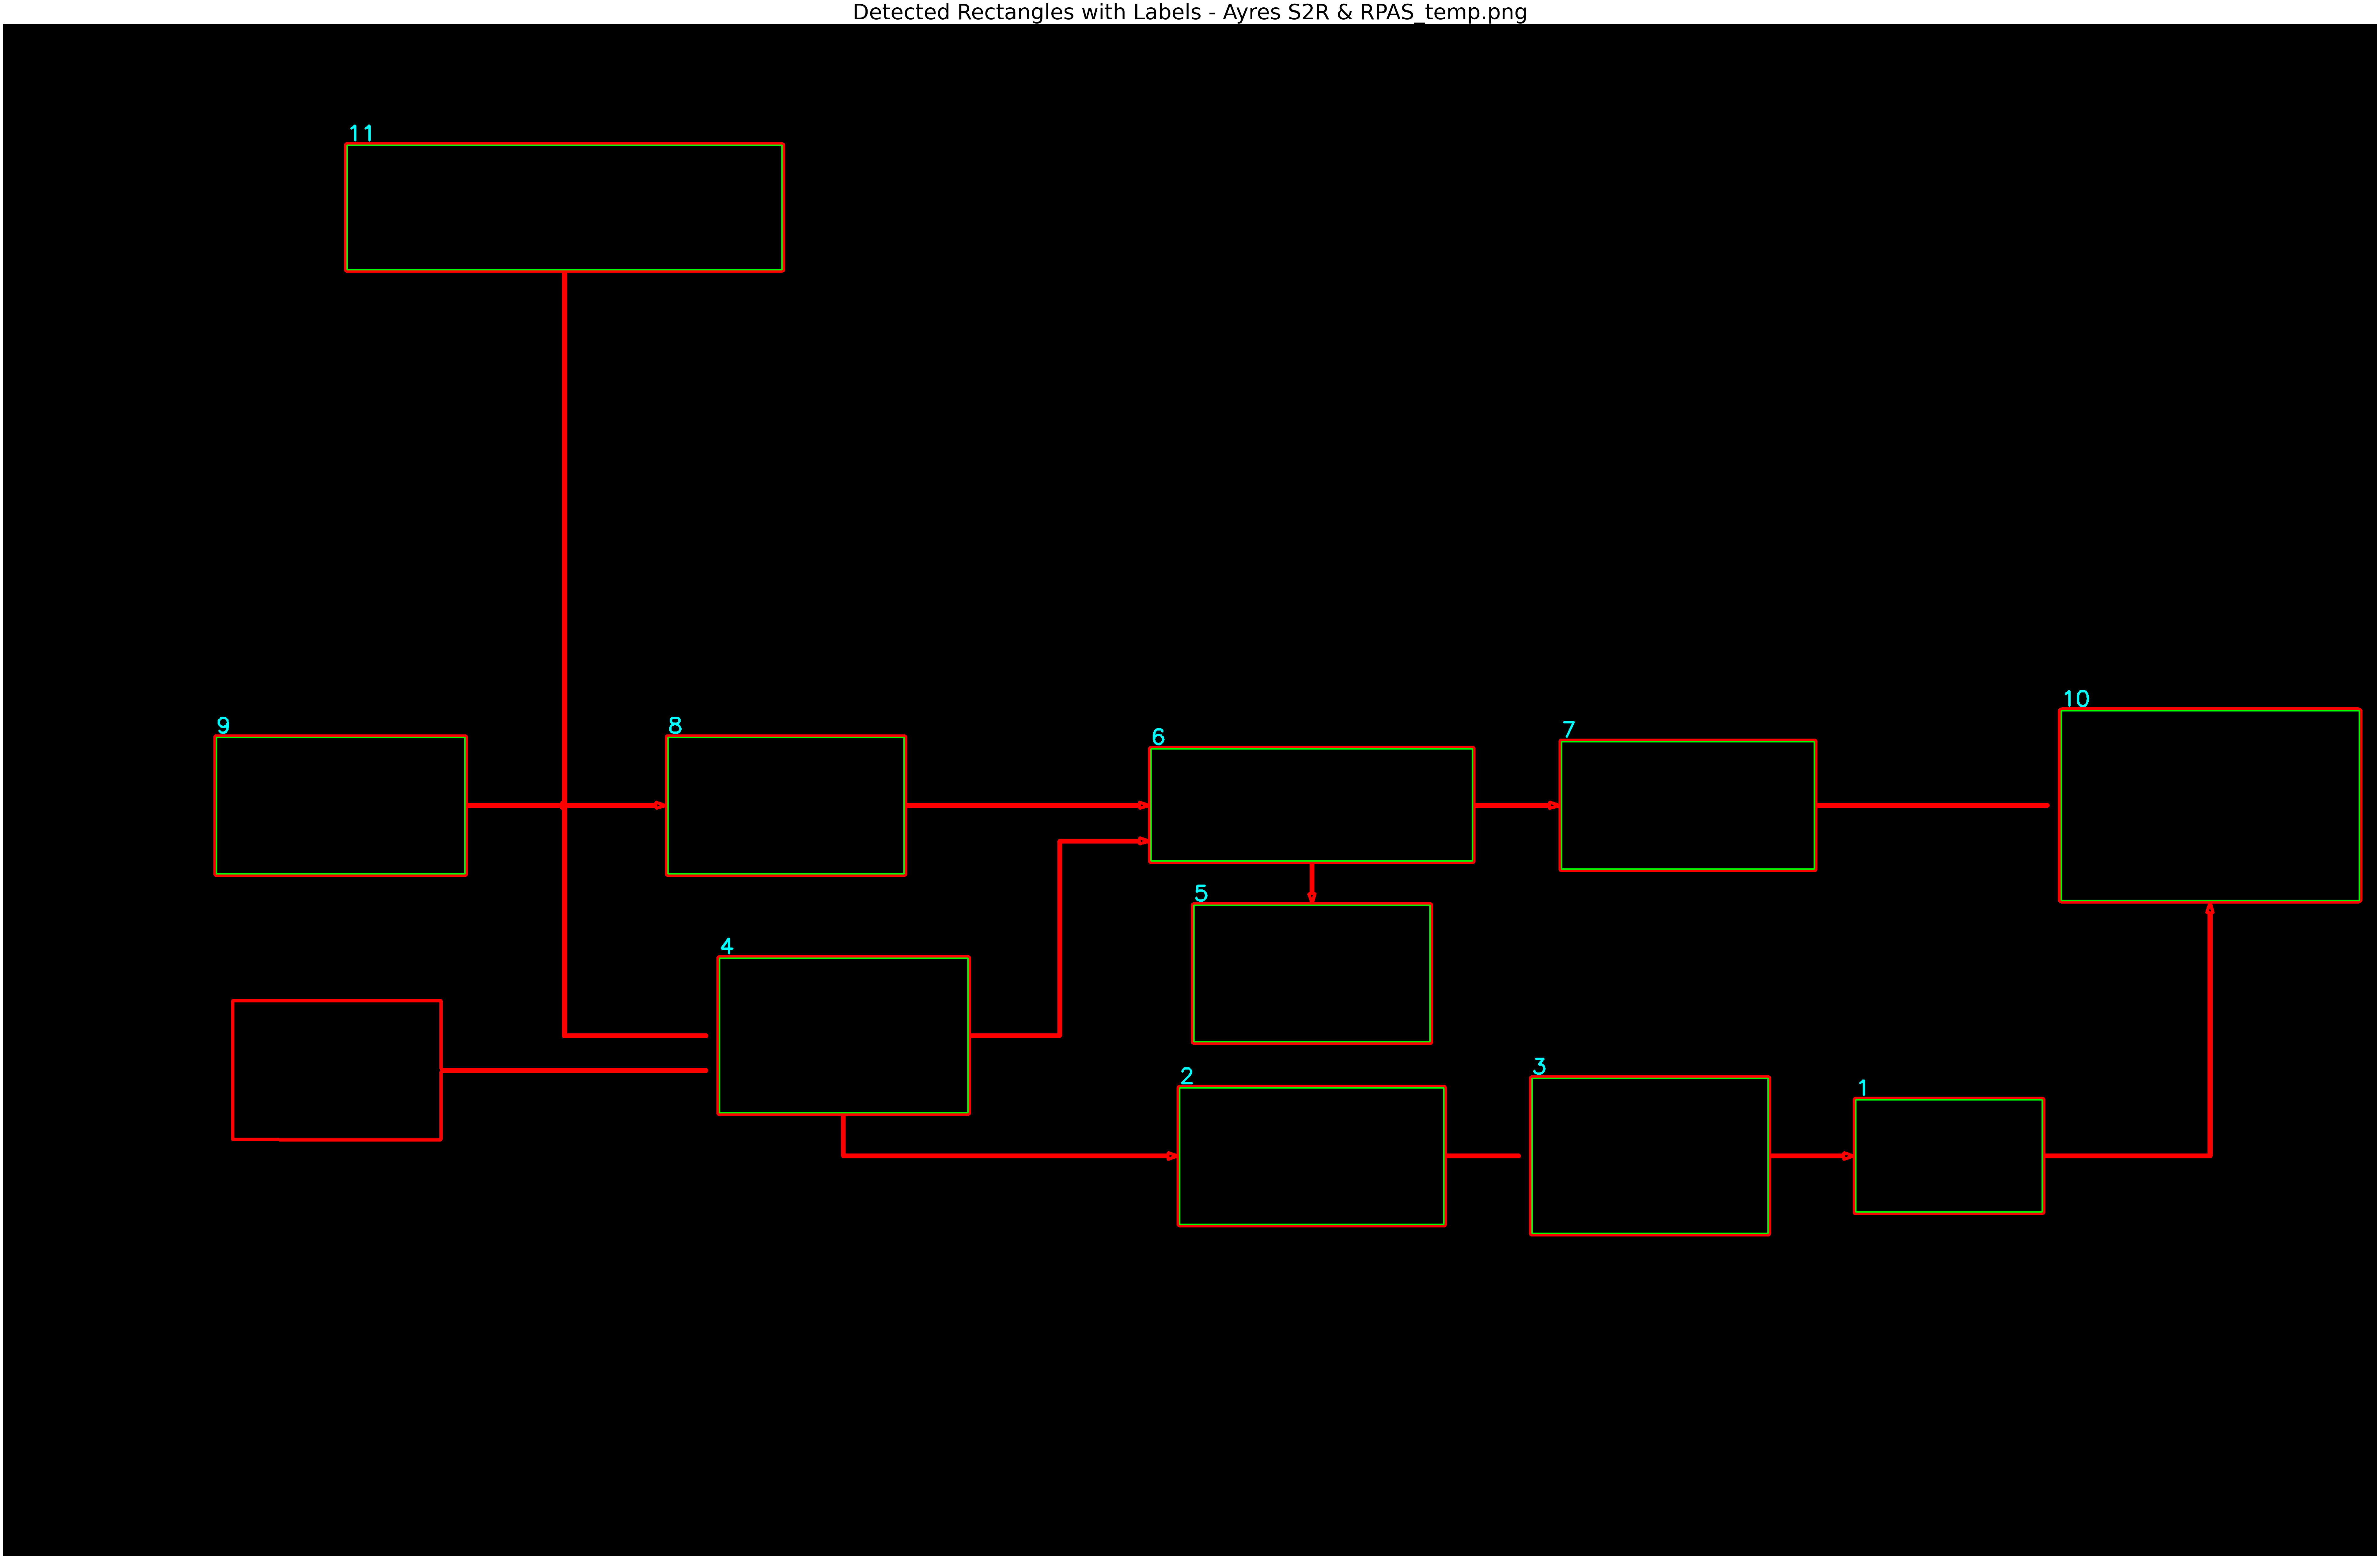

[INFO] Processing completed for all files.


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to check if a contour is a rectangle
def is_rectangle(approx):
    if len(approx) == 4:
        if cv2.isContourConvex(approx):
            x, y, w, h = cv2.boundingRect(approx)
            angles = []
            for i in range(4):
                p1, p2, p3 = approx[i][0], approx[(i+1) % 4][0], approx[(i+2) % 4][0]
                angle = np.arctan2(p2[1] - p1[1], p2[0] - p1[0]) - np.arctan2(p3[1] - p2[1], p3[0] - p2[0])
                angle = np.abs(np.degrees(angle))
                if angle > 180:
                    angle = 360 - angle
                angles.append(angle)
            return all(np.isclose(angle, 90, atol=10) for angle in angles)
    return False

def process_image(image_path):
    """Process a single temp.png image."""
    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Adjust Canny edge detection thresholds
    edges = cv2.Canny(gray, 50, 200, apertureSize=3)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Process contours
    rectangles = []
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if is_rectangle(approx):
            rectangles.append(approx)

    # Display the labeled rectangles for verification
    debug_img = img.copy()
    for i, rect in enumerate(rectangles):
        x, y, w, h = cv2.boundingRect(rect)
        cv2.rectangle(debug_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(debug_img, str(i + 1), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 0), 3)

    # Save the labeled image
    output_dir = "processed_files"
    os.makedirs(output_dir, exist_ok=True)
    labeled_image_path = os.path.join(output_dir, f"{os.path.splitext(os.path.basename(image_path))[0]}_labeled.png")
    cv2.imwrite(labeled_image_path, debug_img)
    print(f"[INFO] Labeled image saved at: {labeled_image_path}")

    # Display the image with labeled rectangles
    plt.figure(figsize=(100, 100))
    plt.title(f"Detected Rectangles with Labels - {os.path.basename(image_path)}", fontsize=50)
    plt.imshow(cv2.cvtColor(debug_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def process_files(temp_image_paths):
    """Process multiple temp images."""
    if not temp_image_paths:
        print("[INFO] No files to process.")
        return

    print(f"[INFO] Processing {len(temp_image_paths)} files...")
    for image_path in temp_image_paths:
        if not os.path.exists(image_path):
            print(f"[ERROR] File does not exist: {image_path}")
            continue

        print(f"[INFO] Processing file: {image_path}")
        process_image(image_path)

    print("[INFO] Processing completed for all files.")

# Ensure this part is executed to process multiple files
if 'temp_files' in globals():
    process_files(temp_files)
else:
    print("[ERROR] 'temp_files' not found. Please run the previous cell to generate temp images.")

In [6]:
from paddleocr import PaddleOCR
import cv2
import numpy as np
import json
import os

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Global list to store paths of generated JSON files with rectangles
if 'rectangle_json_files' not in globals():
    rectangle_json_files = []

# Function to check if a contour is a rectangle
def is_rectangle(approx):
    if len(approx) == 4:
        if cv2.isContourConvex(approx):
            x, y, w, h = cv2.boundingRect(approx)
            angles = []
            for i in range(4):
                p1, p2, p3 = approx[i][0], approx[(i+1) % 4][0], approx[(i+2) % 4][0]
                angle = np.arctan2(p2[1] - p1[1], p2[0] - p1[0]) - np.arctan2(p3[1] - p2[1], p3[0] - p2[0])
                angle = np.abs(np.degrees(angle))
                if angle > 180:
                    angle = 360 - angle
                angles.append(angle)
            return all(np.isclose(angle, 90, atol=10) for angle in angles)
    return False

def process_file(original_image_path, temp_image_path):
    """Process a single file: extract text from temp and original images."""
    print(f"[INFO] Processing file: {original_image_path} with {temp_image_path}")

    # Load the images
    processed_img = cv2.imread(temp_image_path)
    original_img = cv2.imread(original_image_path)

    # Convert processed image to grayscale for contour detection
    gray = cv2.cvtColor(processed_img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 200, apertureSize=3)

    # Find contours in the processed image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Detect rectangles
    rectangles = []
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if is_rectangle(approx):
            rectangles.append(approx)

    # Prepare to store text information along with coordinates
    rectangle_texts = []

    # Extract text from original image based on detected rectangles
    for i, rect in enumerate(rectangles):
        x, y, w, h = cv2.boundingRect(rect)

        # Crop the corresponding region from the original image
        cropped_img = original_img[y:y + h, x:x + w]

        try:
            # Perform OCR on the cropped region
            ocr_results = ocr.ocr(cropped_img, cls=True)
            extracted_text = " ".join([line[1][0] for line in ocr_results[0]])

            # Store text with rectangle label and coordinates
            rectangle_texts.append({
                "Rectangle No": i + 1,
                "Text": extracted_text,
                "Coordinates": [(x, y), (x + w, y), (x + w, y + h), (x, y + h)]  # Storing the 4 corners
            })

        except Exception as e:
            rectangle_texts.append({
                "Rectangle No": i + 1,
                "Text": f"Error during OCR: {e}",
                "Coordinates": []  # In case OCR fails, no coordinates are stored
            })

    # Save the results to a JSON file with a summary
    output_dir = "processed_files"
    os.makedirs(output_dir, exist_ok=True)
    json_output_path = os.path.join(output_dir, f"{os.path.splitext(os.path.basename(original_image_path))[0]}_text.json")
    output_data = {
        "summary": {"total_rectangles": len(rectangles), "file_name": os.path.basename(original_image_path)},
        "rectangles": rectangle_texts
    }
    with open(json_output_path, "w") as outfile:
        json.dump(output_data, outfile, indent=4)
    print(f"[INFO] Extracted text and coordinates saved at: {json_output_path}")

    # Add the JSON file path to the global rectangle_json_files list
    rectangle_json_files.append(json_output_path)

    # Display the labelled rectangles on the processed image with text overlay
    debug_img = processed_img.copy()
    for i, rect in enumerate(rectangles):
        x, y, w, h = cv2.boundingRect(rect)
        cv2.rectangle(debug_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(debug_img, str(i + 1), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 0), 3)
        # Overlay extracted text if available (wrapped to fit)
        text = rectangle_texts[i]["Text"]
        if "Error" not in text and text:
            font_scale = 0.5
            text_lines = [text[i:i+20] for i in range(0, len(text), 20)]  # Wrap text every 20 chars
            for j, line in enumerate(text_lines):
                cv2.putText(debug_img, line, (x, y + 20 + j * 20), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), 1)

    # Save the labelled image
    labeled_image_path = os.path.join(output_dir, f"{os.path.splitext(os.path.basename(original_image_path))[0]}_labeled.png")
    cv2.imwrite(labeled_image_path, debug_img)
    print(f"[INFO] Labeled image saved at: {labeled_image_path}")

    # Print the extracted text and coordinates with full wrapped text
    print(f"\nExtracted Text and Coordinates from {os.path.basename(original_image_path)}:")
    print("-" * 120)
    print(f"{'Rectangle':<12} | {'Text':<60} | {'Coordinates'}")
    print("-" * 120)
    for entry in rectangle_texts:
        rect_no = str(entry["Rectangle No"])
        text = entry["Text"]
        coords = str(entry["Coordinates"])
        # Wrap text at 40 characters
        text_lines = [text[i:i+60] for i in range(0, len(text), 60)]
        coord_lines = [coords[i:i+60] for i in range(0, len(coords), 60)]
        
        # Print first line with rectangle number
        print(f"{rect_no:<12} | {text_lines[0]:<60} | {coord_lines[0] if coord_lines else ''}")
        # Print subsequent wrapped lines
        for t_line, c_line in zip(text_lines[1:], coord_lines[1:] if len(coord_lines) > 1 else [""] * (len(text_lines) - 1)):
            print(f"{'':<12} | {t_line:<60} | {c_line}")
    print("-" * 120)

def process_files(original_image_paths, temp_image_paths):
    """Process multiple files using their respective original and temp images."""
    if not original_image_paths or not temp_image_paths:
        print("[INFO] No files to process.")
        return

    # Add progress tracking
    total_files = len(original_image_paths)
    for i, (original_path, temp_path) in enumerate(zip(original_image_paths, temp_image_paths), 1):
        if not os.path.exists(original_path) or not os.path.exists(temp_path):
            print(f"[ERROR] File not found: {original_path} or {temp_path}")
            continue
        print(f"[INFO] Processing {i}/{total_files}: {os.path.basename(original_path)}")
        process_file(original_path, temp_path)

    # Summary of processed files
    print("\n[INFO] Processing Completed")
    print("=" * 120)
    print(f"{'File':<40} | {'JSON Output':<50} | {'Labeled Image'}")
    print("=" * 120)
    for json_path in rectangle_json_files:
        base_name = os.path.splitext(os.path.basename(json_path))[0].replace("_text", "")
        print(f"{base_name:<40} | {json_path:<50} | {base_name}_labeled.png")
    print("=" * 120)

# Ensure this part is executed to process multiple files
if 'files_to_process' in globals() and 'temp_files' in globals():
    process_files(files_to_process, temp_files)
else:
    print("[ERROR] 'files_to_process' or 'temp_files' not found. Please run previous cells to generate the required data.")

/Users/tirth/Desktop/accimap_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[2025/03/19 12:24:03] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/tirth/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/tirth/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_le

[INFO] Processing 1/3: Airbus Zephyr_temp.png
[INFO] Number of lines detected: 81


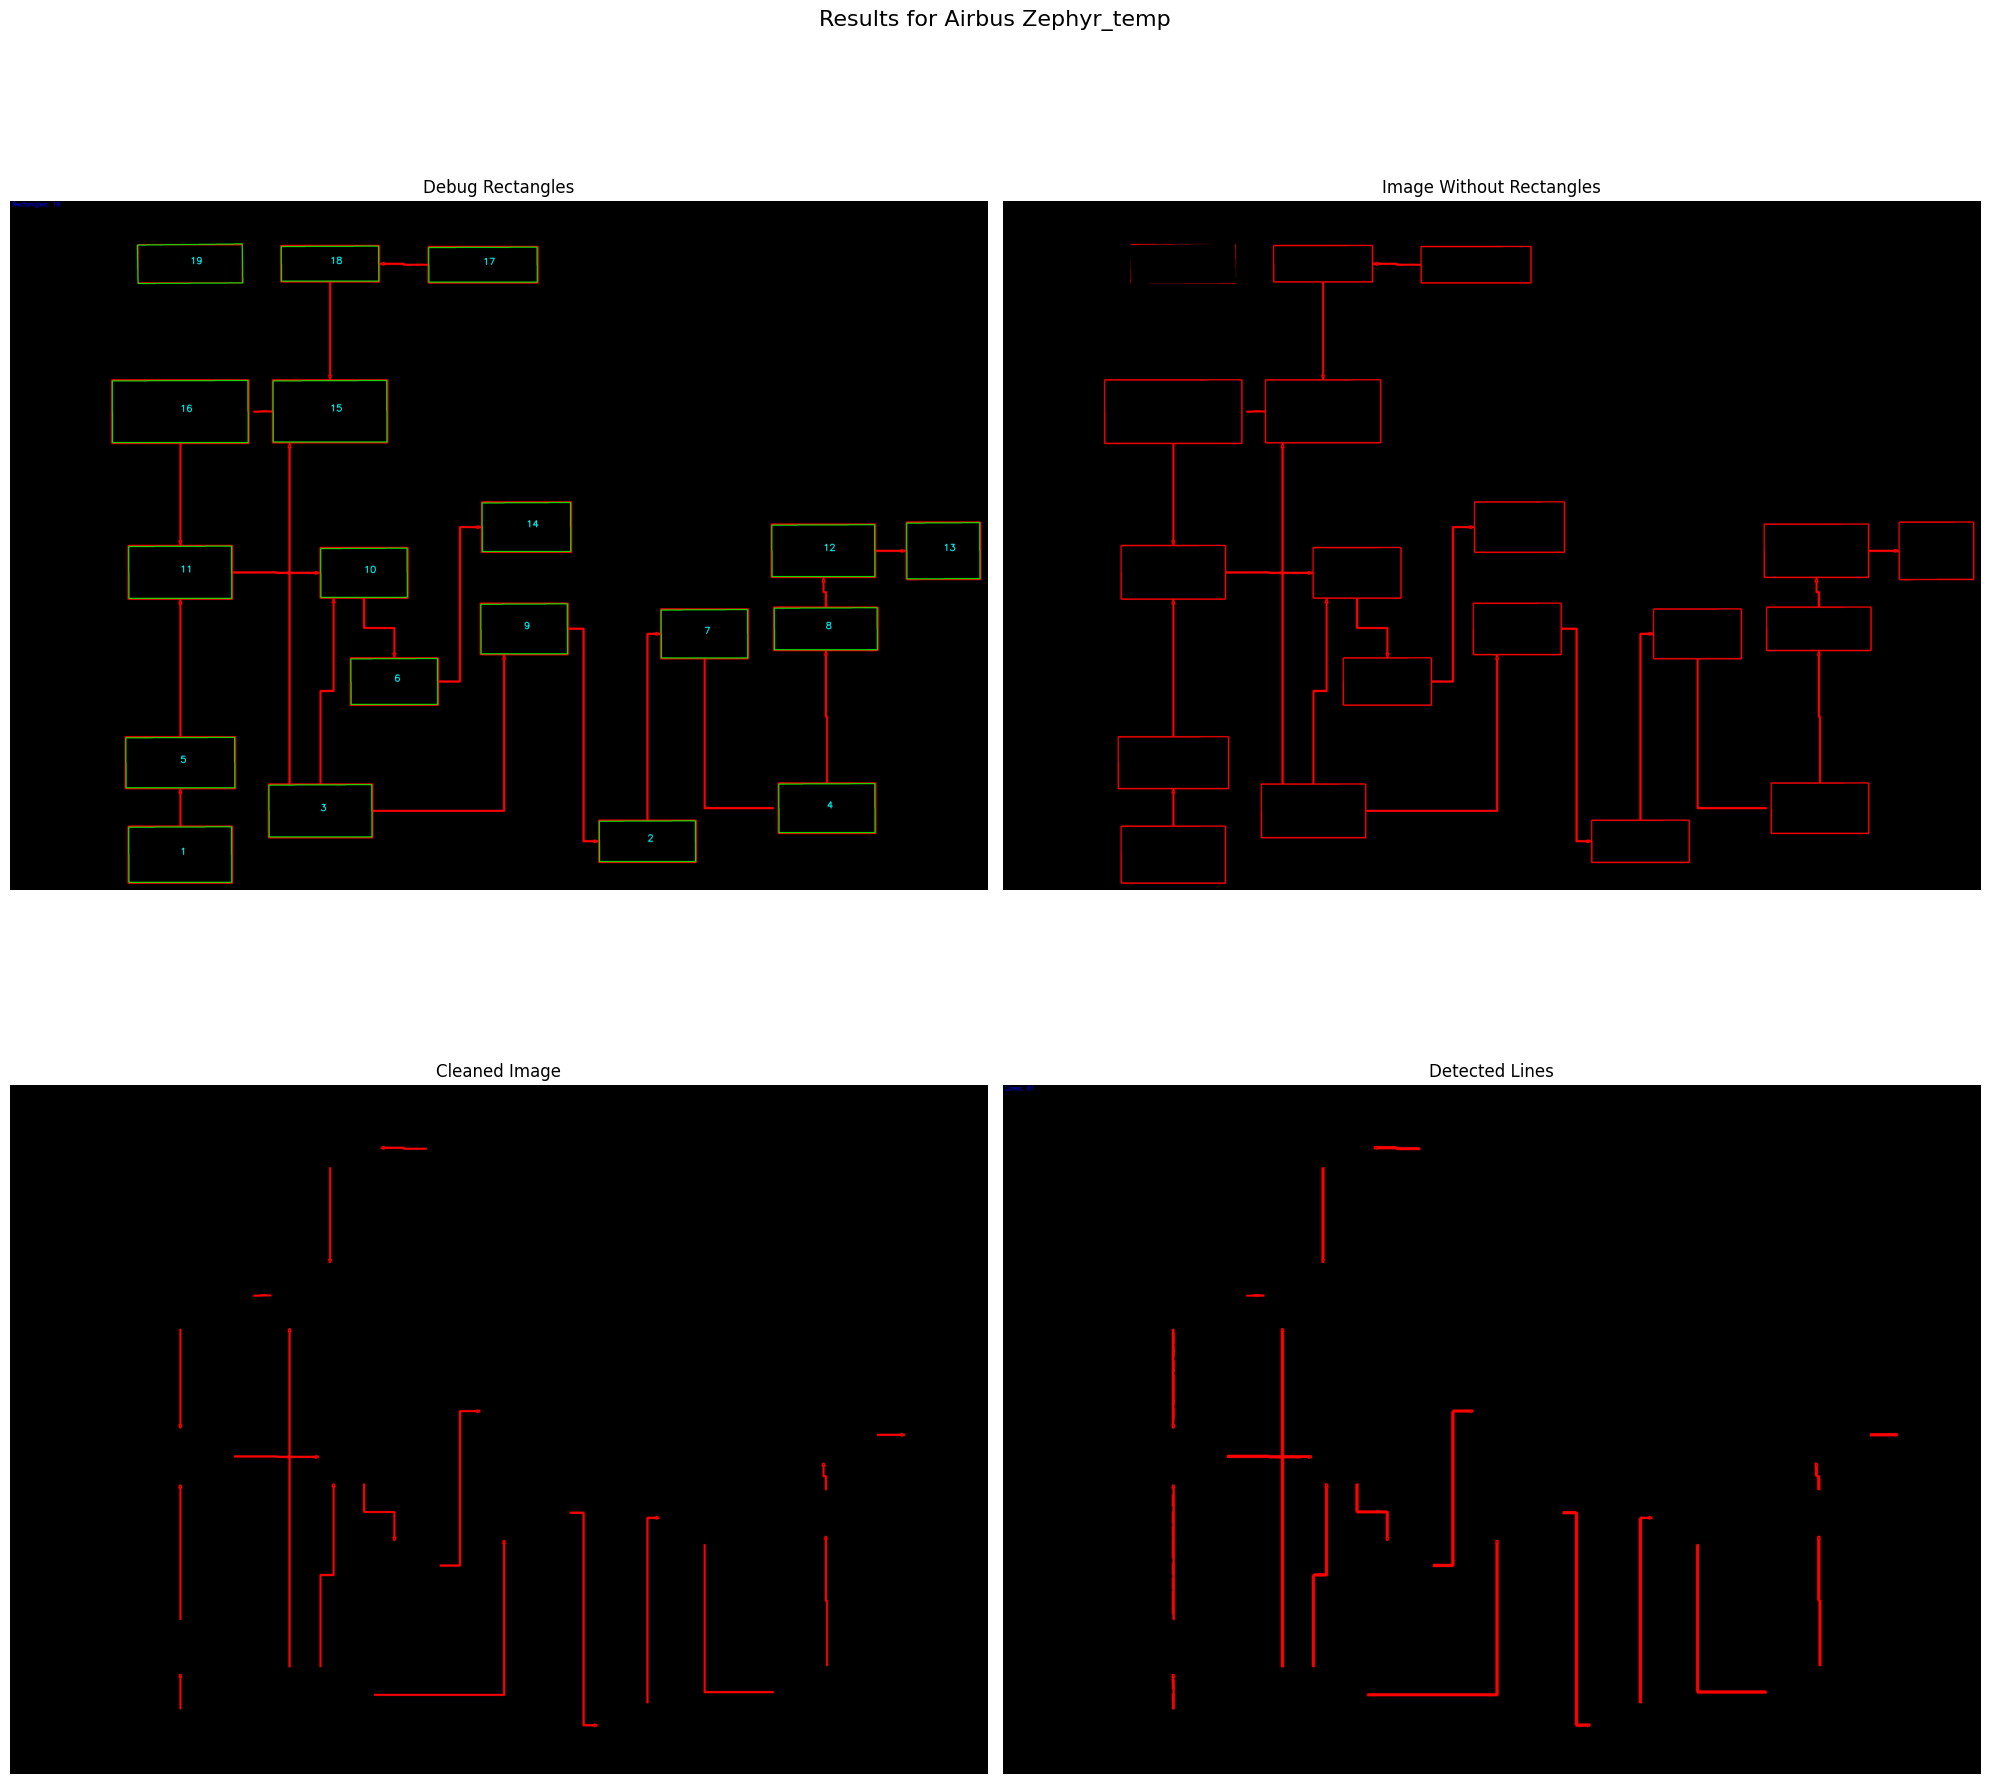

[INFO] Debug image saved at processed_files/Airbus Zephyr_temp_debug_rectangles.png
[INFO] Processing 2/3: Airship 11_temp.png
[INFO] Number of lines detected: 201


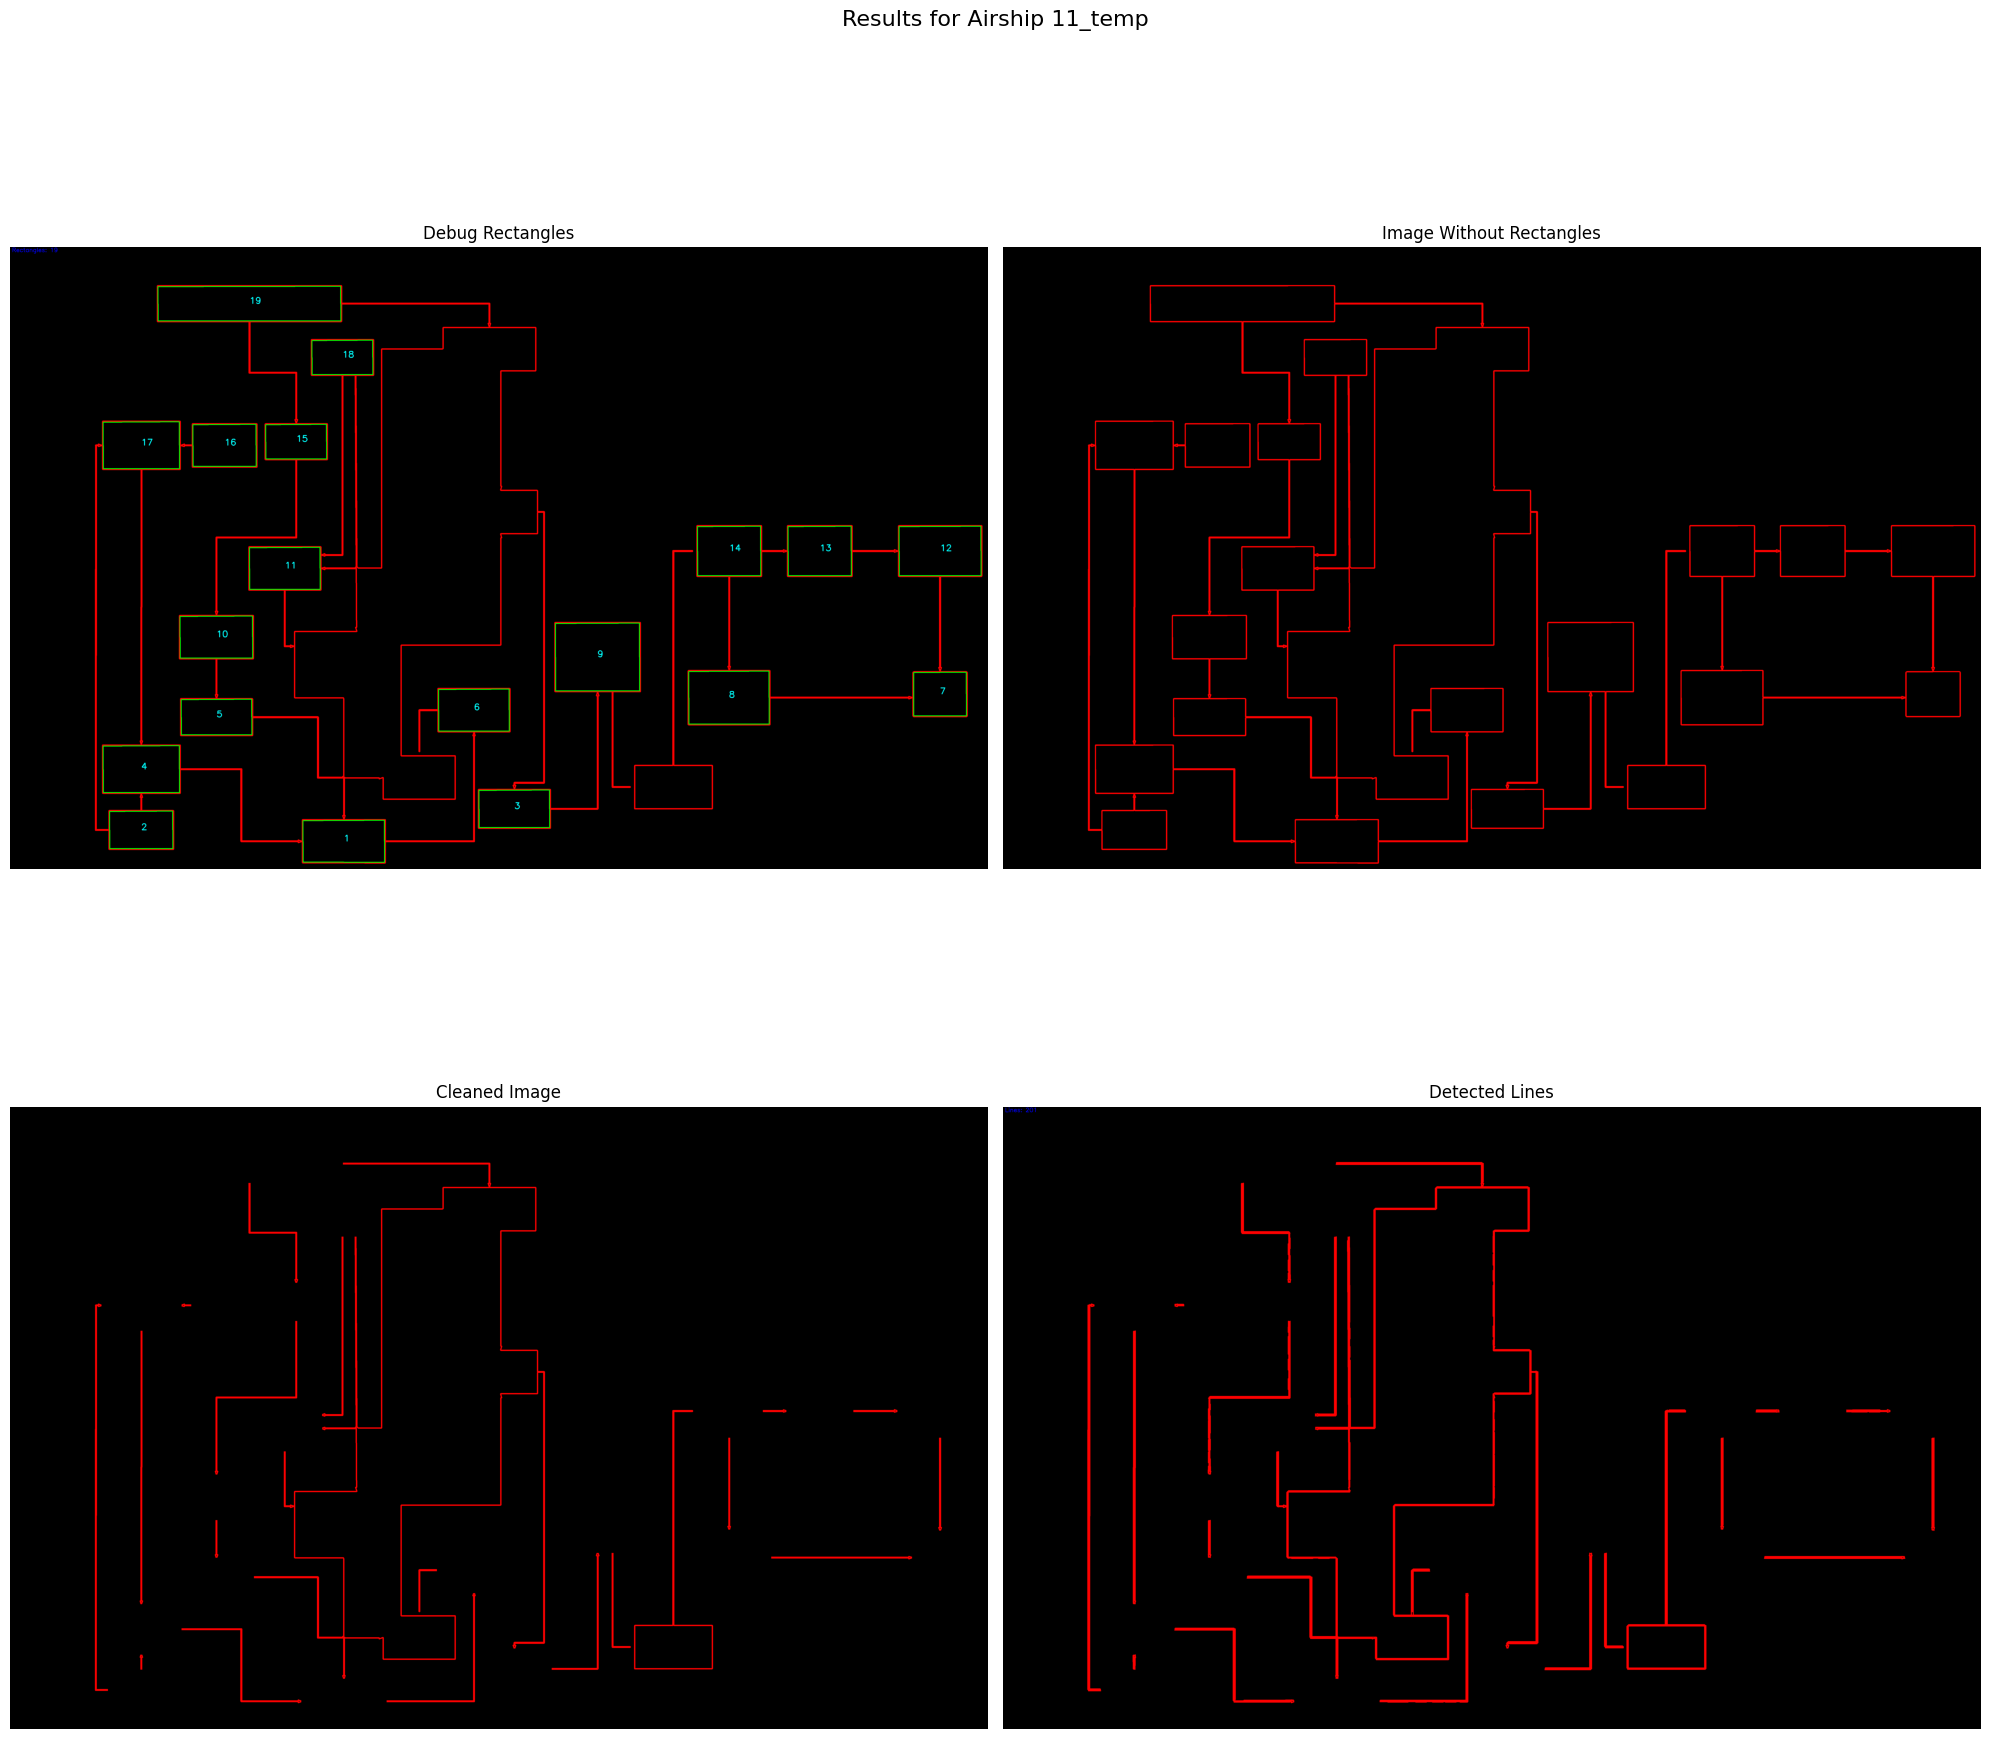

[INFO] Debug image saved at processed_files/Airship 11_temp_debug_rectangles.png
[INFO] Processing 3/3: Ayres S2R & RPAS_temp.png
[INFO] Number of lines detected: 87


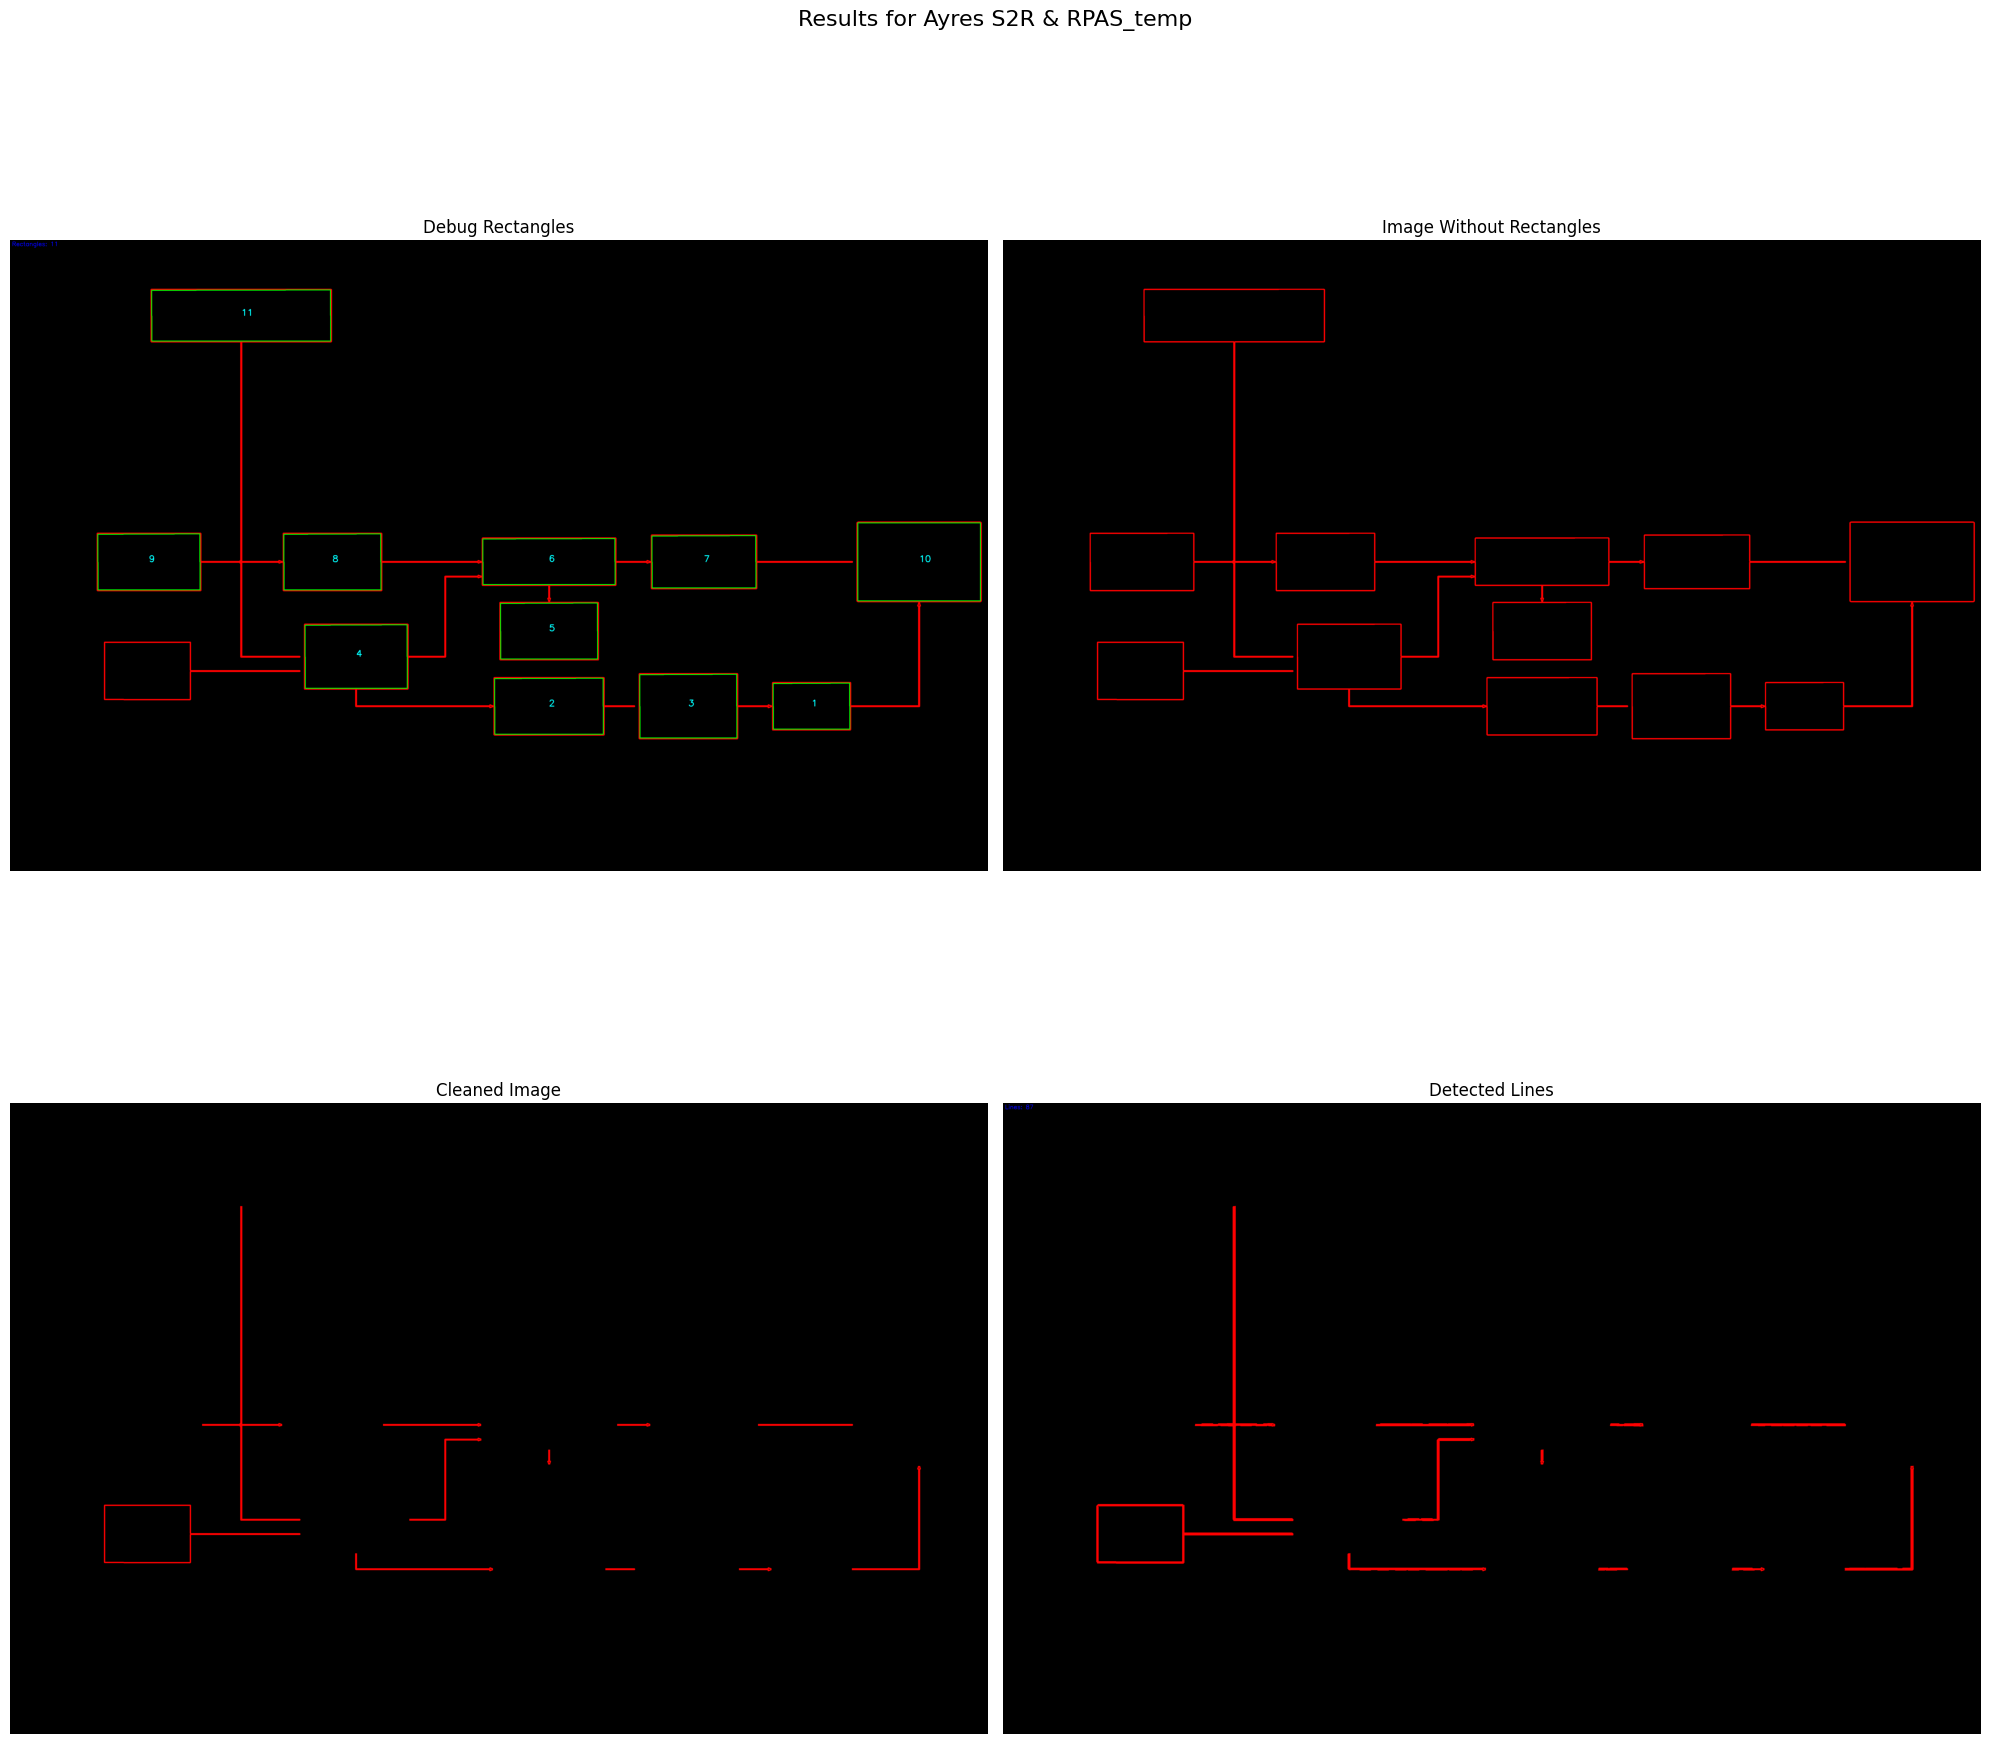

[INFO] Debug image saved at processed_files/Ayres S2R & RPAS_temp_debug_rectangles.png

[INFO] Processed 3 files:
File                                               | Rectangles   | Lines   
------------------------------------------------------------------------------------------------------------------------
Airbus Zephyr_temp                                 | 0            | 109     
Airship 11_temp                                    | 0            | 226     
Ayres S2R & RPAS_temp                              | 0            | 120     


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Global variables
processed_file_results = []
detected_line_files = []
debug_images = []

# Function to check if a contour is a rectangle
def is_rectangle(approx):
    """Check if a contour approximates a rectangle."""
    if len(approx) == 4:
        if cv2.isContourConvex(approx):
            x, y, w, h = cv2.boundingRect(approx)
            angles = []
            for i in range(4):
                p1, p2, p3 = approx[i][0], approx[(i+1) % 4][0], approx[(i+2) % 4][0]
                angle = np.arctan2(p2[1] - p1[1], p2[0] - p1[0]) - np.arctan2(p3[1] - p2[1], p3[0] - p2[0])
                angle = np.abs(np.degrees(angle))
                if angle > 180:
                    angle = 360 - angle
                angles.append(angle)
            return all(np.isclose(angle, 90, atol=10) for angle in angles)
    return False

def process_file(image_path, canny_low=50, canny_high=200, hough_threshold=30, hough_min_length=30, hough_max_gap=20, display=True):
    """Process a single image file to detect lines and rectangles with configurable parameters."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"[ERROR] Image not found: {image_path}")
        return None

    # Extract the base name of the file
    base_name = os.path.splitext(os.path.basename(image_path))[0]

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply edge detection
    edges = cv2.Canny(gray, canny_low, canny_high, apertureSize=3)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print(f"[WARNING] No contours detected in {base_name}")

    # Create blank images for masks and debug visualization
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    debug_img = img.copy()

    # Detect rectangles
    rectangles = []
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if is_rectangle(approx):
            rectangles.append(approx)

    # Draw rectangles on debug image and mask
    for i, rect in enumerate(rectangles):
        cv2.drawContours(mask, [rect], 0, (255), -1)
        cv2.drawContours(debug_img, [rect], 0, (0, 255, 0), 4)
        # Label each rectangle at centroid
        M = cv2.moments(rect)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.putText(debug_img, str(i+1), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 0), 3)
        else:
            print(f"[WARNING] Zero moment for rectangle {i+1} in {base_name}")

    # Create an inverted mask and clean the image in one step
    kernel = np.ones((10, 10), np.uint8)
    dilated_mask = cv2.dilate(mask, kernel, iterations=2)
    inverted_dilated_mask = cv2.bitwise_not(dilated_mask)
    result_clean = cv2.bitwise_and(img, img, mask=inverted_dilated_mask)

    # Detect edges in the cleaned image
    gray_clean = cv2.cvtColor(result_clean, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray_clean, (5, 5), 0)
    edges_clean = cv2.Canny(blurred, canny_low, canny_high - 50, apertureSize=3)

    # Detect lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges_clean, rho=1, theta=np.pi / 180, threshold=hough_threshold, 
                           minLineLength=hough_min_length, maxLineGap=hough_max_gap)
    line_img = result_clean.copy()
    if lines is not None:
        print(f"[INFO] Number of lines detected: {len(lines)}")
        for idx, line in enumerate(lines):
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 0, 255), 3)
    else:
        print(f"[INFO] No lines detected in {base_name}")

    # Save results
    output_dir = "processed_files"
    os.makedirs(output_dir, exist_ok=True)

    debug_path = os.path.join(output_dir, f"{base_name}_debug_rectangles.png")
    no_rectangles_path = os.path.join(output_dir, f"{base_name}_no_rectangles.png")
    cleaned_path = os.path.join(output_dir, f"{base_name}_cleaned.png")
    lines_detected_path = os.path.join(output_dir, f"{base_name}_lines_detected.png")

    cv2.imwrite(debug_path, debug_img)
    cv2.imwrite(no_rectangles_path, cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask)))
    cv2.imwrite(cleaned_path, result_clean)
    cv2.imwrite(lines_detected_path, line_img)

    # Add text overlays for context
    cv2.putText(debug_img, f"Rectangles: {len(rectangles)}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.putText(line_img, f"Lines: {len(lines) if lines is not None else 0}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Store paths in global variables
    processed_file_results.append({
        "file": base_name,
        "debug_rectangles": debug_path,
        "no_rectangles": no_rectangles_path,
        "cleaned": cleaned_path,
        "lines_detected": lines_detected_path,
    })
    debug_images.append(debug_img)

    # Display results if enabled
    if display:
        fig, axs = plt.subplots(2, 2, figsize=(20, 20))
        fig.suptitle(f"Results for {base_name}", fontsize=16)

        axs[0, 0].imshow(cv2.cvtColor(debug_img, cv2.COLOR_BGR2RGB))
        axs[0, 0].set_title("Debug Rectangles")
        axs[0, 0].axis('off')

        axs[0, 1].imshow(cv2.cvtColor(cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask)), cv2.COLOR_BGR2RGB))
        axs[0, 1].set_title("Image Without Rectangles")
        axs[0, 1].axis('off')

        axs[1, 0].imshow(cv2.cvtColor(result_clean, cv2.COLOR_BGR2RGB))
        axs[1, 0].set_title("Cleaned Image")
        axs[1, 0].axis('off')

        axs[1, 1].imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
        axs[1, 1].set_title("Detected Lines")
        axs[1, 1].axis('off')

        plt.tight_layout()
        plt.show()  # Restored to show the 2x2 grid like your original code

    print(f"[INFO] Debug image saved at {debug_path}")

def process_files(temp_image_paths, **kwargs):
    """Process multiple image files."""
    global detected_line_files, processed_file_results, debug_images
    if not temp_image_paths:
        print("[INFO] No files to process.")
        return

    # Reset global lists to avoid accumulation
    processed_file_results.clear()
    detected_line_files.clear()
    debug_images.clear()

    total_files = len(temp_image_paths)
    for i, image_path in enumerate(temp_image_paths, 1):
        if not os.path.exists(image_path):
            print(f"[ERROR] File not found: {image_path}")
            continue
        print(f"[INFO] Processing {i}/{total_files}: {os.path.basename(image_path)}")
        process_file(image_path, **kwargs)

    detected_line_files = [result["lines_detected"] for result in processed_file_results]
    print(f"\n[INFO] Processed {len(detected_line_files)} files:")
    print(f"{'File':<50} | {'Rectangles':<12} | {'Lines':<8}")
    print("-" * 120)
    for result in processed_file_results:
        debug_img = cv2.imread(result["debug_rectangles"])
        lines = cv2.HoughLinesP(cv2.Canny(cv2.cvtColor(cv2.imread(result["cleaned"]), cv2.COLOR_BGR2GRAY), 50, 150), 
                               1, np.pi / 180, 30, 30, 20)
        print(f"{result['file']:<50} | {len([c for c in cv2.findContours(cv2.Canny(cv2.cvtColor(debug_img, cv2.COLOR_BGR2GRAY), 50, 200), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0] if is_rectangle(c)]):<12} | {len(lines) if lines is not None else 0:<8}")

# Ensure the function is executed
if 'temp_files' in globals():
    process_files(temp_files)
else:
    print("[ERROR] 'temp_files' not found. Please provide a valid list of image paths.")

[INFO] Processing 1/3: Airbus Zephyr_temp_lines_detected.png
[INFO] Line data saved at: processed_files/Airbus Zephyr_temp_lines_detected_lines.json


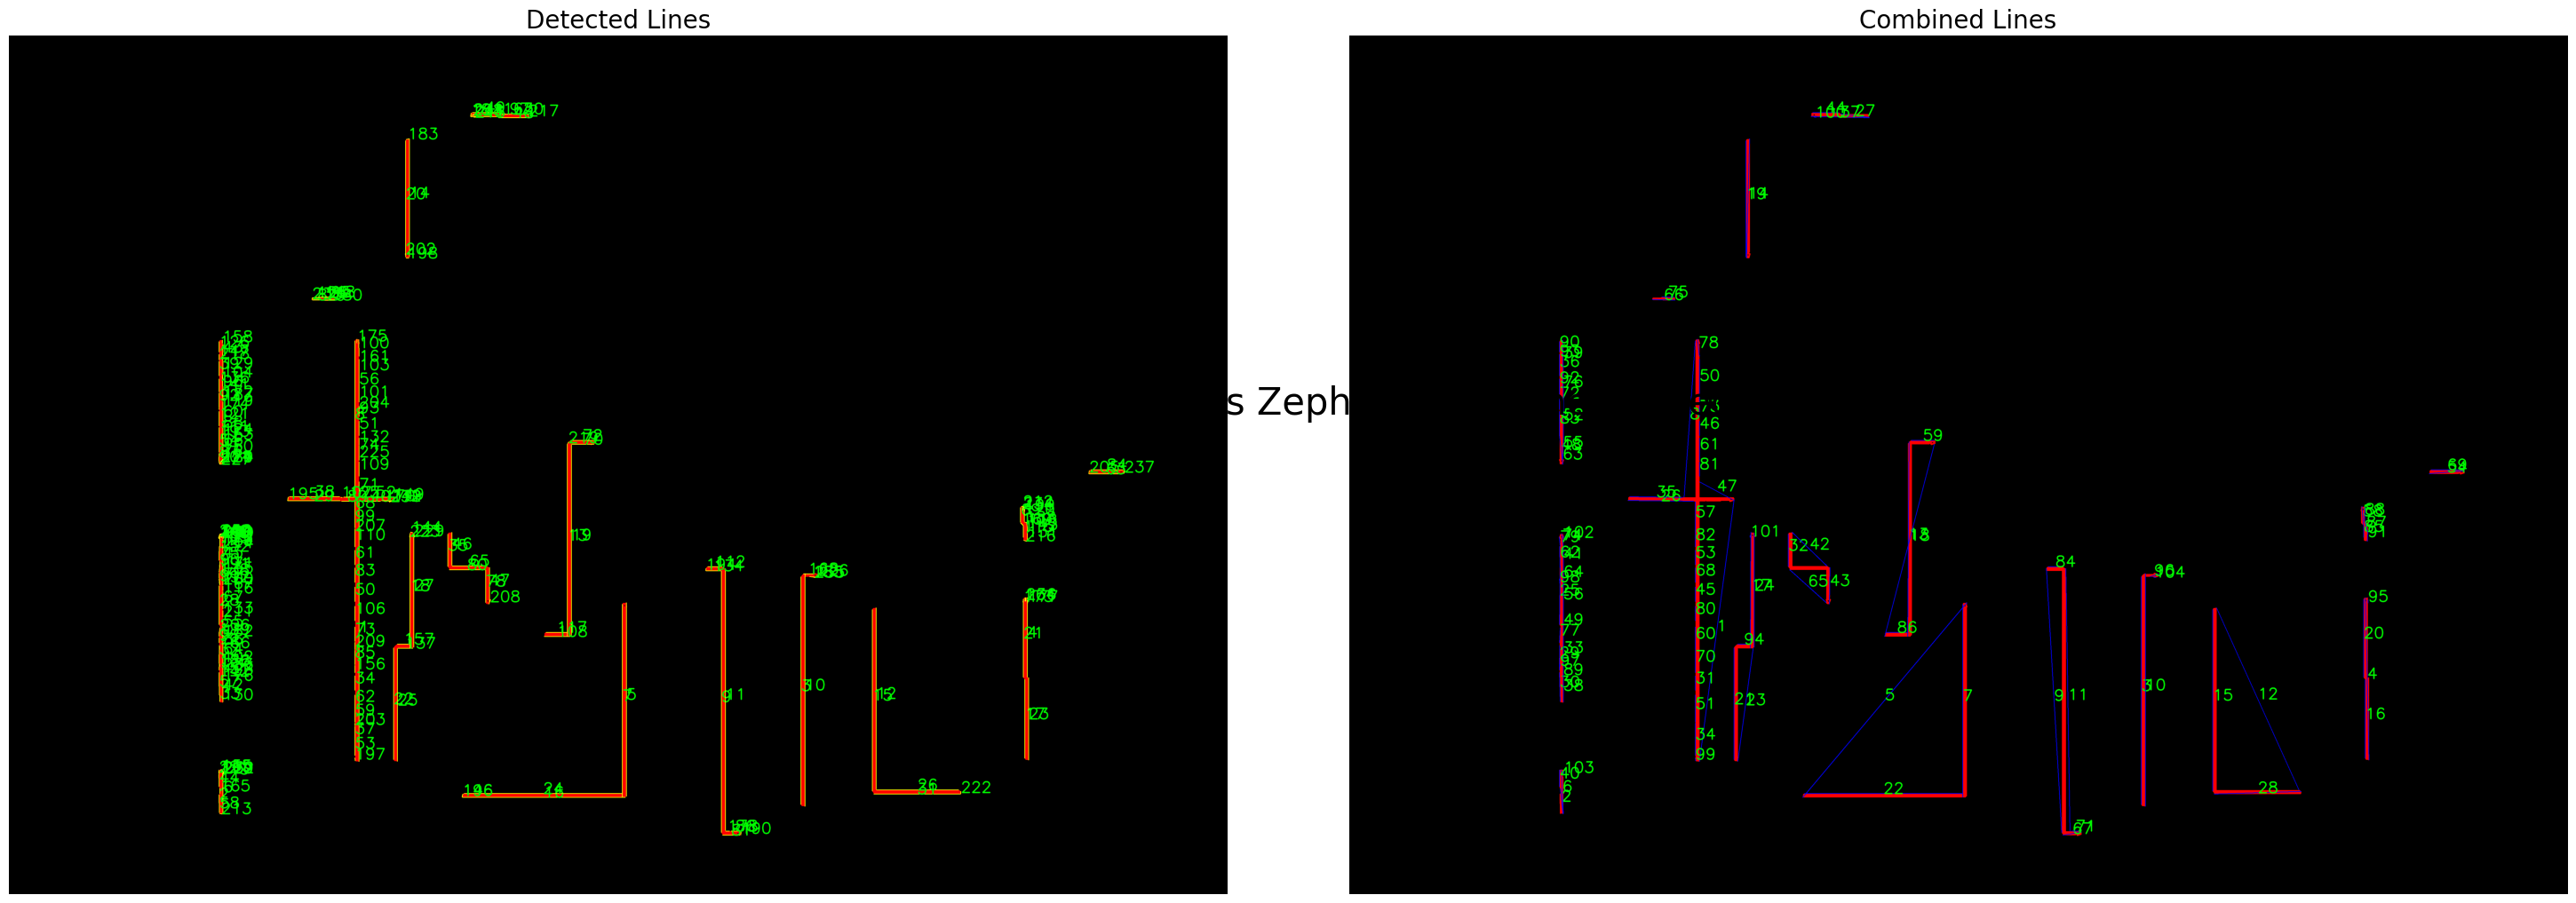


[INFO] Processed Airbus Zephyr_temp_lines_detected:
------------------------------------------------------------
Detected Lines      : 242
Combined Lines      : 104
------------------------------------------------------------
Combined Line Details:
Line 1:
  Start: (1503, 1818)
  End:   (1368, 2839)
Line 2:
  Start: (835, 3044)
  End:   (824, 2944)
Line 3:
  Start: (3095, 3007)
  End:   (3095, 2117)
Line 4:
  Start: (3971, 2198)
  End:   (3985, 2833)
Line 5:
  Start: (1772, 2979)
  End:   (2413, 2218)
Line 6:
  Start: (828, 2870)
  End:   (836, 3043)
Line 7:
  Start: (2397, 2979)
  End:   (2397, 2224)
Line 8:
  Start: (1308, 1805)
  End:   (1352, 1194)
Line 9:
  Start: (2724, 2084)
  End:   (2784, 3116)
Line 10:
  Start: (3111, 3014)
  End:   (3111, 2104)
Line 11:
  Start: (2816, 3111)
  End:   (2800, 2084)
Line 12:
  Start: (3711, 2950)
  End:   (3389, 2238)
Line 13:
  Start: (2187, 1589)
  End:   (2182, 2350)
Line 14:
  Start: (1552, 870)
  End:   (1564, 403)
Line 15:
  Start: (3374

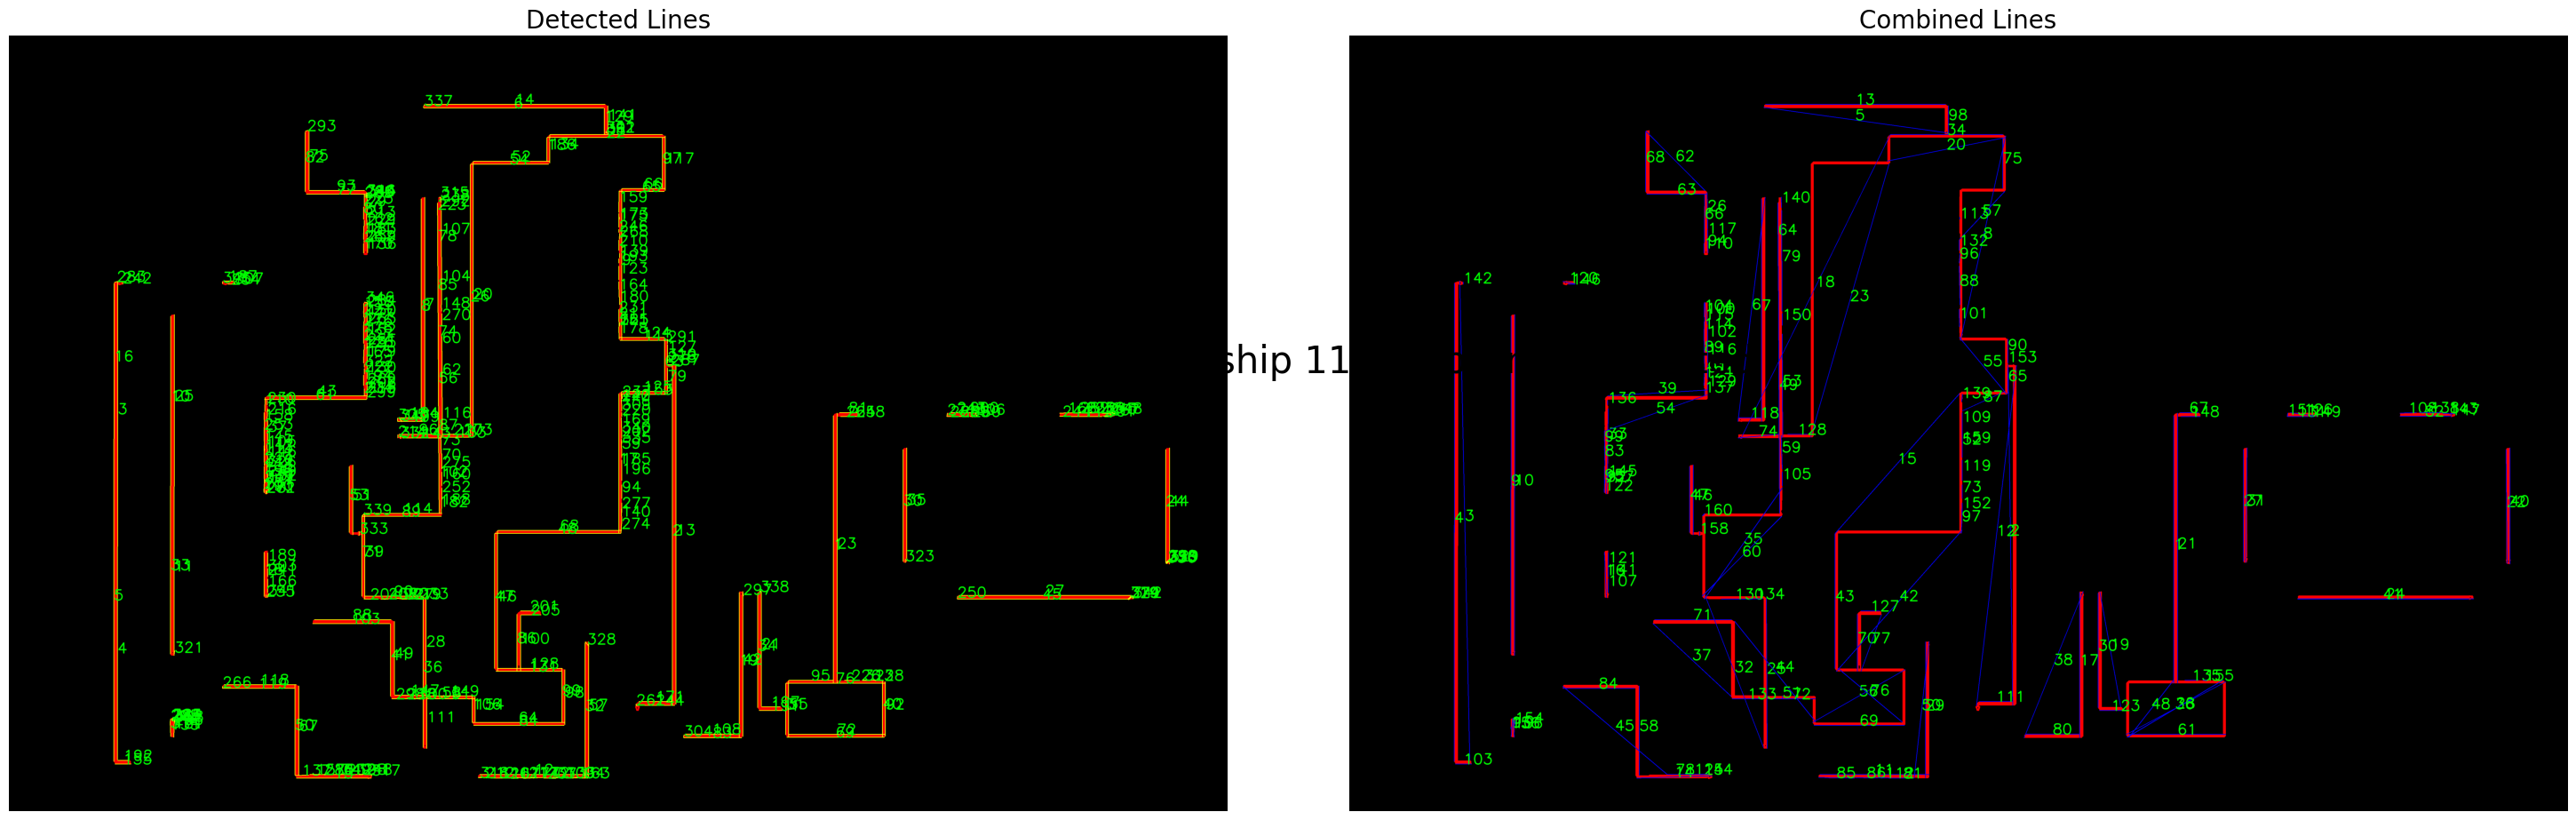


[INFO] Processed Airship 11_temp_lines_detected:
------------------------------------------------------------
Detected Lines      : 350
Combined Lines      : 160
------------------------------------------------------------
Combined Line Details:
Line 1:
  Start: (3390, 2665)
  End:   (3390, 1566)
Line 2:
  Start: (2709, 1356)
  End:   (2728, 2756)
Line 3:
  Start: (454, 1011)
  End:   (495, 2982)
Line 4:
  Start: (432, 1022)
  End:   (431, 2986)
Line 5:
  Start: (1704, 298)
  End:   (2457, 403)
Line 6:
  Start: (1598, 1589)
  End:   (1710, 668)
Line 7:
  Start: (1695, 1589)
  End:   (1695, 675)
Line 8:
  Start: (2699, 416)
  End:   (2513, 1256)
Line 9:
  Start: (664, 2545)
  End:   (665, 1157)
Line 10:
  Start: (680, 1150)
  End:   (679, 2551)
Line 11:
  Start: (1936, 3040)
  End:   (2384, 3040)
Line 12:
  Start: (2579, 2758)
  End:   (2743, 1359)
Line 13:
  Start: (1712, 286)
  End:   (2451, 286)
Line 14:
  Start: (1492, 3046)
  End:   (1182, 3055)
Line 15:
  Start: (1998, 2049)
  En

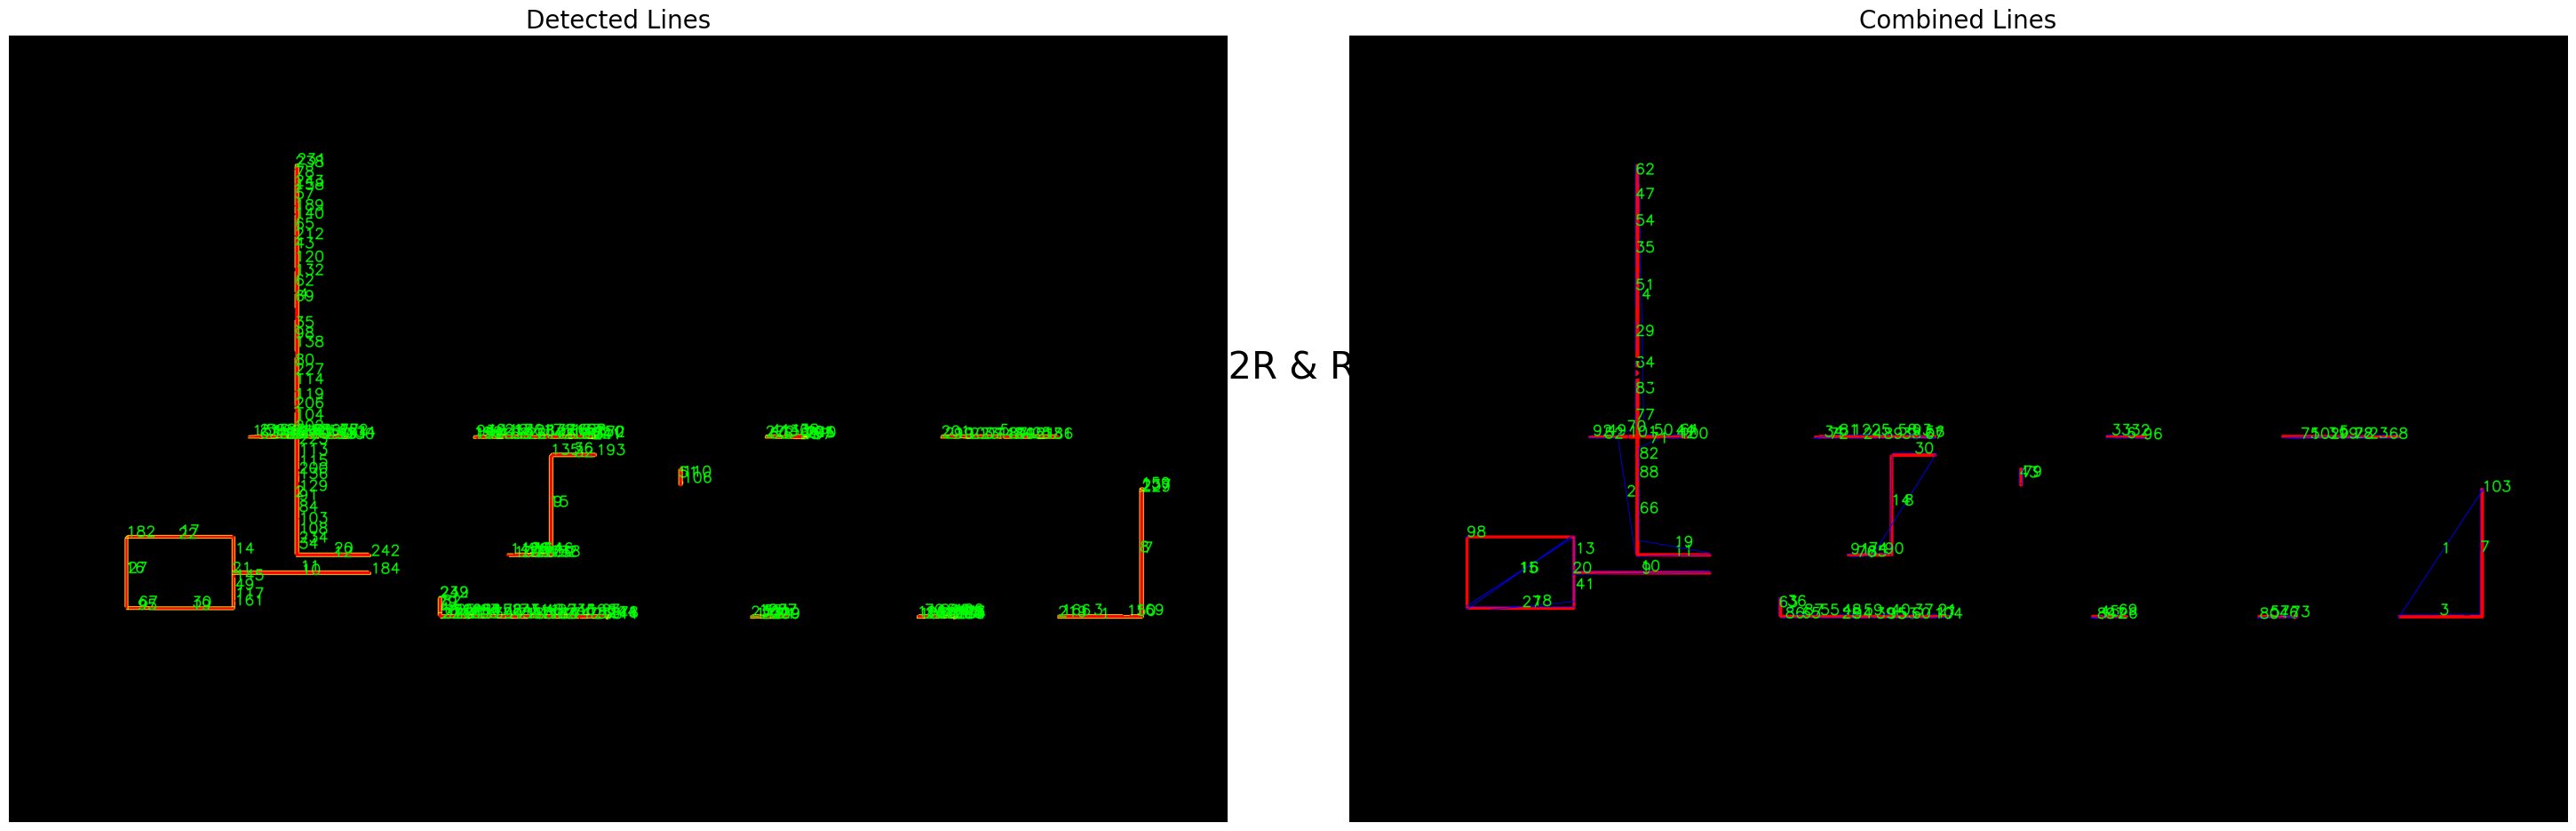


[INFO] Processed Ayres S2R & RPAS_temp_lines_detected:
------------------------------------------------------------
Detected Lines      : 251
Combined Lines      : 104
------------------------------------------------------------
Combined Line Details:
Line 1:
  Start: (4635, 1847)
  End:   (4285, 2380)
Line 2:
  Start: (1097, 1643)
  End:   (1168, 2117)
Line 3:
  Start: (4617, 2365)
  End:   (4289, 2366)
Line 4:
  Start: (1183, 523)
  End:   (1203, 1630)
Line 5:
  Start: (3806, 1642)
  End:   (4282, 1630)
Line 6:
  Start: (3261, 1645)
  End:   (3089, 1642)
Line 7:
  Start: (4620, 1850)
  End:   (4619, 2365)
Line 8:
  Start: (2134, 2128)
  End:   (2399, 1706)
Line 9:
  Start: (1478, 2192)
  End:   (911, 2201)
Line 10:
  Start: (911, 2186)
  End:   (1469, 2186)
Line 11:
  Start: (1478, 2119)
  End:   (1173, 2128)
Line 12:
  Start: (2018, 1630)
  End:   (2087, 1630)
Line 13:
  Start: (923, 2183)
  End:   (923, 2046)
Line 14:
  Start: (2210, 2128)
  End:   (2217, 1706)
Line 15:
  Start: (

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import json

# Helper function to calculate the distance between two points
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Helper function to calculate the midpoint of a line
def midpoint(p1, p2):
    return ((p1[0] + p2[0]) // 2, (p1[1] + p2[1]) // 2)

# Helper function to check if two points are close
def points_are_close(p1, p2, distance_thresh=10):
    return distance(p1, p2) < distance_thresh

# Update function to combine lines based on both proximity and overlapping points
def should_combine(line1, line2, distance_thresh=10):
    if (points_are_close(line1[0], line2[0], distance_thresh) or 
        points_are_close(line1[1], line2[1], distance_thresh) or 
        points_are_close(line1[0], line2[1], distance_thresh) or 
        points_are_close(line1[1], line2[0], distance_thresh)):
        return True
    return False

# Function to combine two lines
def combine_lines(line1, line2):
    points = [line1[0], line1[1], line2[0], line2[1]]
    max_dist = 0
    start_point = points[0]
    end_point = points[1]
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            dist = distance(points[i], points[j])
            if dist > max_dist:
                max_dist = dist
                start_point = points[i]
                end_point = points[j]
    return (start_point, end_point)

# Global list to store JSON file paths
if 'json_files' not in globals():
    json_files = []

def process_file(original_image_path):
    """Process a single file to detect and combine lines."""
    img = cv2.imread(original_image_path)
    if img is None:
        print(f"[ERROR] Image not found: {original_image_path}")
        return None

    base_name = os.path.splitext(os.path.basename(original_image_path))[0]
    gray_clean = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges_clean = cv2.Canny(gray_clean, 10, 150, apertureSize=7, L2gradient=True)

    lines = cv2.HoughLinesP(edges_clean, rho=1, theta=np.pi / 180, threshold=10, minLineLength=5, maxLineGap=15)

    line_img = img.copy()
    line_points = []
    if lines is not None:
        for idx, line in enumerate(lines):
            x1, y1, x2, y2 = map(int, line[0])
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 255), 2)
            line_points.append(((x1, y1), (x2, y2)))
            mid_x, mid_y = (x1 + x2) // 2, (y1 + y2) // 2
            cv2.putText(line_img, f'{idx+1}', (mid_x, mid_y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3, cv2.LINE_AA)

    combined_lines = []
    for line1 in line_points:
        merged = False
        for i, line2 in enumerate(combined_lines):
            if should_combine(line1, line2):
                combined_lines[i] = combine_lines(line1, line2)
                merged = True
                break
        if not merged:
            combined_lines.append(line1)

    line_img_combined = img.copy()
    for idx, line in enumerate(combined_lines):
        x1, y1 = line[0]
        x2, y2 = line[1]
        cv2.line(line_img_combined, (x1, y1), (x2, y2), (255, 0, 0), 2)
        mid_x, mid_y = (x1 + x2) // 2, (y1 + y2) // 2
        cv2.putText(line_img_combined, f'{idx+1}', (mid_x, mid_y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3, cv2.LINE_AA)

    json_output_path = os.path.join(os.path.dirname(original_image_path), f"{base_name}_lines.json")
    line_data = {
        "lines": [{"start": tuple(map(int, line[0])), "end": tuple(map(int, line[1]))} for line in line_points],
        "combined_lines": [{"start": tuple(map(int, line[0])), "end": tuple(map(int, line[1]))} for line in combined_lines]
    }
    with open(json_output_path, "w") as f:
        json.dump(line_data, f, indent=4)
    print(f"[INFO] Line data saved at: {json_output_path}")

    # Append JSON file path to the global list
    json_files.append(json_output_path)

    cv2.imwrite(os.path.join(os.path.dirname(original_image_path), f"{base_name}_lines.png"), line_img)
    cv2.imwrite(os.path.join(os.path.dirname(original_image_path), f"{base_name}_combined_lines.png"), line_img_combined)

    # Enhanced plot with adjusted spacing and font sizes
    fig, axs = plt.subplots(1, 2, figsize=(32, 18))  # Adjusted figsize for better proportion
    fig.suptitle(f"Line Detection for {base_name}", fontsize=30, y=0.5)  # Fixed: use 'y' instead of 'pad'

    axs[0].imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Detected Lines", fontsize=20)
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(line_img_combined, cv2.COLOR_BGR2RGB))
    axs[1].set_title("Combined Lines", fontsize=20)
    axs[1].axis('off')

    plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.05, wspace=0.1, hspace=0.1)  # Adjusted spacing
    plt.show()

    # Enhanced console output with wrapped coordinates
    print(f"\n[INFO] Processed {base_name}:")
    print(f"{'-' * 60}")
    print(f"{'Detected Lines':<20}: {len(line_points)}")
    print(f"{'Combined Lines':<20}: {len(combined_lines)}")
    print(f"{'-' * 60}")
    print("Combined Line Details:")
    for idx, points in enumerate(combined_lines):
        start, end = points
        start_str = str(start)
        end_str = str(end)
        # Wrap coordinates at 40 characters
        start_lines = [start_str[i:i+40] for i in range(0, len(start_str), 40)]
        end_lines = [end_str[i:i+40] for i in range(0, len(end_str), 40)]
        print(f"Line {idx+1}:")
        print(f"  Start: {start_lines[0]}")
        for line in start_lines[1:]:
            print(f"         {line}")
        print(f"  End:   {end_lines[0]}")
        for line in end_lines[1:]:
            print(f"         {line}")

def process_files(image_paths):
    """Process multiple files for line detection."""
    if not image_paths:
        print("[INFO] No files to process.")
        return

    total_files = len(image_paths)
    for i, image_path in enumerate(image_paths, 1):
        if not os.path.exists(image_path):
            print(f"[ERROR] File not found: {image_path}")
            continue
        print(f"[INFO] Processing {i}/{total_files}: {os.path.basename(image_path)}")
        process_file(image_path)

    print("\n[INFO] Line detection completed for all files:")
    print(f"{'File':<30} | {'Detected Lines':<15} | {'Combined Lines':<15}")
    print("-" * 60)
    for json_file in json_files:
        base_name = os.path.splitext(os.path.basename(json_file))[0].replace("_lines", "")
        with open(json_file, "r") as f:
            data = json.load(f)
        print(f"{base_name:<30} | {len(data['lines']):<15} | {len(data['combined_lines']):<15}")

if 'detected_line_files' in globals():
    process_files(detected_line_files)
else:
    print("[ERROR] 'detected_line_files' not found. Please run the previous cell to generate detected lines images.")

In [9]:
# Debugging code to check files in temp_files and json_files
if 'temp_files' in globals():
    print("[INFO] Checking files in temp_files...")
    for file in temp_files:
        if os.path.exists(file):
            print(f"[FOUND] {file}")
        else:
            print(f"[MISSING] {file}")
else:
    print("[ERROR] 'temp_files' is not defined.")

if 'json_files' in globals():
    print("[INFO] Checking files in json_files...")
    for file in json_files:
        if os.path.exists(file):
            print(f"[FOUND] {file}")
        else:
            print(f"[MISSING] {file}")
else:
    print("[ERROR] 'json_files' is not defined.")


[INFO] Checking files in temp_files...
[FOUND] /Users/tirth/Desktop/Accimap-Analysis-main/NewData/processed_files/Airbus Zephyr_temp.png
[FOUND] /Users/tirth/Desktop/Accimap-Analysis-main/NewData/processed_files/Airship 11_temp.png
[FOUND] /Users/tirth/Desktop/Accimap-Analysis-main/NewData/processed_files/Ayres S2R & RPAS_temp.png
[INFO] Checking files in json_files...
[FOUND] processed_files/Airbus Zephyr_temp_lines_detected_lines.json
[FOUND] processed_files/Airship 11_temp_lines_detected_lines.json
[FOUND] processed_files/Ayres S2R & RPAS_temp_lines_detected_lines.json


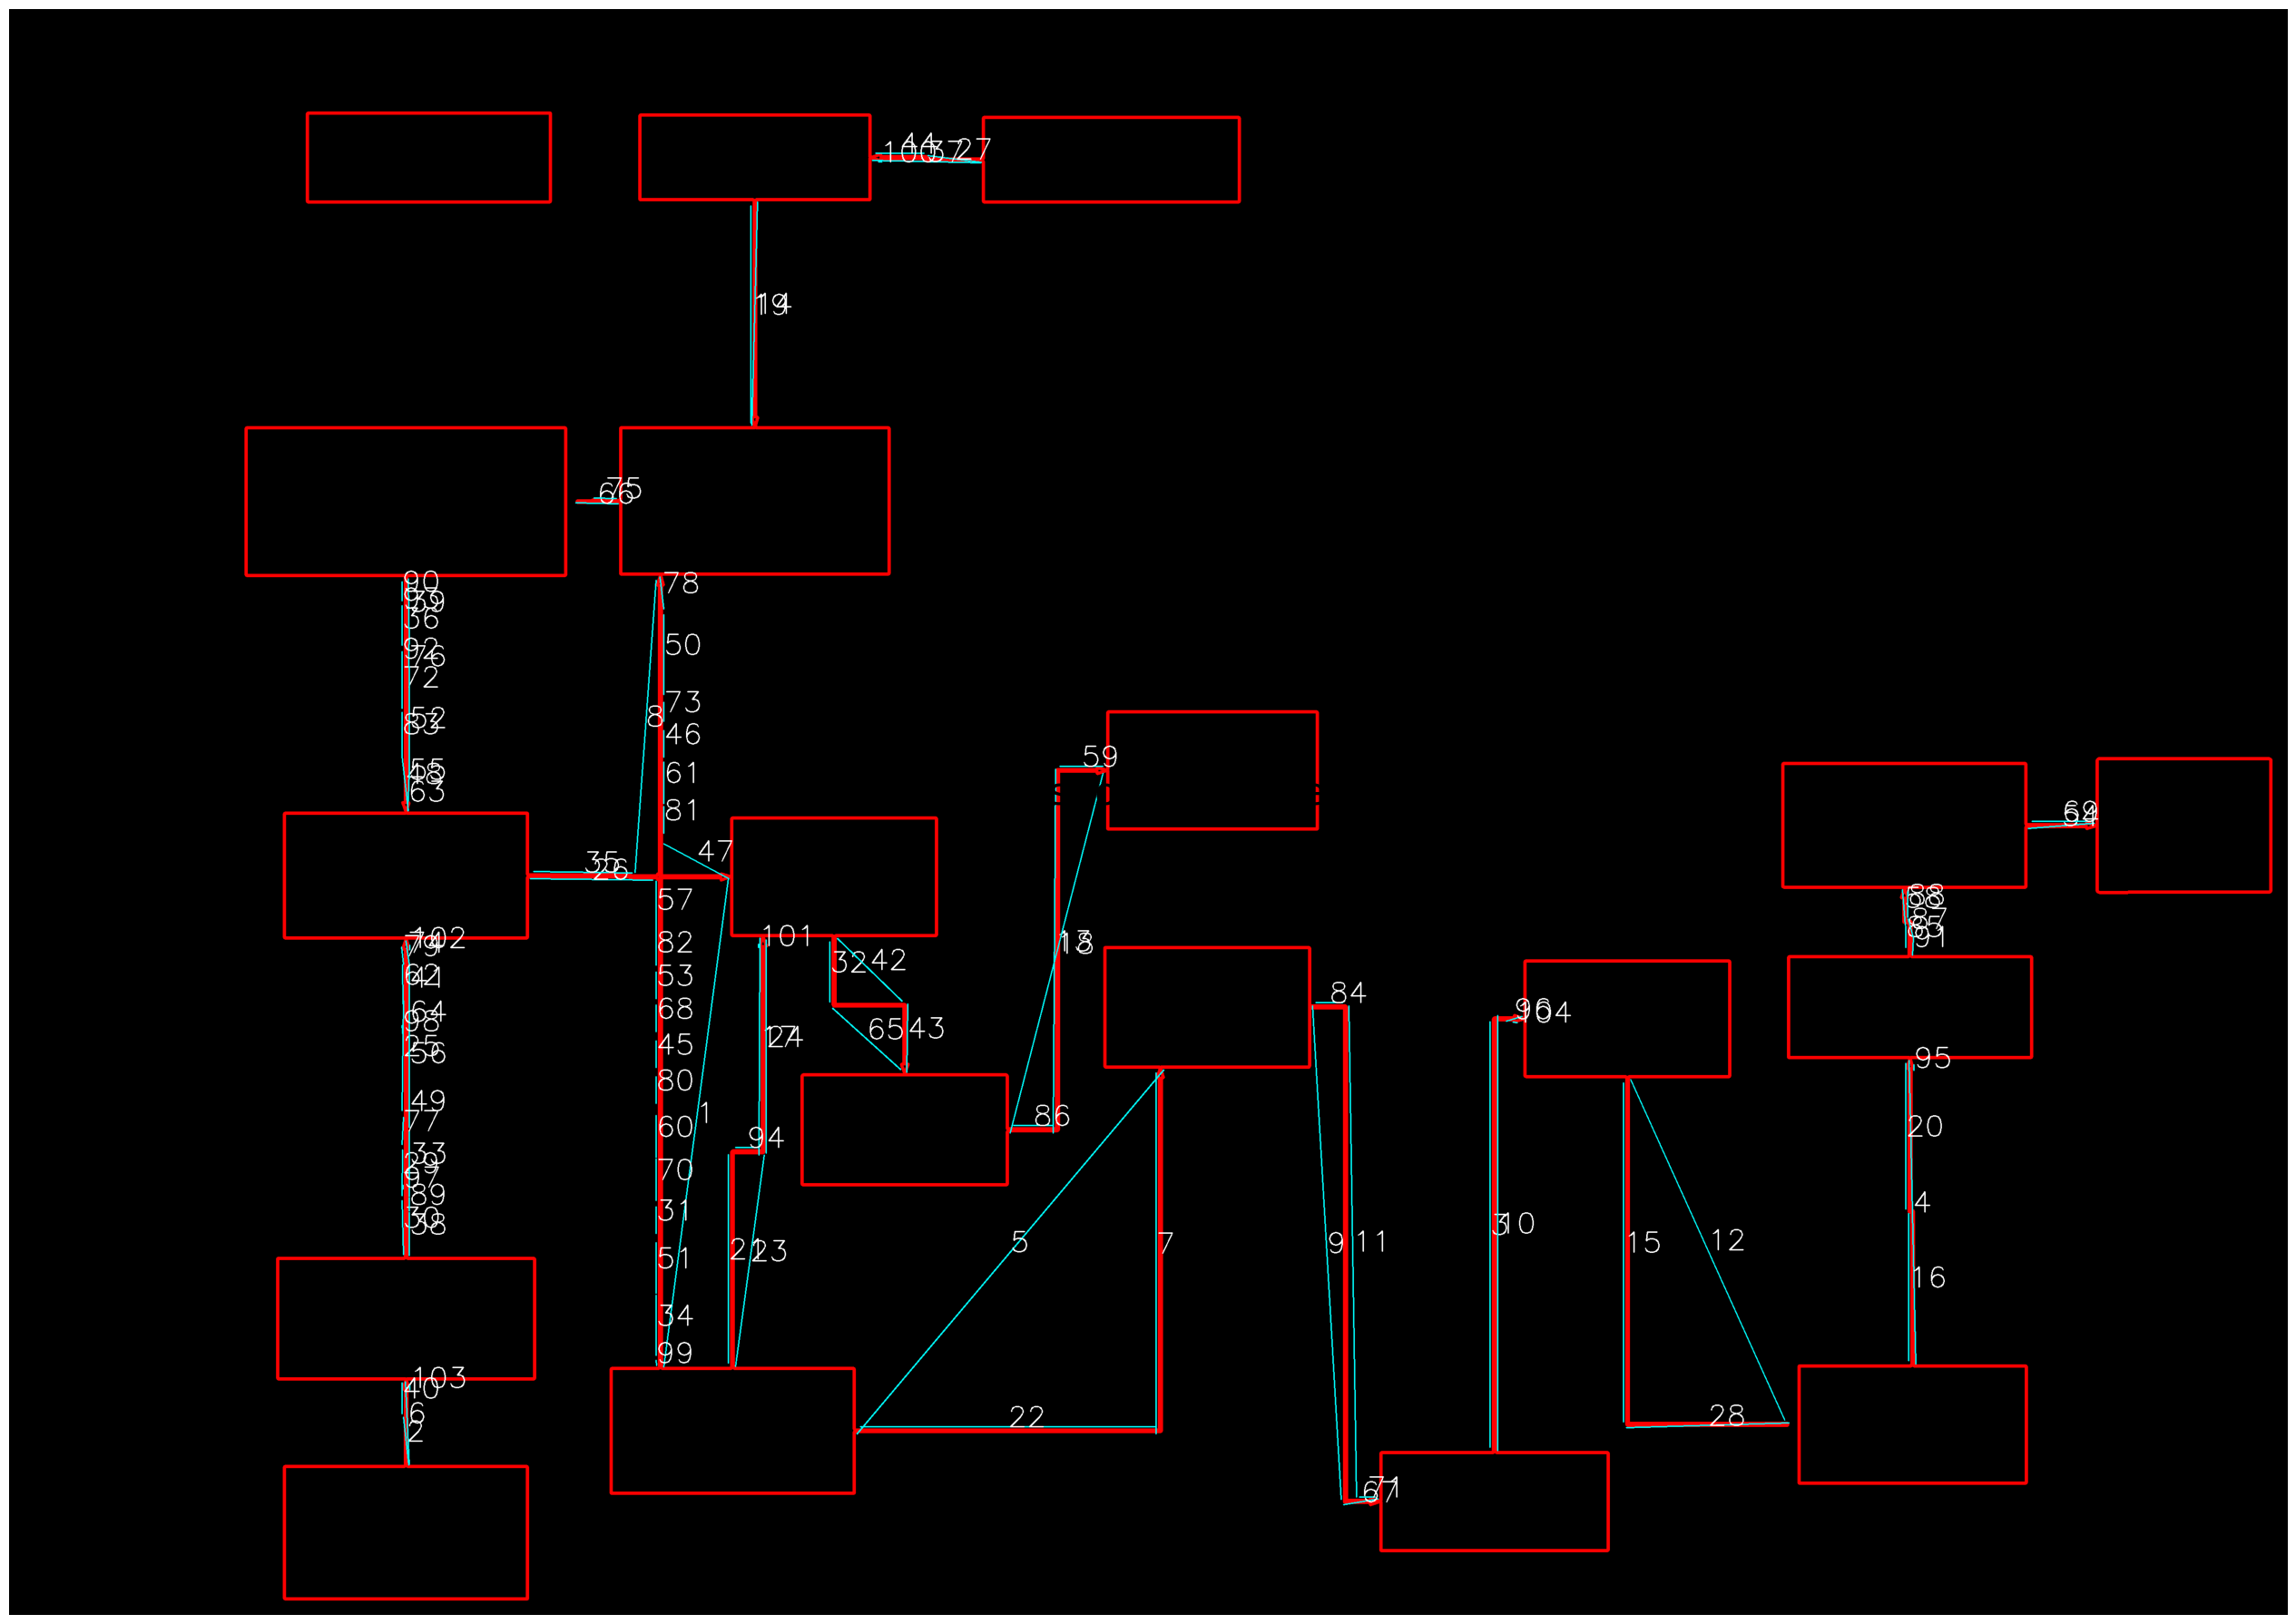

Detected 104 combined lines.
Combined Line 1: Start (1503, 1818), End (1368, 2839)
Combined Line 2: Start (835, 3044), End (824, 2944)
Combined Line 3: Start (3095, 3007), End (3095, 2117)
Combined Line 4: Start (3971, 2198), End (3985, 2833)
Combined Line 5: Start (1772, 2979), End (2413, 2218)
Combined Line 6: Start (828, 2870), End (836, 3043)
Combined Line 7: Start (2397, 2979), End (2397, 2224)
Combined Line 8: Start (1308, 1805), End (1352, 1194)
Combined Line 9: Start (2724, 2084), End (2784, 3116)
Combined Line 10: Start (3111, 3014), End (3111, 2104)
Combined Line 11: Start (2816, 3111), End (2800, 2084)
Combined Line 12: Start (3711, 2950), End (3389, 2238)
Combined Line 13: Start (2187, 1589), End (2182, 2350)
Combined Line 14: Start (1552, 870), End (1564, 403)
Combined Line 15: Start (3374, 2954), End (3374, 2245)
Combined Line 16: Start (3970, 2826), End (3970, 2518)
Combined Line 17: Start (1569, 1942), End (1567, 2396)
Combined Line 18: Start (2092, 2350), End (2286, 15

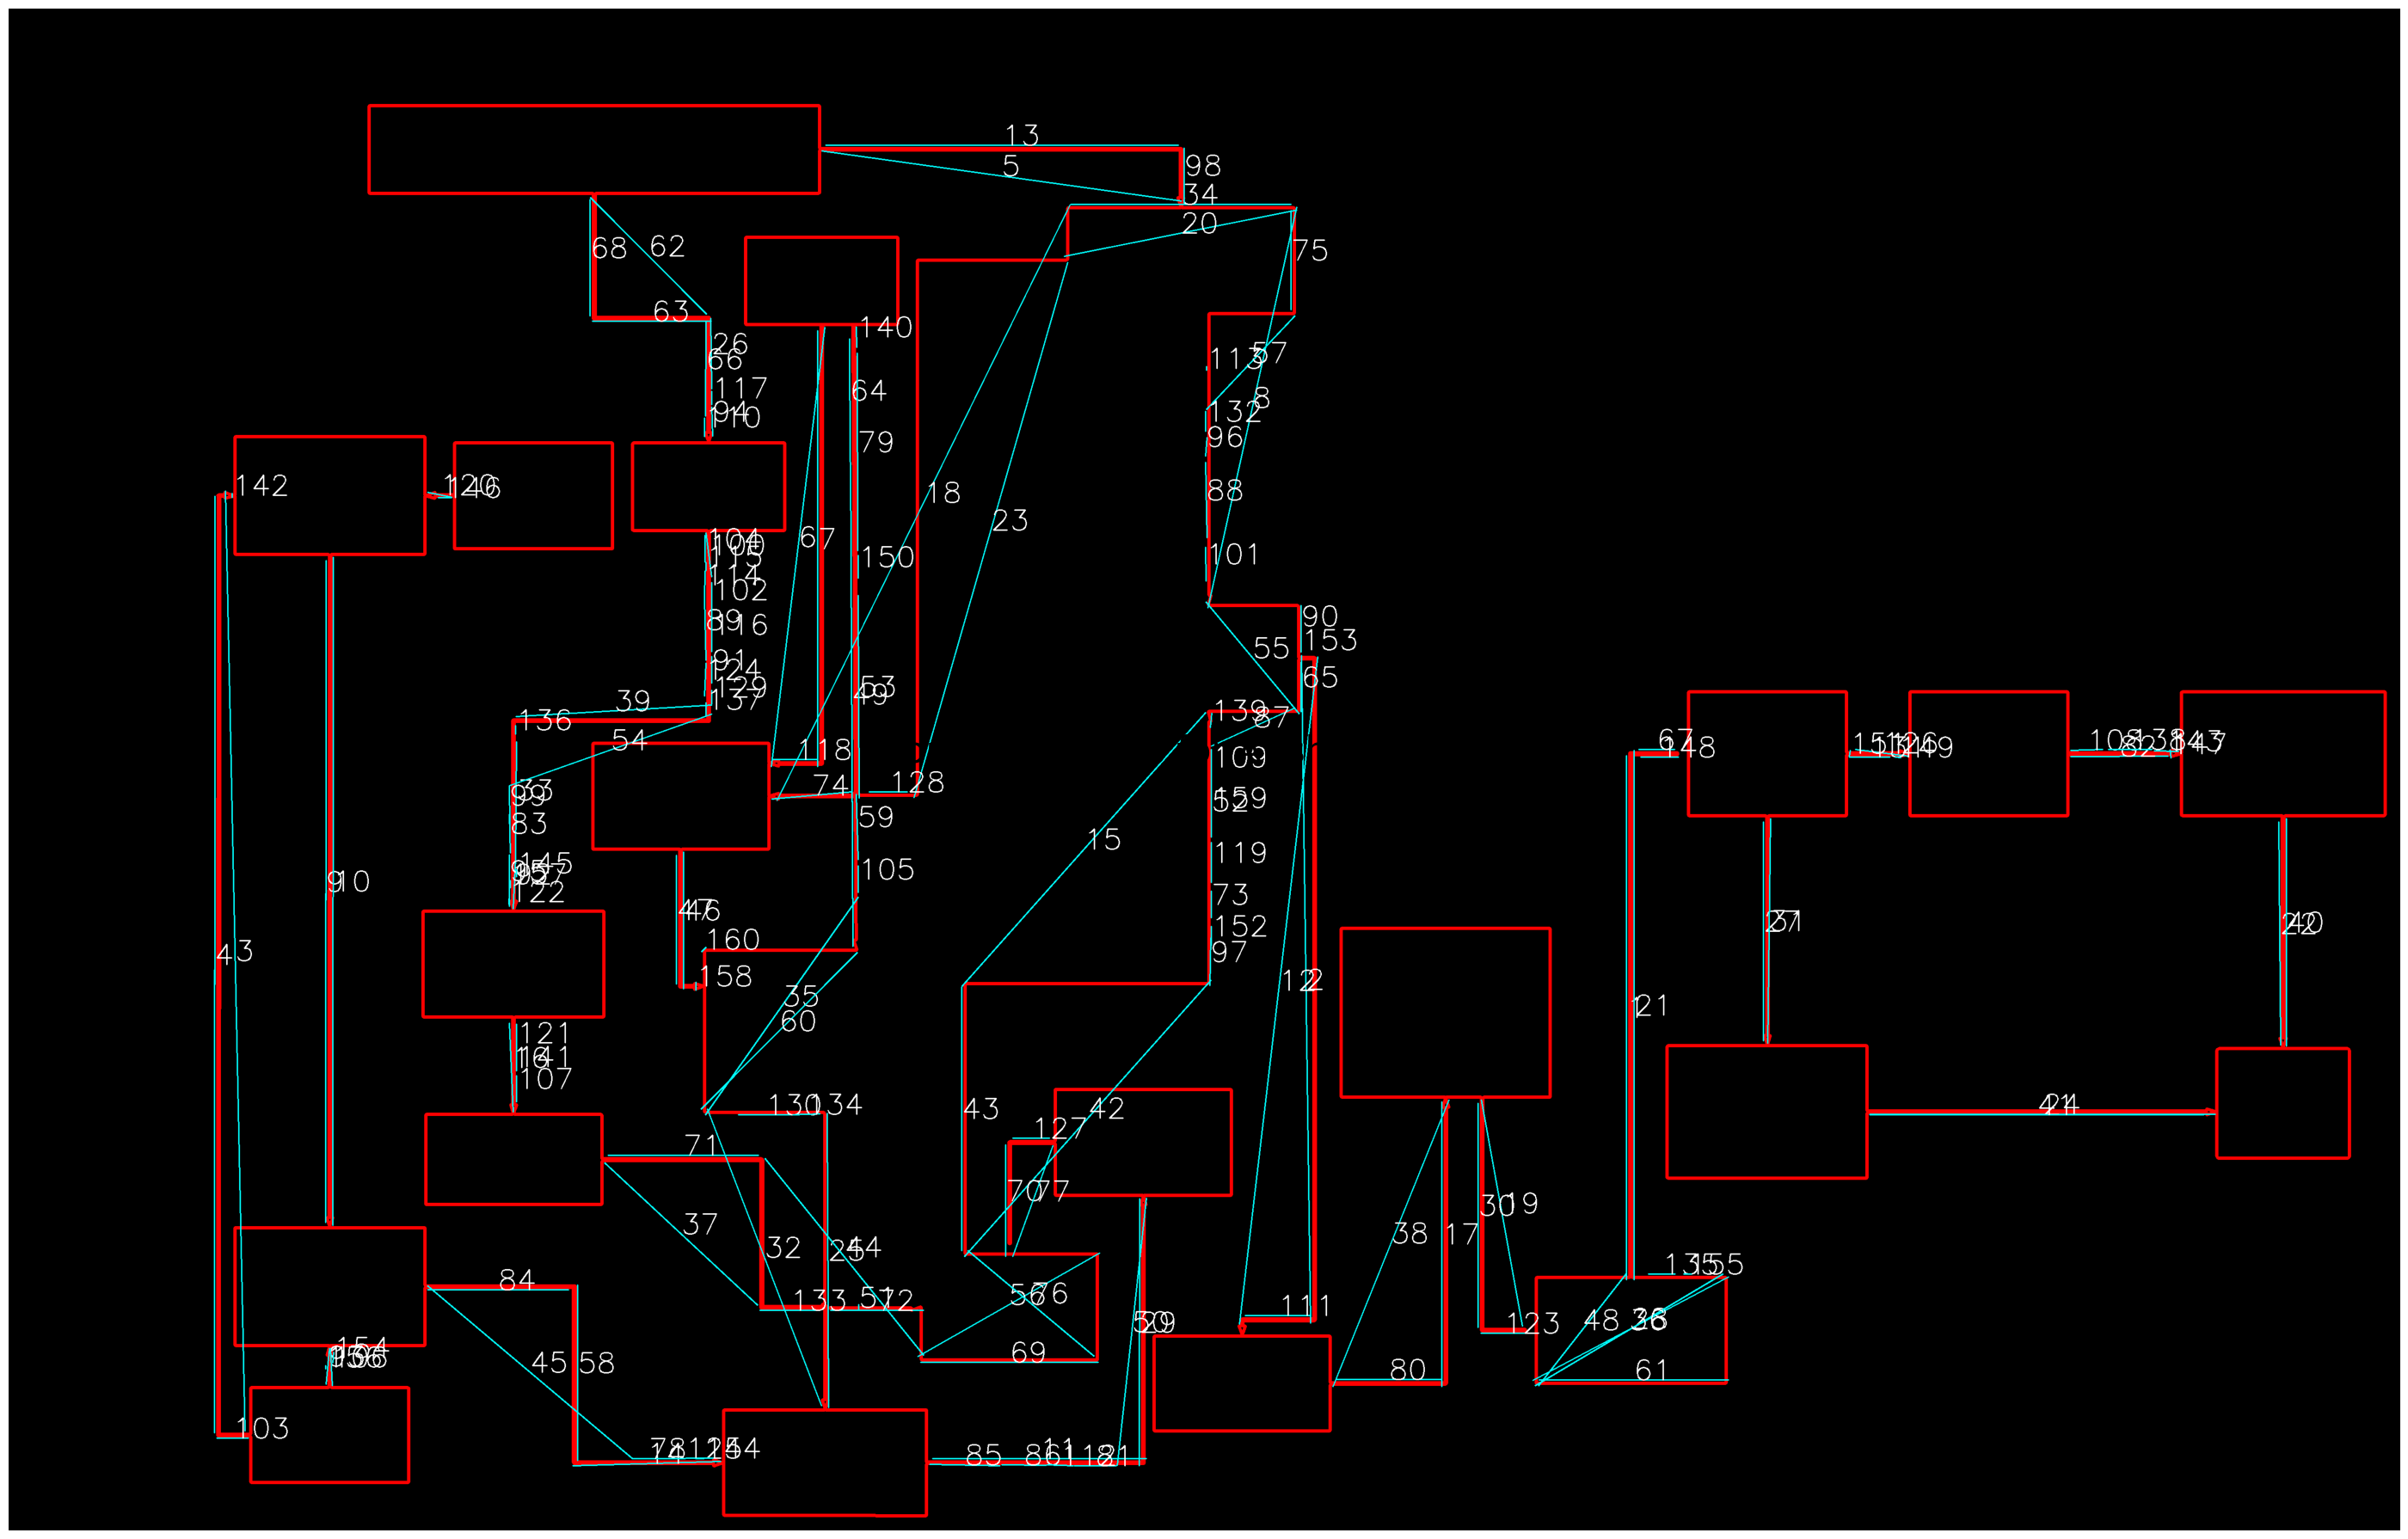

Detected 160 combined lines.
Combined Line 1: Start (3390, 2665), End (3390, 1566)
Combined Line 2: Start (2709, 1356), End (2728, 2756)
Combined Line 3: Start (454, 1011), End (495, 2982)
Combined Line 4: Start (432, 1022), End (431, 2986)
Combined Line 5: Start (1704, 298), End (2457, 403)
Combined Line 6: Start (1598, 1589), End (1710, 668)
Combined Line 7: Start (1695, 1589), End (1695, 675)
Combined Line 8: Start (2699, 416), End (2513, 1256)
Combined Line 9: Start (664, 2545), End (665, 1157)
Combined Line 10: Start (680, 1150), End (679, 2551)
Combined Line 11: Start (1936, 3040), End (2384, 3040)
Combined Line 12: Start (2579, 2758), End (2743, 1359)
Combined Line 13: Start (1712, 286), End (2451, 286)
Combined Line 14: Start (1492, 3046), End (1182, 3055)
Combined Line 15: Start (1998, 2049), End (2508, 1476)
Combined Line 16: Start (1057, 2313), End (1049, 2127)
Combined Line 17: Start (3003, 2889), End (3003, 2292)
Combined Line 18: Start (1610, 1660), End (2224, 411)
Combin

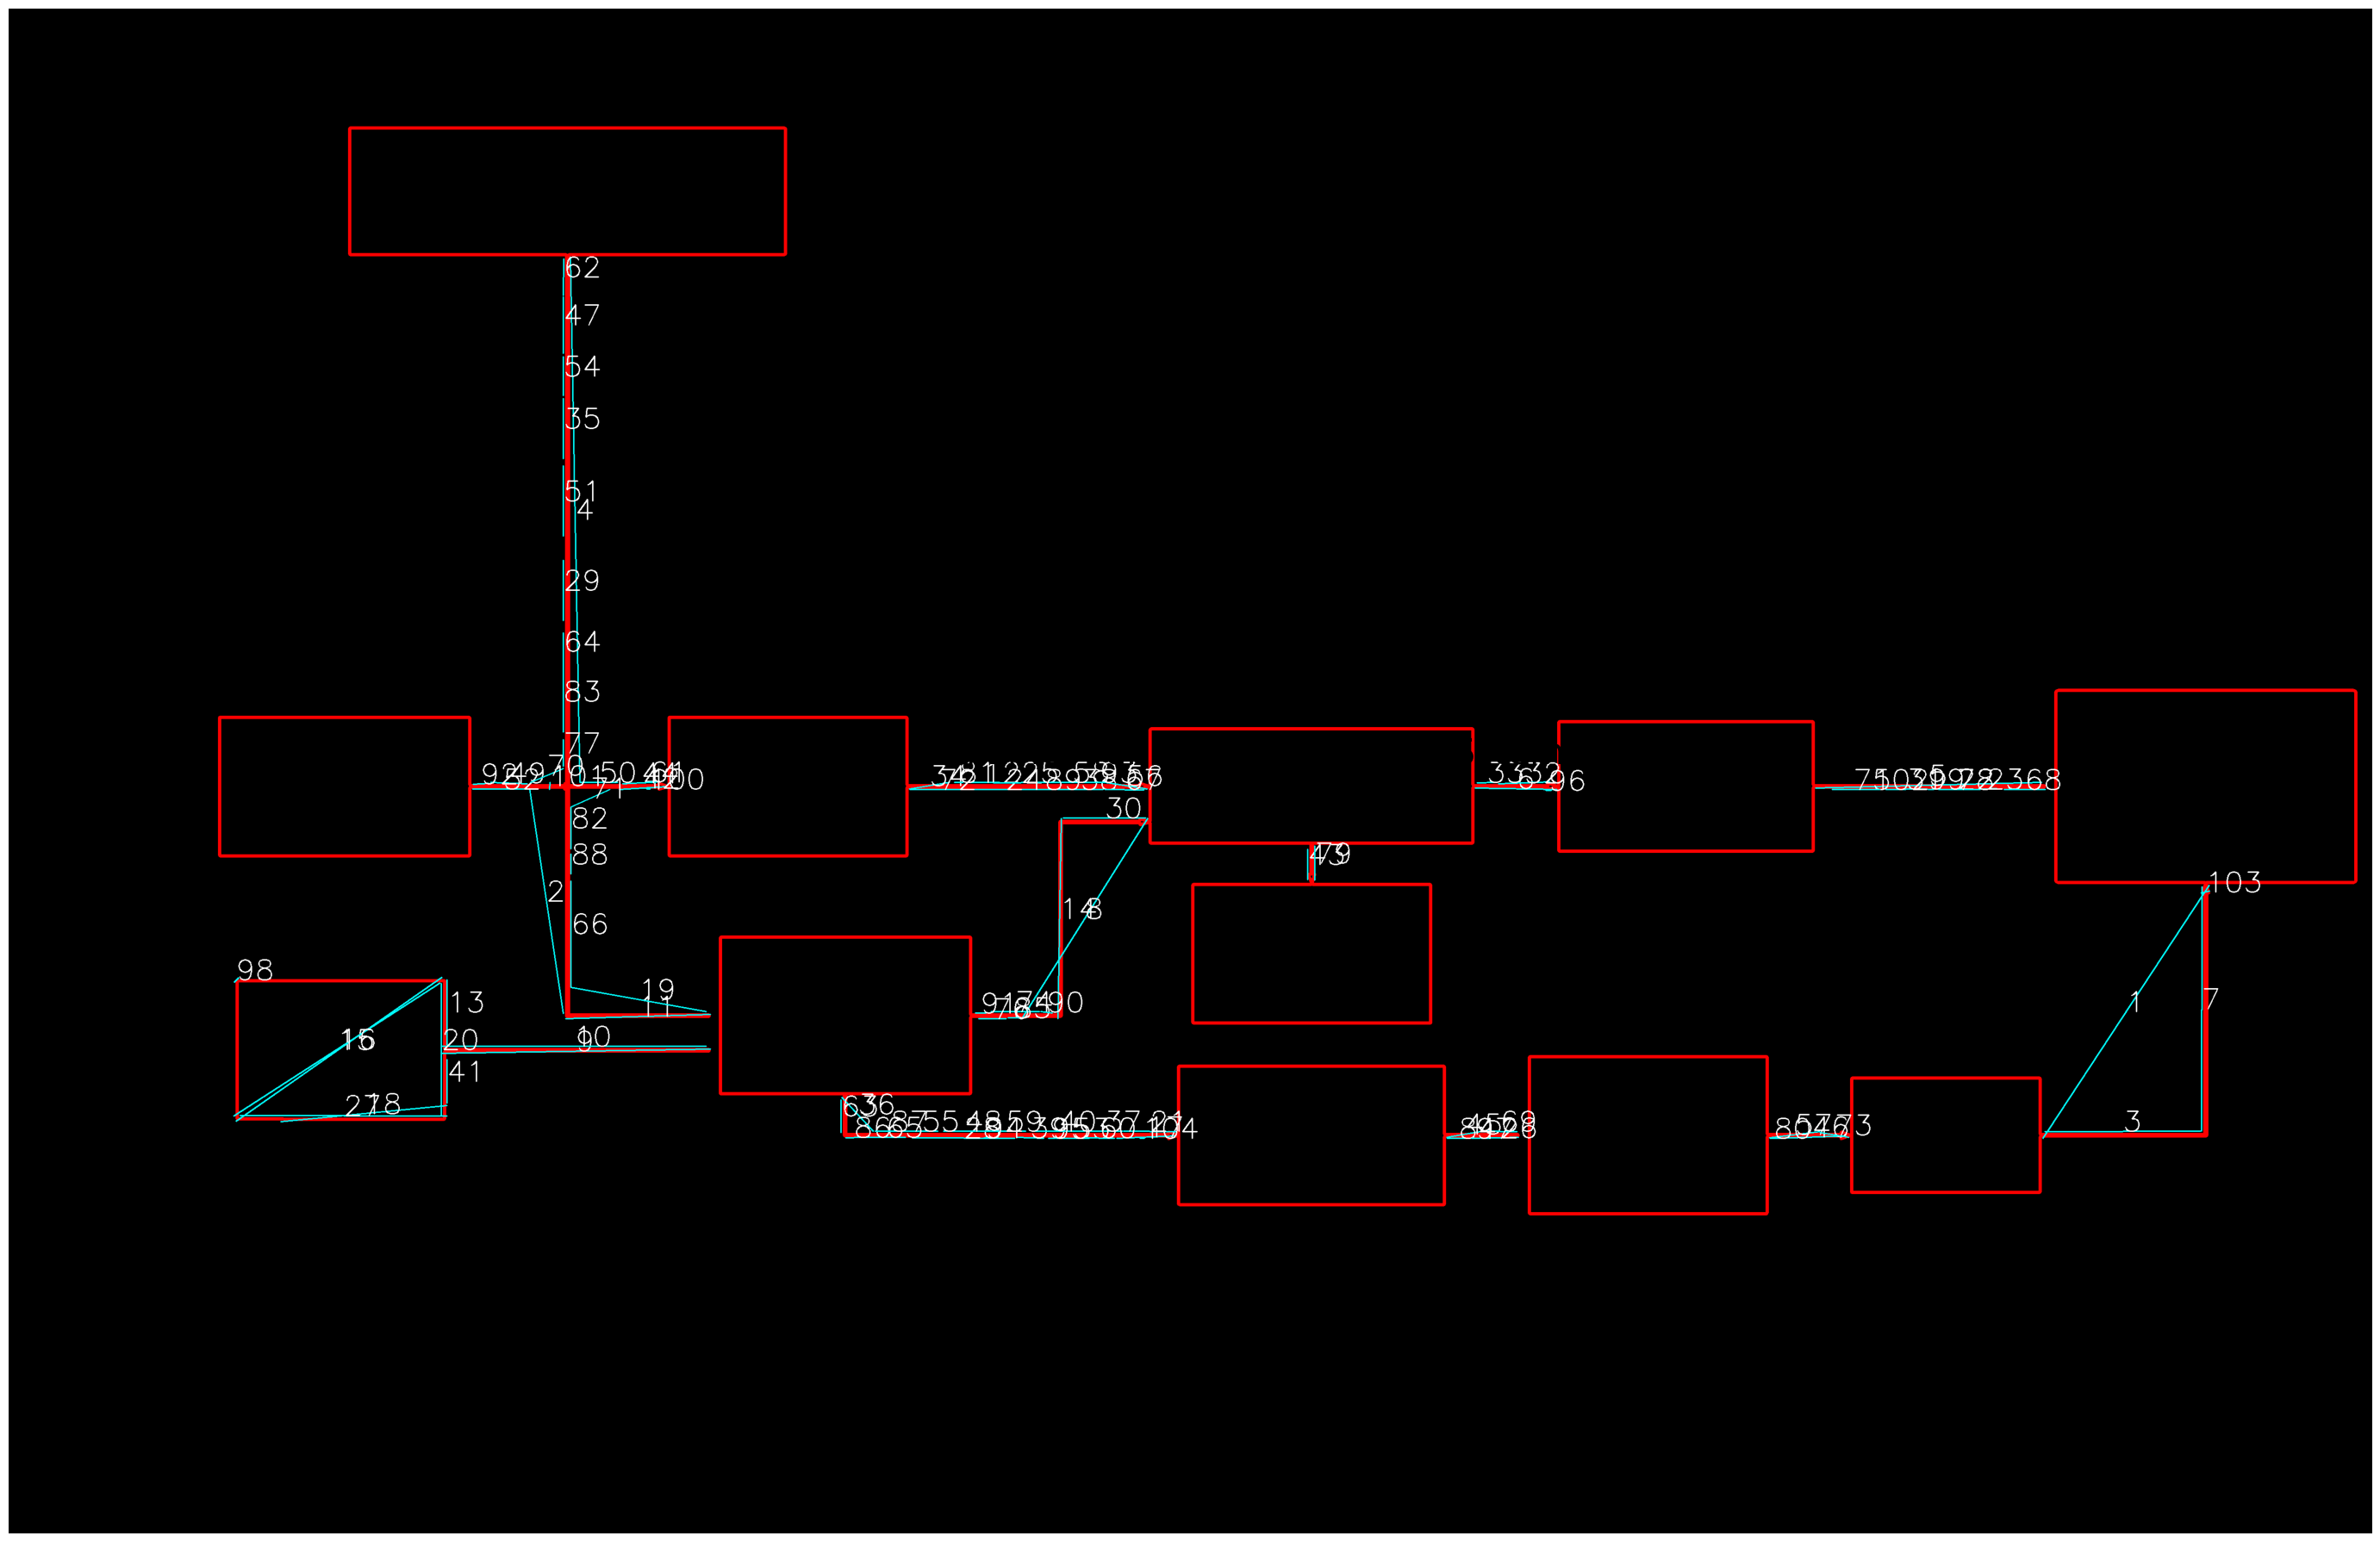

Detected 104 combined lines.
Combined Line 1: Start (4635, 1847), End (4285, 2380)
Combined Line 2: Start (1097, 1643), End (1168, 2117)
Combined Line 3: Start (4617, 2365), End (4289, 2366)
Combined Line 4: Start (1183, 523), End (1203, 1630)
Combined Line 5: Start (3806, 1642), End (4282, 1630)
Combined Line 6: Start (3261, 1645), End (3089, 1642)
Combined Line 7: Start (4620, 1850), End (4619, 2365)
Combined Line 8: Start (2134, 2128), End (2399, 1706)
Combined Line 9: Start (1478, 2192), End (911, 2201)
Combined Line 10: Start (911, 2186), End (1469, 2186)
Combined Line 11: Start (1478, 2119), End (1173, 2128)
Combined Line 12: Start (2018, 1630), End (2087, 1630)
Combined Line 13: Start (923, 2183), End (923, 2046)
Combined Line 14: Start (2210, 2128), End (2217, 1706)
Combined Line 15: Start (908, 2053), End (474, 2333)
Combined Line 16: Start (479, 2344), End (912, 2041)
Combined Line 17: Start (2458, 2375), End (2334, 2380)
Combined Line 18: Start (923, 2311), End (573, 2345)
C

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import json

# Helper function to calculate the distance between two points
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Helper function to calculate the midpoint of a line
def midpoint(p1, p2):
    return ((p1[0] + p2[0]) // 2, (p1[1] + p2[1]) // 2)

# Helper function to check if two points are close
def points_are_close(p1, p2, distance_thresh=10):
    return distance(p1, p2) < distance_thresh

# Update function to combine lines based on both proximity and overlapping points
def should_combine(line1, line2, distance_thresh=10):
    if (points_are_close(line1[0], line2[0], distance_thresh) or 
        points_are_close(line1[1], line2[1], distance_thresh) or 
        points_are_close(line1[0], line2[1], distance_thresh) or 
        points_are_close(line1[1], line2[0], distance_thresh)):
        return True
    return False

# Function to combine two lines
def combine_lines(line1, line2):
    points = [line1[0], line1[1], line2[0], line2[1]]
    max_dist = 0
    start_point = points[0]
    end_point = points[1]
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            dist = distance(points[i], points[j])
            if dist > max_dist:
                max_dist = dist
                start_point = points[i]
                end_point = points[j]
    return (start_point, end_point)

# Function to process a single temp image and generate combined lines and labels
def process_file(temp_image_path, json_file_path):
    """Process a single file to detect and combine lines."""
    img = cv2.imread(temp_image_path)
    if img is None:
        print(f"[ERROR] Image not found: {temp_image_path}")
        return None

    # Extract the base name for saving results
    base_name = os.path.splitext(os.path.basename(temp_image_path))[0]

    # Read the detected lines from the JSON file
    with open(json_file_path, "r") as f:
        line_data = json.load(f)
    
    # Extract lines from the JSON file
    line_points = [(tuple(line["start"]), tuple(line["end"])) for line in line_data["lines"]]

    # Create images for visualization
    line_img = img.copy()

    # Store detected lines (draw them on the debug image)
    for idx, (start, end) in enumerate(line_points):
        x1, y1 = start
        x2, y2 = end
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 255), 2)  # Draw detected lines
        # Annotate line number
        mid_x, mid_y = (x1 + x2) // 2, (y1 + y2) // 2
        cv2.putText(line_img, f'{idx+1}', (mid_x, mid_y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3, cv2.LINE_AA)

    # Combine lines based on proximity
    combined_lines = []
    for line1 in line_points:
        merged = False
        for i, line2 in enumerate(combined_lines):
            if should_combine(line1, line2):
                combined_lines[i] = combine_lines(line1, line2)
                merged = True
                break
        if not merged:
            combined_lines.append(line1)

    # Create a copy of the cleaned image to draw combined lines and labels
    line_img_combined = img.copy()

    # Draw combined lines and add labels
    for idx, line in enumerate(combined_lines):
        x1, y1 = line[0]
        x2, y2 = line[1]
        cv2.line(line_img_combined, (x1, y1), (x2, y2), (255, 255, 0), 2)  # Draw blue lines for combined lines
        # Get midpoint to place label
        mid_x, mid_y = midpoint((x1, y1), (x2, y2))
        # Label the line with its number
        cv2.putText(line_img_combined, f'{idx+1}', (mid_x, mid_y), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2)

    # Save the visualized image for combined lines
    combined_path = os.path.join(os.path.dirname(temp_image_path), f"{base_name}_combined_lines.png")
    cv2.imwrite(combined_path, line_img_combined)

    # Display the image for combined lines with enhanced UX
    plt.figure(figsize=(32, 18))  # Adjusted for better proportion
    plt.title(f"Combined Lines for {base_name}", fontsize=30, y=0.5)  # Larger font, adjusted position
    plt.imshow(cv2.cvtColor(line_img_combined, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Output the start and end points of the combined lines with labels
    print(f"Detected {len(combined_lines)} combined lines.")
    for idx, points in enumerate(combined_lines):
        print(f"Combined Line {idx+1}: Start {points[0]}, End {points[1]}")

# Function to process all temp images (temp_files) and their respective JSON files
def process_files(temp_files, json_files):
    """Process multiple temp image files for line detection and combination."""
    if not temp_files or not json_files:
        print("[INFO] No files to process.")
        return

    for temp_image_path, json_file_path in zip(temp_files, json_files):
        if not os.path.exists(temp_image_path):
            print(f"[ERROR] File not found: {temp_image_path}")
            continue
        if not os.path.exists(json_file_path):
            print(f"[ERROR] JSON file not found: {json_file_path}")
            continue
        process_file(temp_image_path, json_file_path)

    print("[INFO] Line detection and combination completed for all files.")

# Ensure this part is executed to process multiple files
if 'temp_files' in globals() and 'json_files' in globals():
    process_files(temp_files, json_files)
else:
    print("[ERROR] 'temp_files' or 'json_files' not found. Please provide valid lists of temp image paths and JSON files.")

In [11]:
import json
import os

def find_processed_files_directory(file_paths):
    """
    Determines the location of the 'processed_files' directory based on the parent folder of the first file in the list.
    Assumes 'processed_files' is at the same level as the parent folder of the input files.
    """
    if not file_paths:
        print("[ERROR] No files provided to locate 'processed_files' directory.")
        return None

    # Get the parent directory of the first file's directory
    parent_folder = os.path.dirname(os.path.dirname(file_paths[0]))
    processed_files_path = os.path.join(parent_folder, "processed_files")

    # Check if the directory exists
    if os.path.exists(processed_files_path):
        return processed_files_path

    print("[ERROR] 'processed_files' directory not found.")
    return None

def filter_and_update_rectangles_for_files(file_paths):
    """
    Iterates over each file in `files_to_process` and:
      1) Filters out rectangles with OCR errors.
      2) Updates the corresponding rectangle_text_mapping.json file dynamically.
    """
    # Locate the 'processed_files' directory dynamically
    processed_files_directory = find_processed_files_directory(file_paths)
    if not processed_files_directory:
        print("[ERROR] Unable to proceed without 'processed_files' directory.")
        return

    print(f"[INFO] Located 'processed_files' directory: {processed_files_directory}")

    for original_image_path in file_paths:
        # Skip non-PNG files
        if not original_image_path.lower().endswith('.png'):
            print(f"[INFO] Skipping unsupported file type: {original_image_path}")
            continue

        base_filename = os.path.splitext(os.path.basename(original_image_path))[0]

        # Dynamically construct the JSON file path
        json_path = os.path.join(processed_files_directory, f"{base_filename}_text.json")

        if not os.path.exists(json_path):
            print(f"[ERROR] JSON file not found: {json_path}. Skipping this file.")
            continue

        print(f"[INFO] Processing rectangles for file: {json_path}")

        # Load the existing JSON data
        with open(json_path, "r") as infile:
            existing_data = json.load(infile)

        # Ensure the rectangles and texts are defined
        rectangles = existing_data.get("rectangles", [])
        if not rectangles:
            print(f"[INFO] No rectangles found in {json_path}. Skipping.")
            continue

        # Filter out rectangles with OCR errors
        filtered_rectangles = []
        for text_data in rectangles:
            if "Error during OCR" not in text_data["Text"]:
                filtered_rectangles.append(text_data)

        # Display filtered rectangles and associated text
        print("Filtered Rectangles and Texts:")
        for text_data in filtered_rectangles:
            print(f"Rectangle {text_data['Rectangle No']}: {text_data['Text']}")

        print(f"Number of rectangles after filtering: {len(filtered_rectangles)}")

        # Update the JSON data
        existing_data["rectangles"] = filtered_rectangles

        # Save the updated JSON file
        with open(json_path, "w") as outfile:
            json.dump(existing_data, outfile, indent=4)

        print(f"[SUCCESS] Filtered rectangle texts updated in '{json_path}'\n")

# Example usage:
filter_and_update_rectangles_for_files(files_to_process)


[INFO] Located 'processed_files' directory: /Users/tirth/Desktop/Accimap-Analysis-main/processed_files
[INFO] Processing rectangles for file: /Users/tirth/Desktop/Accimap-Analysis-main/processed_files/Airbus Zephyr_text.json
Filtered Rectangles and Texts:
Rectangle 1: Wyndham Airport is in a remote Iocation (providing separation from standard flight routes and populated areas
Rectangle 2: RPA performed a series of uncommanded turns
Rectangle 3: Designed for high-altitude flight this RPA was extremely sensitive to atmospheric instability in climb and descent
Rectangle 4: RPA airspeed increased beyond Vne (velocity never exceed, or may result in structural. damage)
Rectangle 5: Locally launched radiosondes were required to assist with forecast. modelling due to lower resolution. forecasting data in remote location.
Rectangle 6: RPA launched from Wyndham Airport, WA
Rectangle 7: Crew attempted to return RPA to controlled flight, but were unsuccessful.
Rectangle 8: RPA broke-up in-flight .

In [12]:
import json
import os

# Debug function to check for 'rectangles' key in all JSON files stored in rectangle_json_files
def debug_check_rectangle_json_files():
    """
    Debug function to check the 'rectangles' key in all JSON files stored in rectangle_json_files.
    """
    # Check if rectangle_json_files exists and is not empty
    if 'rectangle_json_files' not in globals() or not rectangle_json_files:
        print("[ERROR] 'rectangle_json_files' is not defined or is empty. Please run the processing step first.")
        return

    print("[INFO] Starting debug for rectangle JSON files...")
    for json_file in rectangle_json_files:
        # Ensure the file exists
        if not os.path.exists(json_file):
            print(f"[ERROR] File not found: {json_file}")
            continue

        print(f"[INFO] Inspecting file: {json_file}")
        try:
            # Open and load JSON data
            with open(json_file, "r") as f:
                data = json.load(f)
            
            # Check for 'rectangles' key
            if "rectangles" in data:
                print(f"[SUCCESS] 'rectangles' key found in: {json_file}")
                print(f"[INFO] Number of rectangles: {len(data['rectangles'])}")
                
                # Print details of the first rectangle (optional)
                if data["rectangles"]:
                    print(f"[INFO] Example rectangle data: {data['rectangles'][0]}")
            else:
                print(f"[INFO] 'rectangles' key NOT found in: {json_file}")
                print(f"[INFO] Available keys in this file: {list(data.keys())}")
        
        except json.JSONDecodeError:
            print(f"[ERROR] Failed to decode JSON in file: {json_file}")
        except Exception as e:
            print(f"[ERROR] Unexpected error processing {json_file}: {e}")

# Example usage
if 'rectangle_json_files' in globals():
    debug_check_rectangle_json_files()
else:
    print("[ERROR] 'rectangle_json_files' is not defined. Please ensure the JSON files are generated and stored.")


[INFO] Starting debug for rectangle JSON files...
[INFO] Inspecting file: processed_files/Airbus Zephyr_text.json
[SUCCESS] 'rectangles' key found in: processed_files/Airbus Zephyr_text.json
[INFO] Number of rectangles: 19
[INFO] Example rectangle data: {'Rectangle No': 1, 'Text': 'Wyndham Airport is in a remote Iocation (providing separation from standard flight routes and populated areas', 'Coordinates': [[578, 3050], [1080, 3050], [1080, 3321], [578, 3321]]}
[INFO] Inspecting file: processed_files/Airship 11_text.json
[SUCCESS] 'rectangles' key found in: processed_files/Airship 11_text.json
[INFO] Number of rectangles: 19
[INFO] Example rectangle data: {'Rectangle No': 1, 'Text': "Crew noticed Airship's centre of gravity (CoG) was rearward, resulting in a nose-up attitude", 'Coordinates': [[1501, 2941], [1920, 2941], [1920, 3157], [1501, 3157]]}
[INFO] Inspecting file: processed_files/Ayres S2R & RPAS_text.json
[SUCCESS] 'rectangles' key found in: processed_files/Ayres S2R & RPAS_te

In [13]:
import os
import json
import numpy as np

def debug_environment():
    """
    Debug function to validate the existence and contents of required variables and files.
    """
    errors = []

    # Check if 'rectangle_json_files' is defined and populated
    if 'rectangle_json_files' not in globals():
        errors.append("[ERROR] 'rectangle_json_files' variable is not defined.")
    elif not rectangle_json_files:
        errors.append("[ERROR] 'rectangle_json_files' is empty. Please ensure rectangle data is processed.")
    else:
        print("[INFO] 'rectangle_json_files' is defined and contains the following files:")
        for file in rectangle_json_files:
            if os.path.exists(file):
                print(f"[INFO] Found: {file}")
            else:
                errors.append(f"[ERROR] File not found: {file}")

    # Check if 'json_files' is defined and populated (for line coordinates)
    if 'json_files' not in globals():
        errors.append("[ERROR] 'json_files' variable is not defined.")
    elif not json_files:
        errors.append("[ERROR] 'json_files' is empty. Please ensure line data is processed.")
    else:
        print("[INFO] 'json_files' is defined and contains the following files:")
        for file in json_files:
            if os.path.exists(file):
                print(f"[INFO] Found: {file}")
            else:
                errors.append(f"[ERROR] File not found: {file}")

    # Summary of errors
    if errors:
        print("\n".join(errors))
    else:
        print("[SUCCESS] All required variables and files are correctly defined and exist.")

def validate_json_files(json_file_list, required_keys):
    """
    Validate the contents of a list of JSON files to ensure they contain required keys.
    """
    for file in json_file_list:
        if not os.path.exists(file):
            print(f"[ERROR] File not found: {file}")
            continue

        try:
            with open(file, "r") as f:
                data = json.load(f)
            
            missing_keys = [key for key in required_keys if key not in data]
            if missing_keys:
                print(f"[ERROR] Missing keys {missing_keys} in file: {file}")
            else:
                print(f"[INFO] File {file} contains all required keys: {required_keys}")
        except json.JSONDecodeError:
            print(f"[ERROR] Failed to decode JSON in file: {file}")
        except Exception as e:
            print(f"[ERROR] Unexpected error while reading {file}: {e}")

# Run the debug environment check
print("[DEBUG] Validating environment...")
debug_environment()

# Validate rectangle JSON files
if 'rectangle_json_files' in globals() and rectangle_json_files:
    print("\n[DEBUG] Validating rectangle JSON files for required keys...")
    validate_json_files(rectangle_json_files, required_keys=["rectangles"])

# Validate line JSON files
if 'json_files' in globals() and json_files:
    print("\n[DEBUG] Validating line JSON files for required keys...")
    validate_json_files(json_files, required_keys=["combined_lines"])


[DEBUG] Validating environment...
[INFO] 'rectangle_json_files' is defined and contains the following files:
[INFO] Found: processed_files/Airbus Zephyr_text.json
[INFO] Found: processed_files/Airship 11_text.json
[INFO] Found: processed_files/Ayres S2R & RPAS_text.json
[INFO] 'json_files' is defined and contains the following files:
[INFO] Found: processed_files/Airbus Zephyr_temp_lines_detected_lines.json
[INFO] Found: processed_files/Airship 11_temp_lines_detected_lines.json
[INFO] Found: processed_files/Ayres S2R & RPAS_temp_lines_detected_lines.json
[SUCCESS] All required variables and files are correctly defined and exist.

[DEBUG] Validating rectangle JSON files for required keys...
[INFO] File processed_files/Airbus Zephyr_text.json contains all required keys: ['rectangles']
[INFO] File processed_files/Airship 11_text.json contains all required keys: ['rectangles']
[INFO] File processed_files/Ayres S2R & RPAS_text.json contains all required keys: ['rectangles']

[DEBUG] Validat

In [14]:
import numpy as np
import json
import os

# Global variable to store adjacency matrix file paths
adjacency_matrix_files = []

def point_to_line_distance(line_start, line_end, point):
    """
    Calculate the distance from a point to a line segment.
    """
    line_start = np.array(line_start).reshape(2)
    line_end = np.array(line_end).reshape(2)
    point = np.array(point).reshape(2)

    line_vec = line_end - line_start
    point_vec = point - line_start

    line_len = np.linalg.norm(line_vec)
    if line_len == 0:
        return np.linalg.norm(point_vec)  # Handle degenerate line (start == end)

    line_unitvec = line_vec / line_len
    projection_length = np.dot(point_vec, line_unitvec)

    if projection_length < 0:
        closest_point = line_start
    elif projection_length > line_len:
        closest_point = line_end
    else:
        closest_point = line_start + projection_length * line_unitvec

    return np.linalg.norm(point - closest_point)

def is_point_close_to_rectangle(point, rectangle, threshold):
    """
    Check if a point is close to any edge of a rectangle.
    """
    if len(rectangle) != 4:
        raise ValueError("Rectangle must be a list of 4 points.")

    edges = [
        (rectangle[0], rectangle[1]),
        (rectangle[1], rectangle[2]),
        (rectangle[2], rectangle[3]),
        (rectangle[3], rectangle[0])
    ]

    for edge_start, edge_end in edges:
        if point_to_line_distance(edge_start, edge_end, point) < threshold:
            return True
    return False

def compute_adjacency_matrix_via_lines(rectangle_json_path, line_json_path, threshold=30):
    """
    Computes adjacency matrix for rectangles based on proximity to line endpoints
    and saves it to a JSON file.
    """
    global adjacency_matrix_files  # Use global to store paths dynamically

    # Load rectangle data
    with open(rectangle_json_path, "r") as rect_file:
        rectangle_data = json.load(rect_file)
    
    rectangles = rectangle_data.get("rectangles", [])
    if not rectangles:
        print(f"[ERROR] No 'rectangles' key found in {rectangle_json_path}.")
        return

    rectangle_coords = [rect["Coordinates"] for rect in rectangles if rect["Coordinates"]]
    num_rectangles = len(rectangle_coords)

    if num_rectangles == 0:
        print(f"[ERROR] No valid rectangle coordinates found in {rectangle_json_path}.")
        return

    # Load line data
    with open(line_json_path, "r") as line_file:
        line_data = json.load(line_file)

    lines = line_data.get("combined_lines", [])
    if not lines:
        print(f"[ERROR] No 'combined_lines' key found in {line_json_path}.")
        return

    print(f"[INFO] Processing: {os.path.basename(rectangle_json_path)}")
    print(f"  Rectangles: {num_rectangles}")
    print(f"  Lines: {len(lines)}")

    # Initialize adjacency matrix
    adjacency_matrix = np.zeros((num_rectangles, num_rectangles), dtype=bool)

    # Check each line's proximity to rectangles
    for line in lines:
        line_start, line_end = line["start"], line["end"]
        start_close_to_rect = -1
        end_close_to_rect = -1

        # Check if line start is close to any rectangle
        for i, rectangle in enumerate(rectangle_coords):
            try:
                if is_point_close_to_rectangle(line_start, rectangle, threshold):
                    start_close_to_rect = i
            except ValueError as e:
                print(f"  [WARNING] Skipping invalid rectangle at index {i}: {e}")

        # Check if line end is close to any rectangle
        for i, rectangle in enumerate(rectangle_coords):
            try:
                if is_point_close_to_rectangle(line_end, rectangle, threshold):
                    end_close_to_rect = i
            except ValueError as e:
                print(f"  [WARNING] Skipping invalid rectangle at index {i}: {e}")

        # Mark adjacency if line connects two different rectangles
        if start_close_to_rect != -1 and end_close_to_rect != -1 and start_close_to_rect != end_close_to_rect:
            adjacency_matrix[start_close_to_rect, end_close_to_rect] = True
            adjacency_matrix[end_close_to_rect, start_close_to_rect] = True  # Symmetrical adjacency

    # Save adjacency matrix to a JSON file
    adjacency_output_path = os.path.join(
        os.path.dirname(rectangle_json_path),
        f"{os.path.splitext(os.path.basename(rectangle_json_path))[0]}_adjacency_matrix.json"
    )
    with open(adjacency_output_path, "w") as outfile:
        json.dump(adjacency_matrix.tolist(), outfile, indent=4)

    print(f"[SUCCESS] Adjacency matrix saved to: {adjacency_output_path}")
    print(f"  Matrix size: {num_rectangles}x{num_rectangles}\n")

    # Add the adjacency matrix file path to the global list
    adjacency_matrix_files.append(adjacency_output_path)

def compute_adjacency_matrices_via_lines(rectangle_json_files, line_json_files, threshold=30):
    """
    Computes adjacency matrices for multiple JSON files containing rectangle data and lines.
    """
    if not rectangle_json_files or not line_json_files:
        print("[ERROR] Either 'rectangle_json_files' or 'line_json_files' is empty.")
        return

    # Ensure equal pairing of rectangle and line files
    if len(rectangle_json_files) != len(line_json_files):
        print(f"[ERROR] Mismatch in number of rectangle and line files.")
        print(f"Rectangle files: {len(rectangle_json_files)}, Line files: {len(line_json_files)}")
        return

    total_files = len(rectangle_json_files)
    errors = []
    for i, (rect_file, line_file) in enumerate(zip(rectangle_json_files, line_json_files), 1):
        print(f"[INFO] Processing {i:02d}/{total_files:02d}: {os.path.basename(rect_file)}")
        if not os.path.exists(rect_file):
            errors.append(f"[ERROR] Rectangle file not found: {rect_file}")
            continue
        if not os.path.exists(line_file):
            errors.append(f"[ERROR] Line file not found: {line_file}")
            continue

        compute_adjacency_matrix_via_lines(rect_file, line_file, threshold=threshold)

    # Display all collected adjacency matrix files with a summary
    print("\n[INFO] Processing Summary:")
    print(f"{'File':<40} | {'Rectangles':<12} | {'Lines':<8} | {'Matrix File'}")
    print("-" * 80)
    for rect_file, line_file, adj_file in zip(rectangle_json_files, line_json_files, adjacency_matrix_files):
        base_name = os.path.splitext(os.path.basename(rect_file))[0]
        try:
            with open(rect_file, "r") as rf:
                r_data = json.load(rf)
            with open(line_file, "r") as lf:
                l_data = json.load(lf)
            num_rect = len([r for r in r_data.get("rectangles", []) if r["Coordinates"]])
            num_lines = len(l_data.get("combined_lines", []))
            print(f"{base_name:<40} | {num_rect:<12} | {num_lines:<8} | {adj_file}")
        except Exception as e:
            print(f"[ERROR] Failed to summarize {base_name}: {e}")
    
    print(f"\n[SUCCESS] Processed {len(adjacency_matrix_files)}/{total_files} files successfully")
    if errors:
        print("\n[ERROR SUMMARY]")
        print("\n".join(errors))

# Usage Example
if 'rectangle_json_files' in globals() and rectangle_json_files and 'json_files' in globals() and json_files:
    print("[INFO] Using dynamically generated rectangle and line JSON files.")
    compute_adjacency_matrices_via_lines(rectangle_json_files, json_files, threshold=30)
else:
    print("[ERROR] Required JSON files or variables are missing. Ensure all data is generated.")

[INFO] Using dynamically generated rectangle and line JSON files.
[INFO] Processing 01/03: Airbus Zephyr_text.json
[INFO] Processing: Airbus Zephyr_text.json
  Rectangles: 19
  Lines: 104
[SUCCESS] Adjacency matrix saved to: processed_files/Airbus Zephyr_text_adjacency_matrix.json
  Matrix size: 19x19

[INFO] Processing 02/03: Airship 11_text.json
[INFO] Processing: Airship 11_text.json
  Rectangles: 19
  Lines: 160
[SUCCESS] Adjacency matrix saved to: processed_files/Airship 11_text_adjacency_matrix.json
  Matrix size: 19x19

[INFO] Processing 03/03: Ayres S2R & RPAS_text.json
[INFO] Processing: Ayres S2R & RPAS_text.json
  Rectangles: 11
  Lines: 104
[SUCCESS] Adjacency matrix saved to: processed_files/Ayres S2R & RPAS_text_adjacency_matrix.json
  Matrix size: 11x11


[INFO] Processing Summary:
File                                     | Rectangles   | Lines    | Matrix File
--------------------------------------------------------------------------------
Airbus Zephyr_text            

In [15]:
import numpy as np
import os
import json

def process_connections_for_files(rectangle_json_files, adjacency_matrix_files):
    """
    Processes multiple files to generate connections based on adjacency matrices
    and rectangle indices.
    """
    if len(rectangle_json_files) != len(adjacency_matrix_files):
        raise ValueError("Mismatch between the number of rectangle JSON files and adjacency matrix files.")

    all_connections = {}  # Store connections for all files
    errors = []
    total_files = len(rectangle_json_files)

    for i, (rect_file, adj_file) in enumerate(zip(rectangle_json_files, adjacency_matrix_files), 1):
        print(f"[INFO] Processing {i:02d}/{total_files:02d}: {os.path.basename(rect_file)}")
        # Validate files exist
        if not os.path.exists(rect_file):
            errors.append(f"[ERROR] Rectangle file not found: {rect_file}")
            continue
        if not os.path.exists(adj_file):
            errors.append(f"[ERROR] Adjacency matrix file not found: {adj_file}")
            continue

        # Load rectangles
        with open(rect_file, "r") as f:
            rectangle_data = json.load(f)
        rectangles = rectangle_data.get("rectangles", [])
        num_rectangles = len(rectangles)

        if num_rectangles == 0:
            errors.append(f"[ERROR] No rectangles found in file: {rect_file}")
            continue

        # Load adjacency matrix
        with open(adj_file, "r") as f:
            adjacency_matrix = np.array(json.load(f), dtype=bool)

        # Validate adjacency matrix size
        if adjacency_matrix.shape[0] != num_rectangles:
            errors.append(f"[ERROR] Mismatch between number of rectangles ({num_rectangles}) and adjacency matrix size ({adjacency_matrix.shape[0]}) for file: {rect_file}")
            continue

        # Initialize connections dictionary for the current file
        connections = {}

        # Extract edges from the adjacency matrix
        for i in range(num_rectangles):
            source_label = f"Rectangle {i+1}"
            if source_label not in connections:
                connections[source_label] = []  # Initialize an empty list for connections

            for j in range(num_rectangles):
                if adjacency_matrix[i, j]:  # If there's a connection between rectangle i and j
                    target_label = f"Rectangle {j+1}"
                    connections[source_label].append(target_label)

        # Add connections for the current file to the global dictionary
        file_key = os.path.basename(rect_file).replace("_text.json", "")
        all_connections[file_key] = connections

    # Display all connections with enhanced UX
    print("\n[INFO] Connections for All Files:")
    print("=" * 80)
    for file, connections in all_connections.items():
        print(f"\nFile: {file}")
        print("-" * 40)
        print(f"{'Source':<15} | {'Connected To'}")
        print("-" * 40)
        for source, targets in connections.items():
            targets_str = ", ".join(targets) if targets else "None"
            # Wrap targets_str at 60 characters for readability
            target_lines = [targets_str[i:i+60] for i in range(0, len(targets_str), 60)]
            print(f"{source:<15} | {target_lines[0]}")
            for line in target_lines[1:]:
                print(f"{'':<15} | {line}")

    # Summary
    print("\n[INFO] Processing Summary:")
    print(f"{'File':<40} | {'Rectangles':<12} | {'Connections'}")
    print("-" * 80)
    for file, connections in all_connections.items():
        num_connections = sum(len(targets) for targets in connections.values())
        num_rectangles = len(connections)
        print(f"{file:<40} | {num_rectangles:<12} | {num_connections}")

    if errors:
        print("\n[ERROR SUMMARY]")
        print("\n".join(errors))
    else:
        print("\n[SUCCESS] All files processed successfully")

    return all_connections  # Return the aggregated connections for further use

# Example Usage
if 'rectangle_json_files' in globals() and 'adjacency_matrix_files' in globals():
    connections = process_connections_for_files(rectangle_json_files, adjacency_matrix_files)
else:
    print("[ERROR] Required files (rectangle_json_files or adjacency_matrix_files) are not available.")

[INFO] Processing 01/03: Airbus Zephyr_text.json
[INFO] Processing 02/03: Airship 11_text.json
[INFO] Processing 03/03: Ayres S2R & RPAS_text.json

[INFO] Connections for All Files:

File: Airbus Zephyr
----------------------------------------
Source          | Connected To
----------------------------------------
Rectangle 1     | Rectangle 5
Rectangle 2     | None
Rectangle 3     | Rectangle 9, Rectangle 10
Rectangle 4     | Rectangle 8
Rectangle 5     | Rectangle 1
Rectangle 6     | Rectangle 14
Rectangle 7     | None
Rectangle 8     | Rectangle 4
Rectangle 9     | Rectangle 3
Rectangle 10    | Rectangle 3
Rectangle 11    | None
Rectangle 12    | Rectangle 13
Rectangle 13    | Rectangle 12
Rectangle 14    | Rectangle 6
Rectangle 15    | Rectangle 16, Rectangle 18
Rectangle 16    | Rectangle 15
Rectangle 17    | Rectangle 18
Rectangle 18    | Rectangle 15, Rectangle 17
Rectangle 19    | None

File: Airship 11
----------------------------------------
Source          | Connected To
---

[INFO] Plotting adjacency matrices for all files...
[INFO] Processing 01/03: Airbus Zephyr_text_adjacency_matrix.json
[INFO] Adjacency matrix plot saved as: airbus_zephyr_adjacency_matrix.png


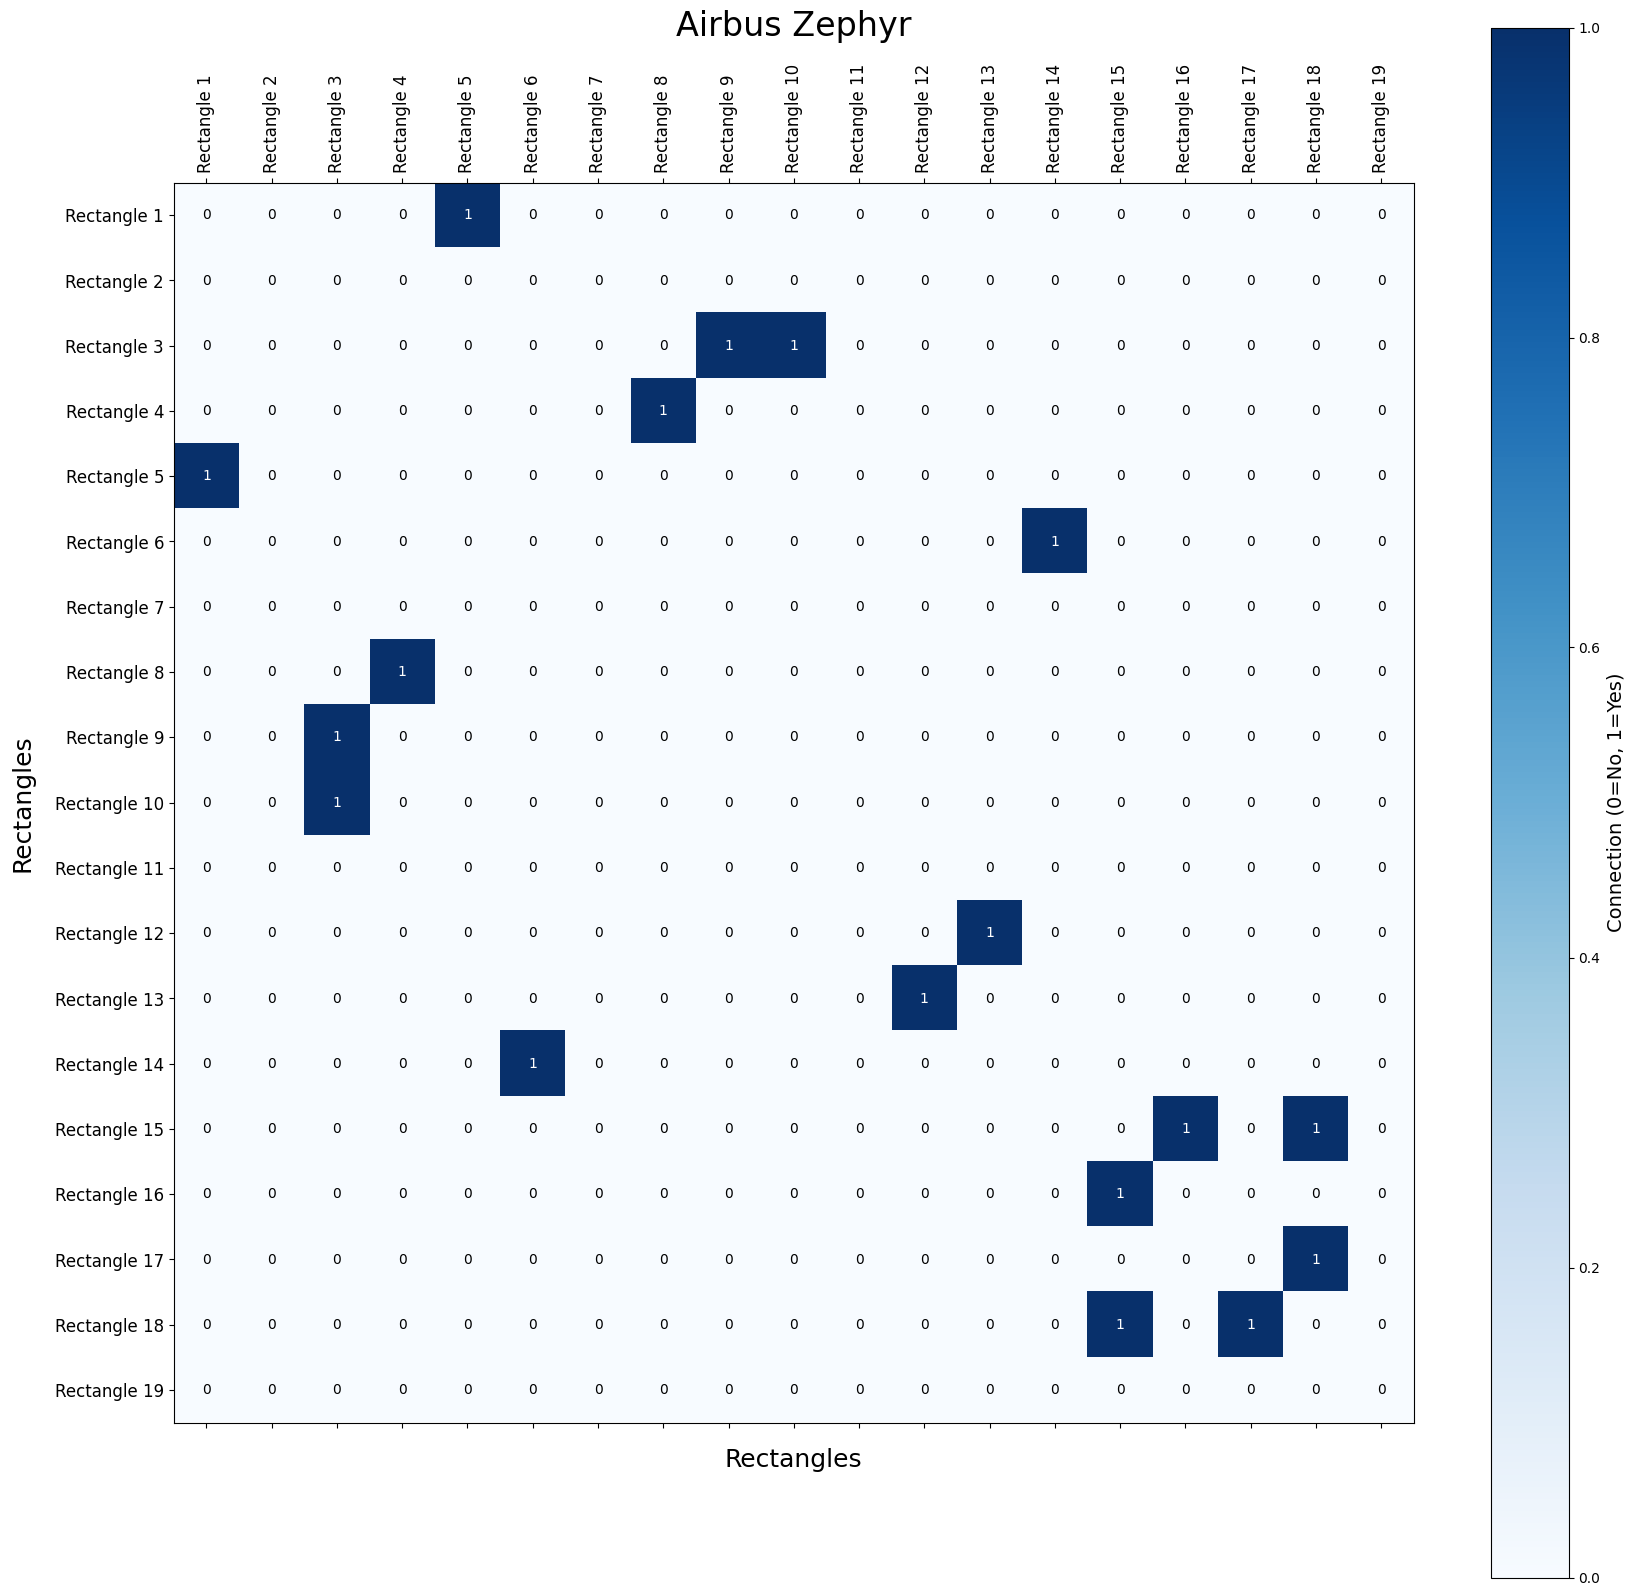

[INFO] Processing 02/03: Airship 11_text_adjacency_matrix.json
[INFO] Adjacency matrix plot saved as: airship_11_adjacency_matrix.png


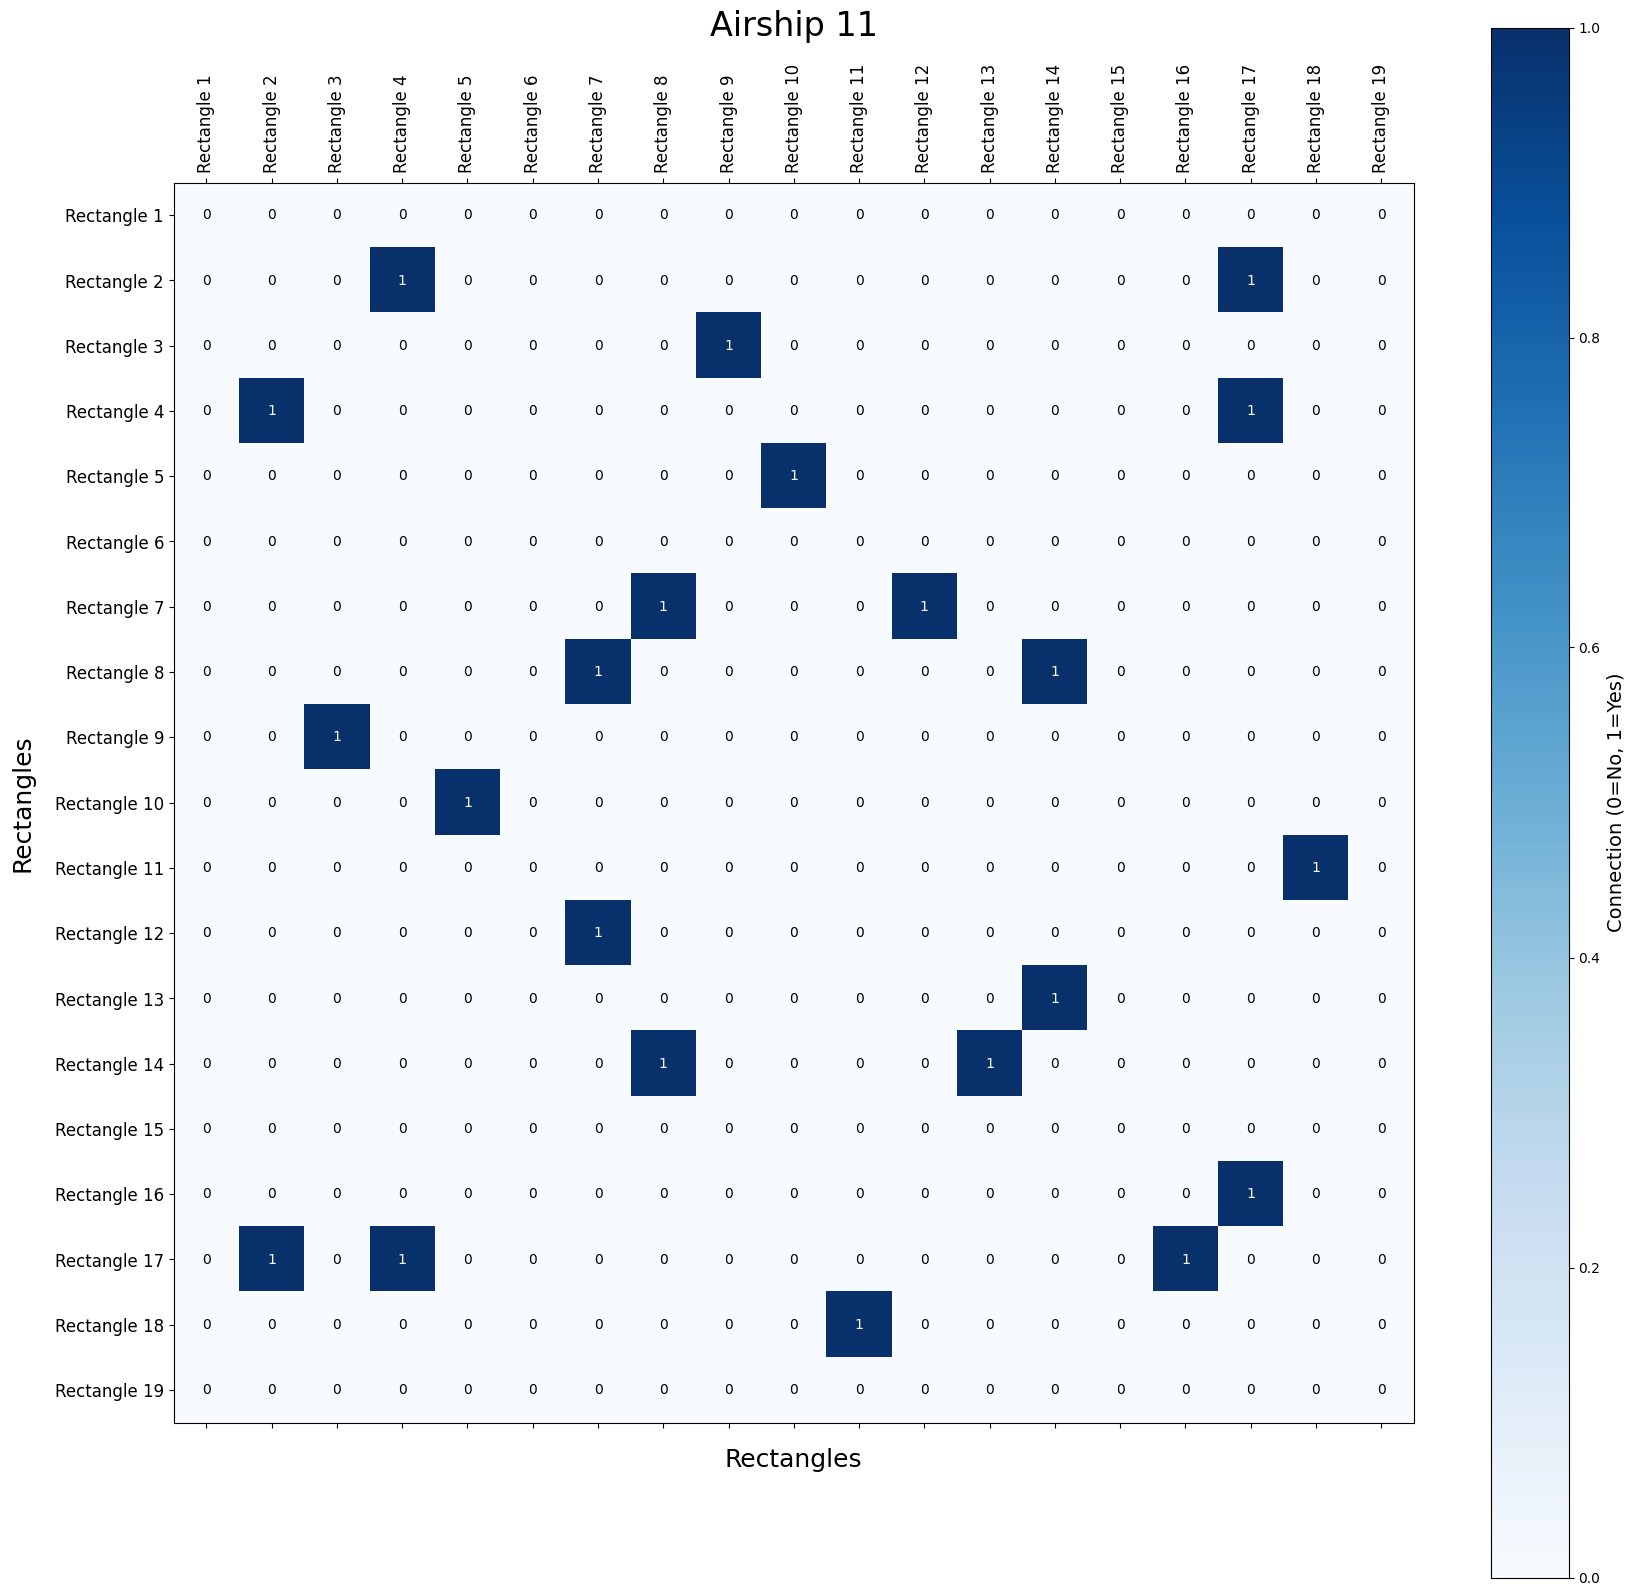

[INFO] Processing 03/03: Ayres S2R & RPAS_text_adjacency_matrix.json
[INFO] Adjacency matrix plot saved as: ayres_s2r_&_rpas_adjacency_matrix.png


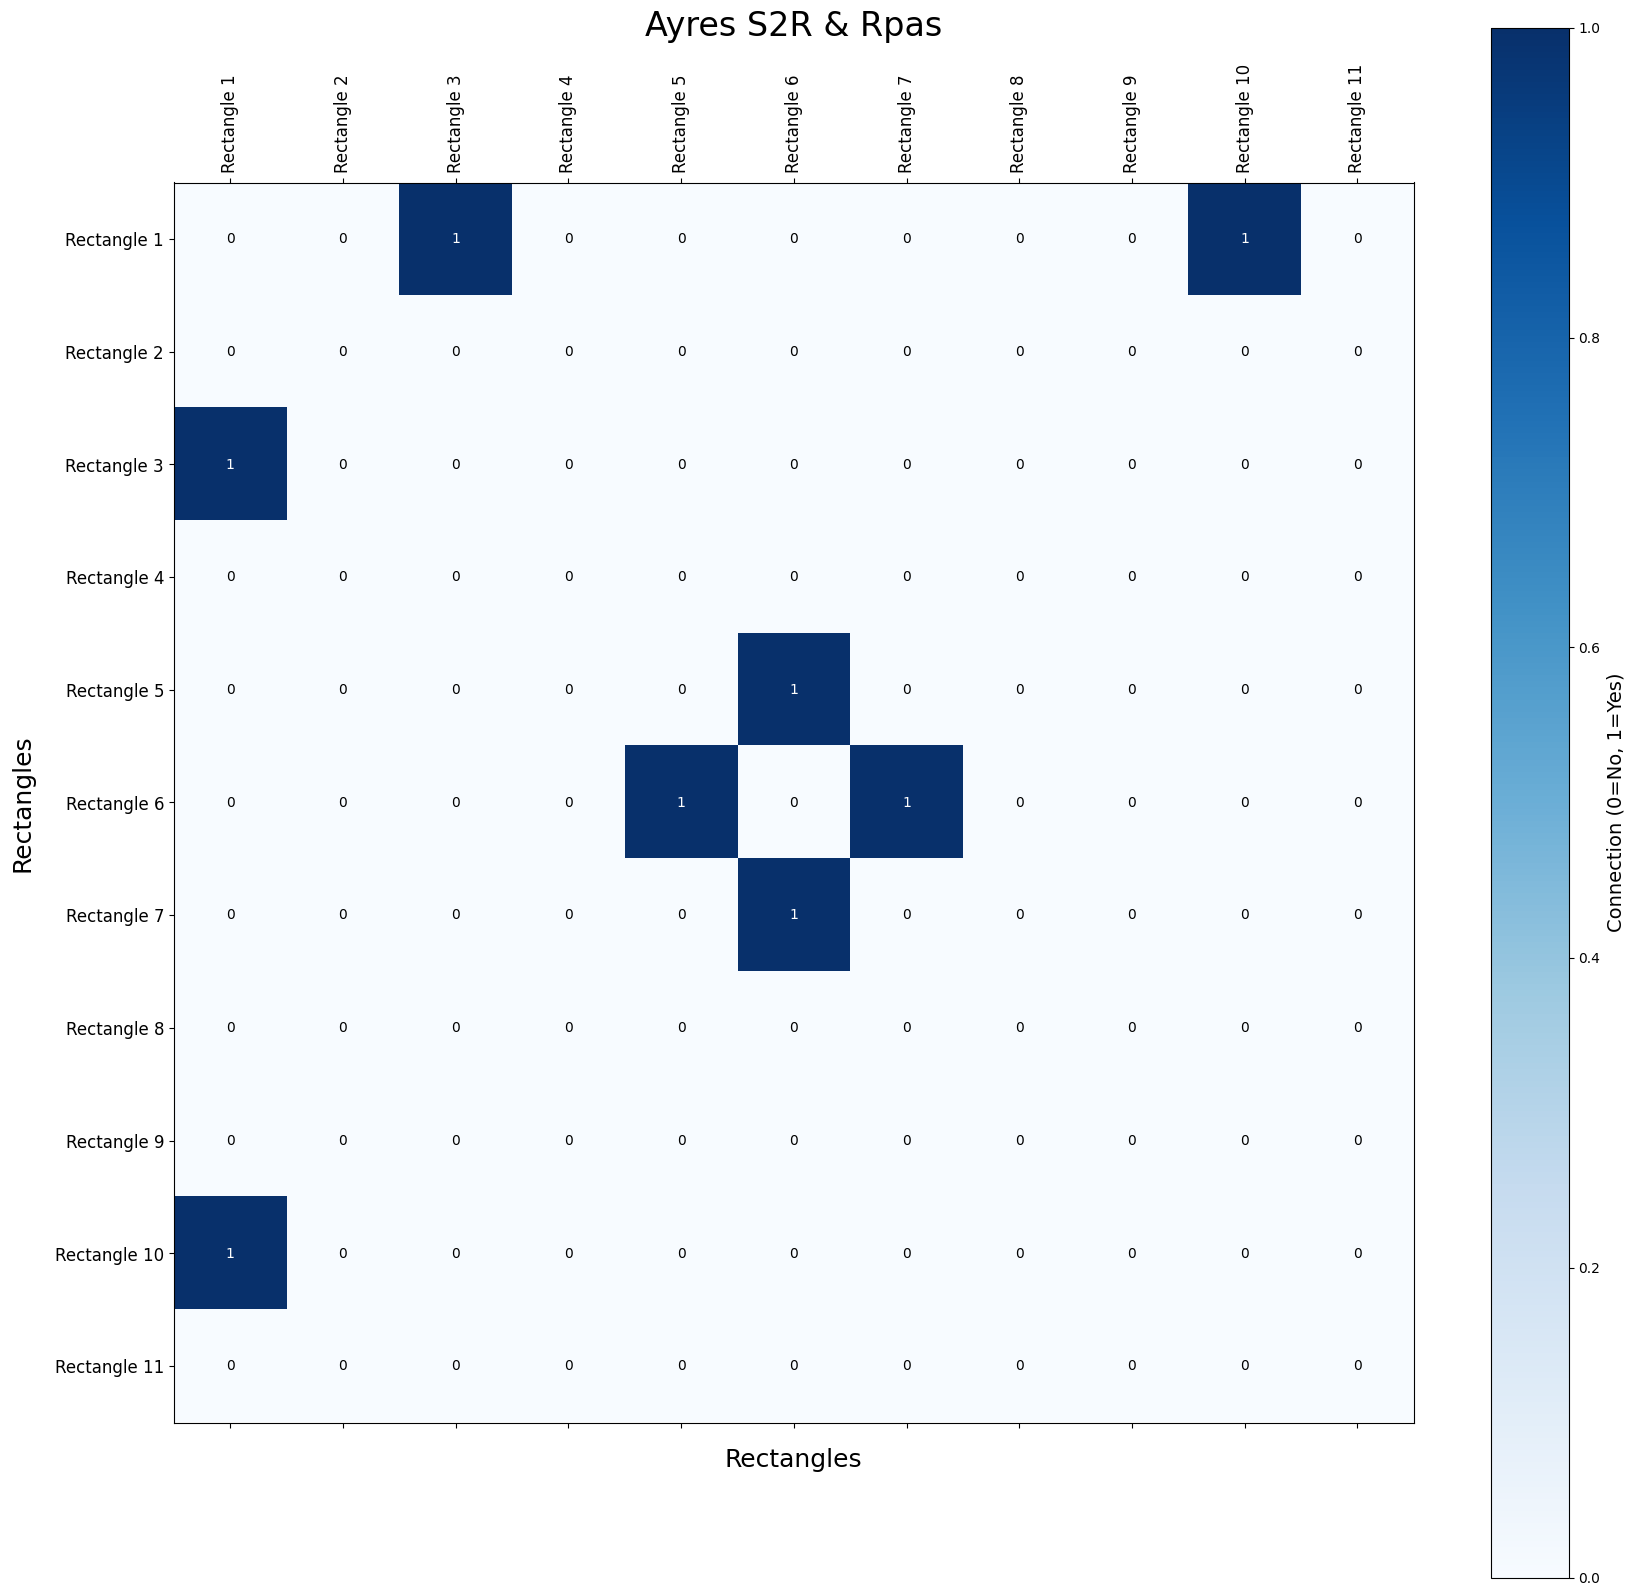


[INFO] Processing Summary:
File                                     | Matrix Size  | Plot File
--------------------------------------------------------------------------------
Airbus Zephyr                            | 19x19           | airbus_zephyr_adjacency_matrix.png
Airship 11                               | 19x19           | airship_11_adjacency_matrix.png
Ayres S2R & RPAS                         | 11x11           | ayres_s2r_&_rpas_adjacency_matrix.png

[SUCCESS] All files processed successfully


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

def plot_adjacency_matrix_with_labels(adjacency_matrix, labels, title):
    """
    Plot the adjacency matrix with custom labels and save/display it.
    """
    num_rectangles = adjacency_matrix.shape[0]
    
    # Validate that the number of labels matches the adjacency matrix size
    if num_rectangles != len(labels):
        raise ValueError("Number of labels does not match the dimensions of the adjacency matrix.")
    
    plt.figure(figsize=(20, 20))  # Adjusted for better proportion

    # Create the matrix plot
    plt.matshow(adjacency_matrix, cmap='Blues', fignum=1)

    # Add title and labels with adjusted padding
    plt.title(title, pad=20, fontsize=24)  # Reduced fontsize, adjusted pad
    plt.xlabel('Rectangles', labelpad=15, fontsize=18)  # Reduced fontsize, adjusted labelpad
    plt.ylabel('Rectangles', labelpad=15, fontsize=18)

    # Add custom labels to x and y axes
    plt.xticks(ticks=np.arange(num_rectangles), labels=labels, rotation=90, ha='center', fontsize=12)
    plt.yticks(ticks=np.arange(num_rectangles), labels=labels, fontsize=12)

    # Add gridlines
    plt.grid(False)

    # Add colorbar with adjusted font size
    cbar = plt.colorbar(label='Connection (0=No, 1=Yes)')
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label('Connection (0=No, 1=Yes)', fontsize=14)

    # Annotate cells with values, using white text for darker cells
    for (i, j), value in np.ndenumerate(adjacency_matrix):
        color = 'white' if value == 1 else 'black'
        plt.text(j, i, f'{value:.0f}', ha='center', va='center', color=color, fontsize=10)

    # Save the plot
    plot_filename = f"{title.replace(' ', '_').lower()}_adjacency_matrix.png"
    plt.savefig(plot_filename, bbox_inches='tight')
    print(f"[INFO] Adjacency matrix plot saved as: {plot_filename}")
    
    # Show the plot in the notebook
    plt.show()
    plt.close()

def process_and_plot_adjacency_matrices(rectangle_json_files, adjacency_matrix_files):
    """
    Process all adjacency matrix files and their corresponding rectangle labels to plot.
    """
    if len(rectangle_json_files) != len(adjacency_matrix_files):
        print("[ERROR] Mismatch in the number of rectangle and adjacency matrix files.")
        return

    total_files = len(rectangle_json_files)
    errors = []
    for i, (rect_file, adj_file) in enumerate(zip(rectangle_json_files, adjacency_matrix_files), 1):
        print(f"[INFO] Processing {i:02d}/{total_files:02d}: {os.path.basename(adj_file)}")
        # Load rectangle labels
        if not os.path.exists(rect_file):
            errors.append(f"[ERROR] Rectangle JSON file not found: {rect_file}")
            continue
        
        with open(rect_file, "r") as f:
            rectangle_data = json.load(f)
        
        rectangles = rectangle_data.get("rectangles", [])
        if not rectangles:
            errors.append(f"[ERROR] No 'rectangles' key found in {rect_file}")
            continue

        labels = [f"Rectangle {i + 1}" for i in range(len(rectangles))]

        # Load adjacency matrix
        if not os.path.exists(adj_file):
            errors.append(f"[ERROR] Adjacency matrix file not found: {adj_file}")
            continue
        
        with open(adj_file, "r") as f:
            adjacency_matrix = np.array(json.load(f))

        if adjacency_matrix.shape[0] != len(labels):
            errors.append(f"[ERROR] Mismatch between adjacency matrix size ({adjacency_matrix.shape[0]}) and number of labels ({len(labels)}) for {adj_file}")
            continue

        # Generate title from rectangle file name
        title = os.path.basename(rect_file).replace("_text.json", "").replace("_", " ").title()

        # Plot adjacency matrix
        plot_adjacency_matrix_with_labels(adjacency_matrix, labels, title)

    # Summary
    print("\n[INFO] Processing Summary:")
    print(f"{'File':<40} | {'Matrix Size':<12} | {'Plot File'}")
    print("-" * 80)
    for rect_file, adj_file in zip(rectangle_json_files, adjacency_matrix_files):
        if os.path.exists(adj_file):
            base_name = os.path.splitext(os.path.basename(rect_file))[0].replace("_text", "")
            plot_file = f"{base_name.replace(' ', '_').lower()}_adjacency_matrix.png"
            with open(adj_file, "r") as f:
                matrix = np.array(json.load(f))
            print(f"{base_name:<40} | {matrix.shape[0]}x{matrix.shape[1]:<12} | {plot_file}")
    
    if errors:
        print("\n[ERROR SUMMARY]")
        print("\n".join(errors))
    else:
        print("\n[SUCCESS] All files processed successfully")

# Usage Example
if 'rectangle_json_files' in globals() and 'adjacency_matrix_files' in globals():
    print("[INFO] Plotting adjacency matrices for all files...")
    process_and_plot_adjacency_matrices(rectangle_json_files, adjacency_matrix_files)
else:
    print("[ERROR] Required variables (rectangle_json_files or adjacency_matrix_files) are missing.")

In [17]:
import networkx as nx
import numpy as np
import json
import os

# Initialize a global list to store GraphML file locations
graphml_files = []

def generate_graphml(rectangle_json_file, adjacency_matrix_file, output_directory="graphml_files"):
    """
    Generate a GraphML file for a single pair of rectangle JSON and adjacency matrix file.
    """
    # Load rectangle text mapping JSON
    if not os.path.exists(rectangle_json_file):
        print(f"[ERROR] Rectangle JSON file not found: {rectangle_json_file}. Skipping.")
        return
    
    with open(rectangle_json_file, "r") as file:
        data = json.load(file)

    # Create a dictionary mapping rectangle numbers to their summarised text
    rectangle_text_map = {str(item["Rectangle No"]): item["Text"] for item in data["rectangles"]}

    # Load the adjacency matrix
    if not os.path.exists(adjacency_matrix_file):
        print(f"[ERROR] Adjacency matrix file not found: {adjacency_matrix_file}. Skipping.")
        return

    with open(adjacency_matrix_file, "r") as file:
        adjacency_matrix = np.array(json.load(file))

    # Initialize a graph
    graph = nx.Graph()

    # Add nodes with attributes (rectangle number and text)
    for rect_no, text in rectangle_text_map.items():
        graph.add_node(rect_no, label=f"Rectangle {rect_no}", text=text)

    # Add edges based on the adjacency matrix
    num_rectangles = adjacency_matrix.shape[0]
    for i in range(num_rectangles):
        for j in range(num_rectangles):
            if adjacency_matrix[i, j]:  # If there is a connection
                graph.add_edge(str(i + 1), str(j + 1))  # Rectangle numbers start from 1

    # Create output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # Generate GraphML file name based on rectangle JSON file
    graphml_filename = os.path.join(
        output_directory, f"{os.path.splitext(os.path.basename(rectangle_json_file))[0]}_graph.graphml"
    )
    
    # Save the graph to a GraphML file
    nx.write_graphml(graph, graphml_filename)
    print(f"[SUCCESS] GraphML file created: {graphml_filename}")
    print(f"  Nodes: {graph.number_of_nodes()}, Edges: {graph.number_of_edges()}")

    # Append the file location to the global graphml_files list
    graphml_files.append(graphml_filename)

def generate_graphml_files(rectangle_json_files, adjacency_matrix_files, output_directory="graphml_files"):
    """
    Generate GraphML files for all rectangle JSON and adjacency matrix file pairs.
    """
    if not rectangle_json_files or not adjacency_matrix_files:
        print("[ERROR] Either 'rectangle_json_files' or 'adjacency_matrix_files' is empty.")
        return

    if len(rectangle_json_files) != len(adjacency_matrix_files):
        print(f"[ERROR] Mismatch in the number of rectangle JSON files and adjacency matrix files.")
        print(f"Rectangle files: {len(rectangle_json_files)}, Adjacency matrix files: {len(adjacency_matrix_files)}")
        return

    total_files = len(rectangle_json_files)
    errors = []
    for i, (rect_file, adj_file) in enumerate(zip(rectangle_json_files, adjacency_matrix_files), 1):
        print(f"[INFO] Processing {i:02d}/{total_files:02d}: {os.path.basename(rect_file)}")
        generate_graphml(rect_file, adj_file, output_directory)

    # Print summary of generated GraphML files
    print("\n[INFO] Processing Summary:")
    print(f"{'File':<40} | {'Nodes':<8} | {'Edges':<8} | {'GraphML File'}")
    print("-" * 80)
    for graphml_file in graphml_files:
        try:
            graph = nx.read_graphml(graphml_file)
            base_name = os.path.splitext(os.path.basename(graphml_file))[0].replace("_graph", "")
            print(f"{base_name:<40} | {graph.number_of_nodes():<8} | {graph.number_of_edges():<8} | {graphml_file}")
        except Exception as e:
            errors.append(f"[ERROR] Failed to read {graphml_file}: {e}")

    print(f"\n[SUCCESS] Generated {len(graphml_files)}/{total_files} GraphML files")
    if errors:
        print("\n[ERROR SUMMARY]")
        print("\n".join(errors))

# Usage Example
if 'rectangle_json_files' in globals() and 'adjacency_matrix_files' in globals():
    print("[INFO] Generating GraphML files for all processed files...")
    generate_graphml_files(rectangle_json_files, adjacency_matrix_files)
else:
    print("[ERROR] Required variables (rectangle_json_files or adjacency_matrix_files) are missing.")

[INFO] Generating GraphML files for all processed files...
[INFO] Processing 01/03: Airbus Zephyr_text.json
[SUCCESS] GraphML file created: graphml_files/Airbus Zephyr_text_graph.graphml
  Nodes: 19, Edges: 9
[INFO] Processing 02/03: Airship 11_text.json
[SUCCESS] GraphML file created: graphml_files/Airship 11_text_graph.graphml
  Nodes: 19, Edges: 11
[INFO] Processing 03/03: Ayres S2R & RPAS_text.json
[SUCCESS] GraphML file created: graphml_files/Ayres S2R & RPAS_text_graph.graphml
  Nodes: 11, Edges: 4

[INFO] Processing Summary:
File                                     | Nodes    | Edges    | GraphML File
--------------------------------------------------------------------------------
Airbus Zephyr_text                       | 19       | 9        | graphml_files/Airbus Zephyr_text_graph.graphml
Airship 11_text                          | 19       | 11       | graphml_files/Airship 11_text_graph.graphml
Ayres S2R & RPAS_text                    | 11       | 4        | graphml_files/Ayr

In [18]:
!pip install pandas

[INFO] Processing 01/03: Airbus Zephyr_text_graph.graphml


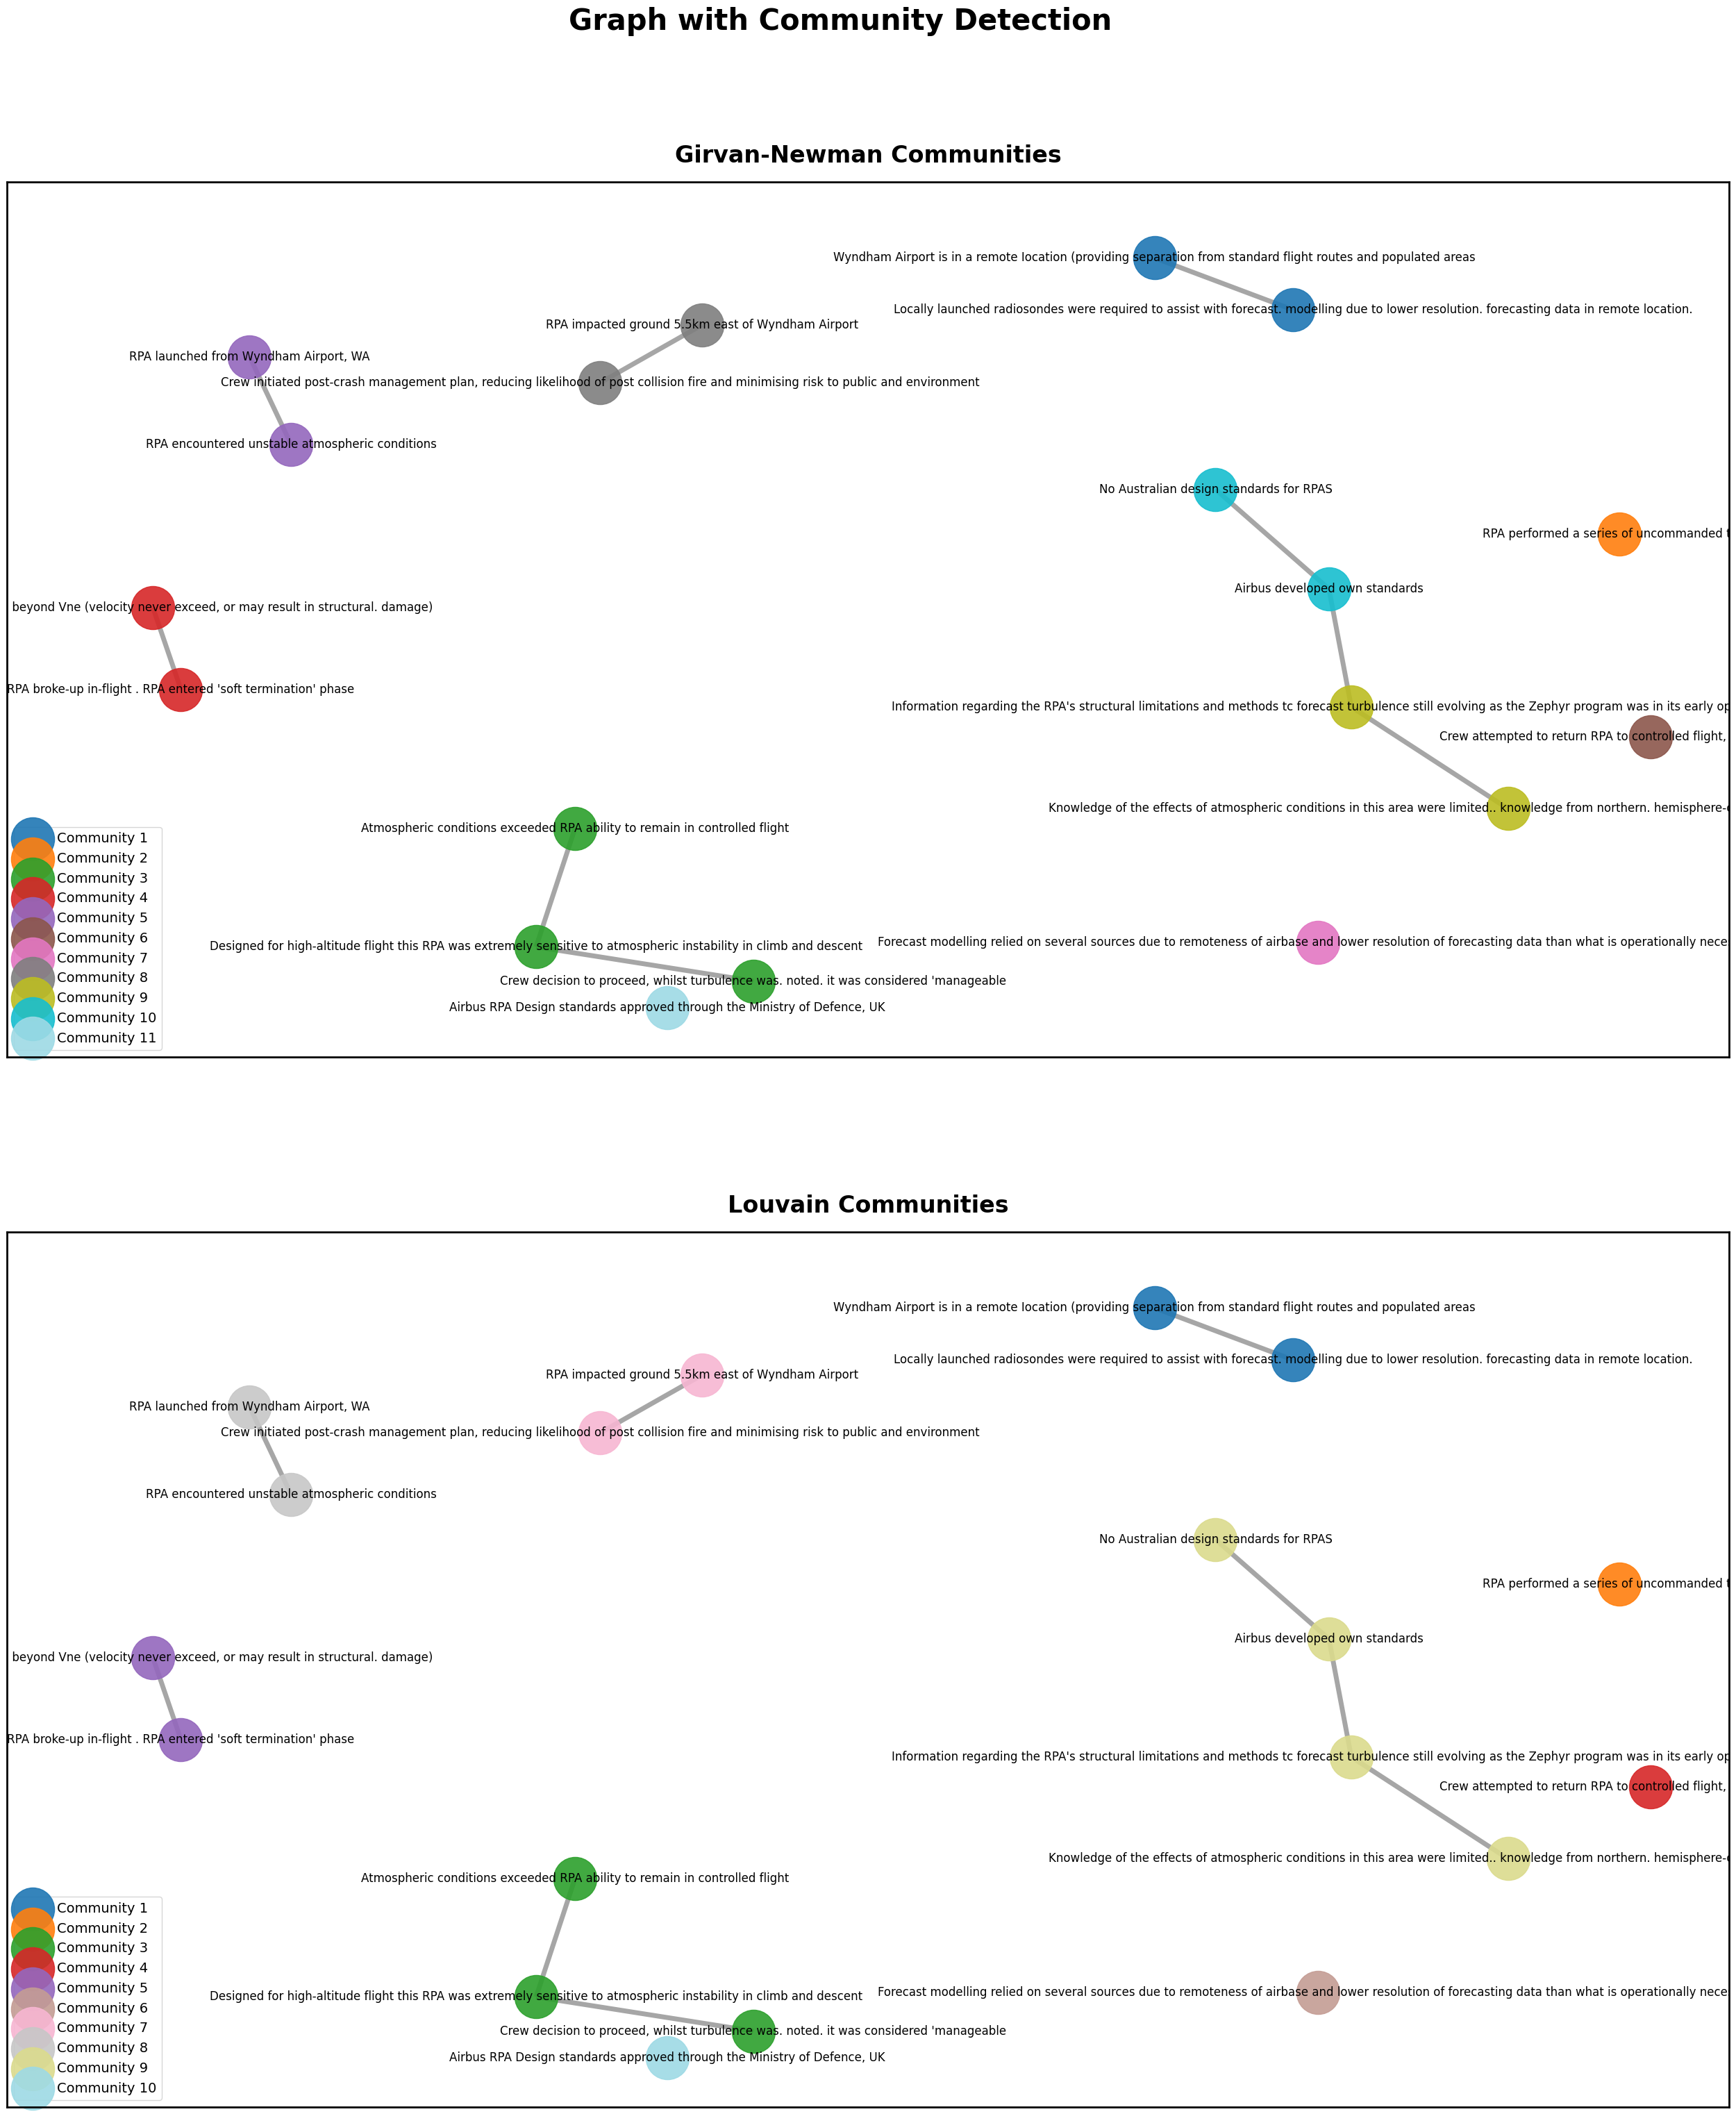

[SUCCESS] Community plot saved to: community_results/Airbus Zephyr_text_graph_communities.png
[SUCCESS] Community results saved to: community_results/Airbus Zephyr_text_graph_community_results.json

[INFO] Community Detection Results:
 Girvan-Newman Count  Girvan-Newman Modularity  Louvain Count  Louvain Modularity                                                  Plot Path
                  11                  0.734568             10            0.790123 community_results/Airbus Zephyr_text_graph_communities.png
[INFO] Processed graphml_files/Airbus Zephyr_text_graph.graphml successfully.

[INFO] Processing 02/03: Airship 11_text_graph.graphml


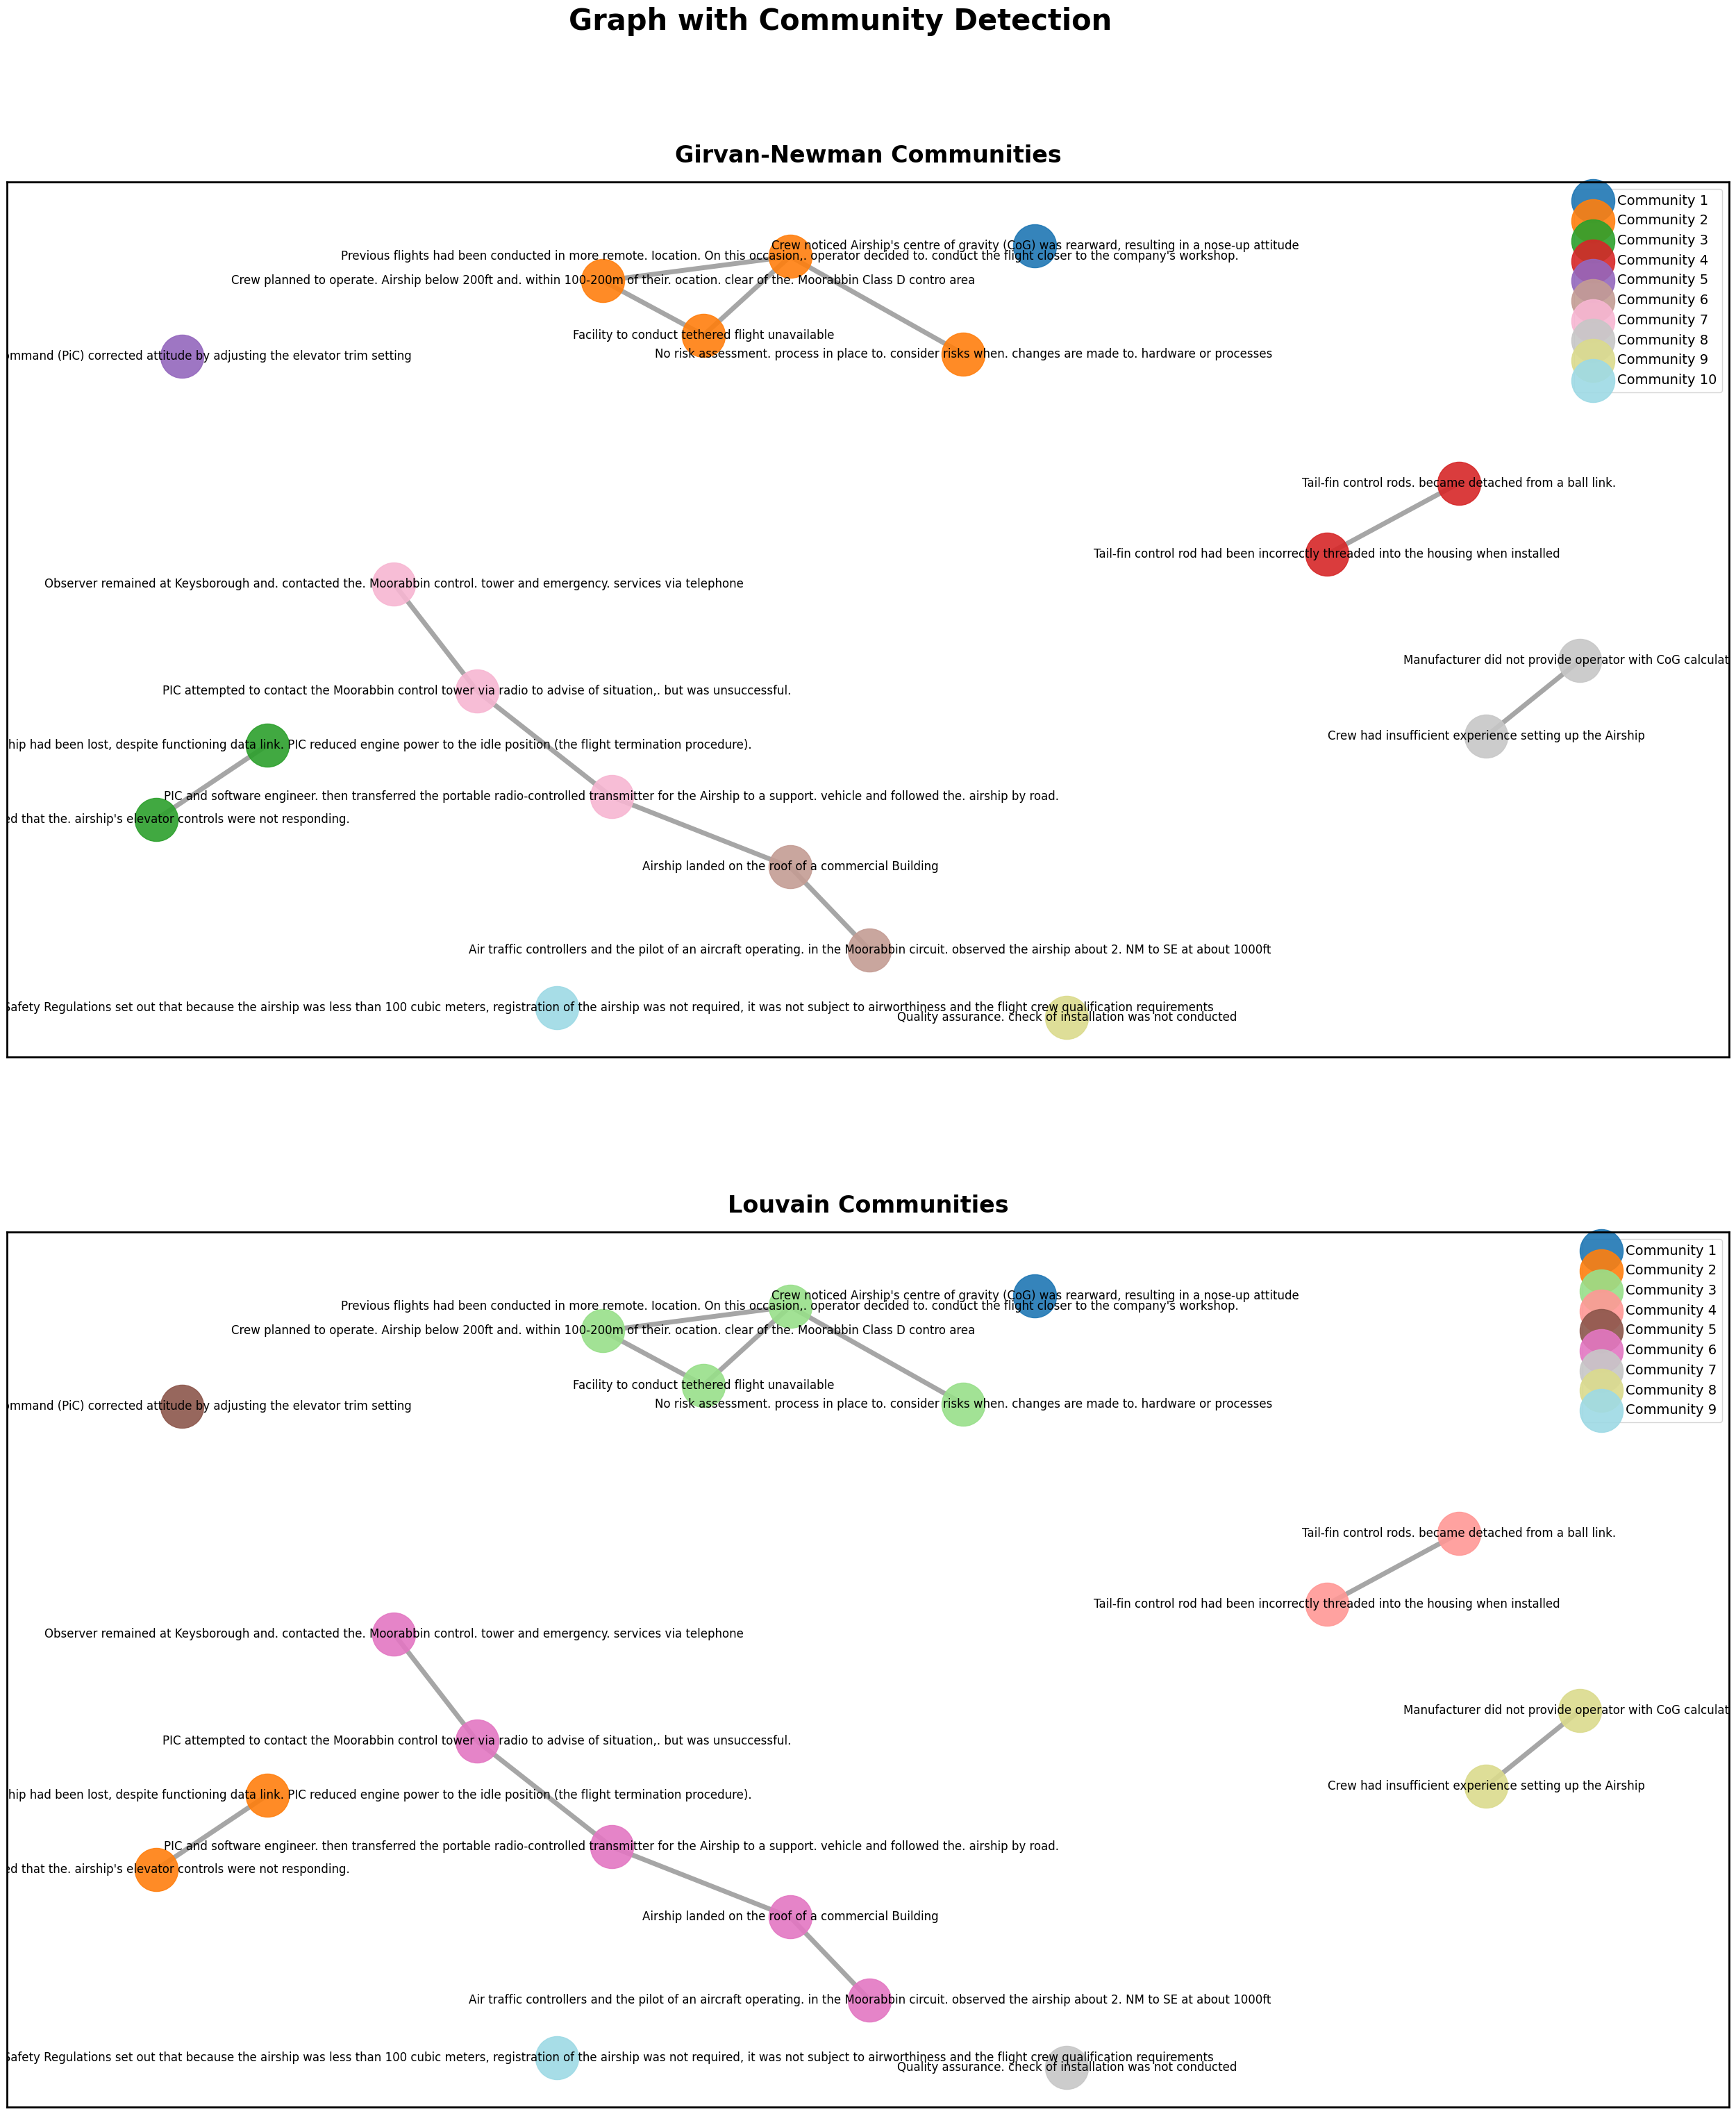

[SUCCESS] Community plot saved to: community_results/Airship 11_text_graph_communities.png
[SUCCESS] Community results saved to: community_results/Airship 11_text_graph_community_results.json

[INFO] Community Detection Results:
 Girvan-Newman Count  Girvan-Newman Modularity  Louvain Count  Louvain Modularity                                               Plot Path
                  10                  0.681818              9            0.710744 community_results/Airship 11_text_graph_communities.png
[INFO] Processed graphml_files/Airship 11_text_graph.graphml successfully.

[INFO] Processing 03/03: Ayres S2R & RPAS_text_graph.graphml


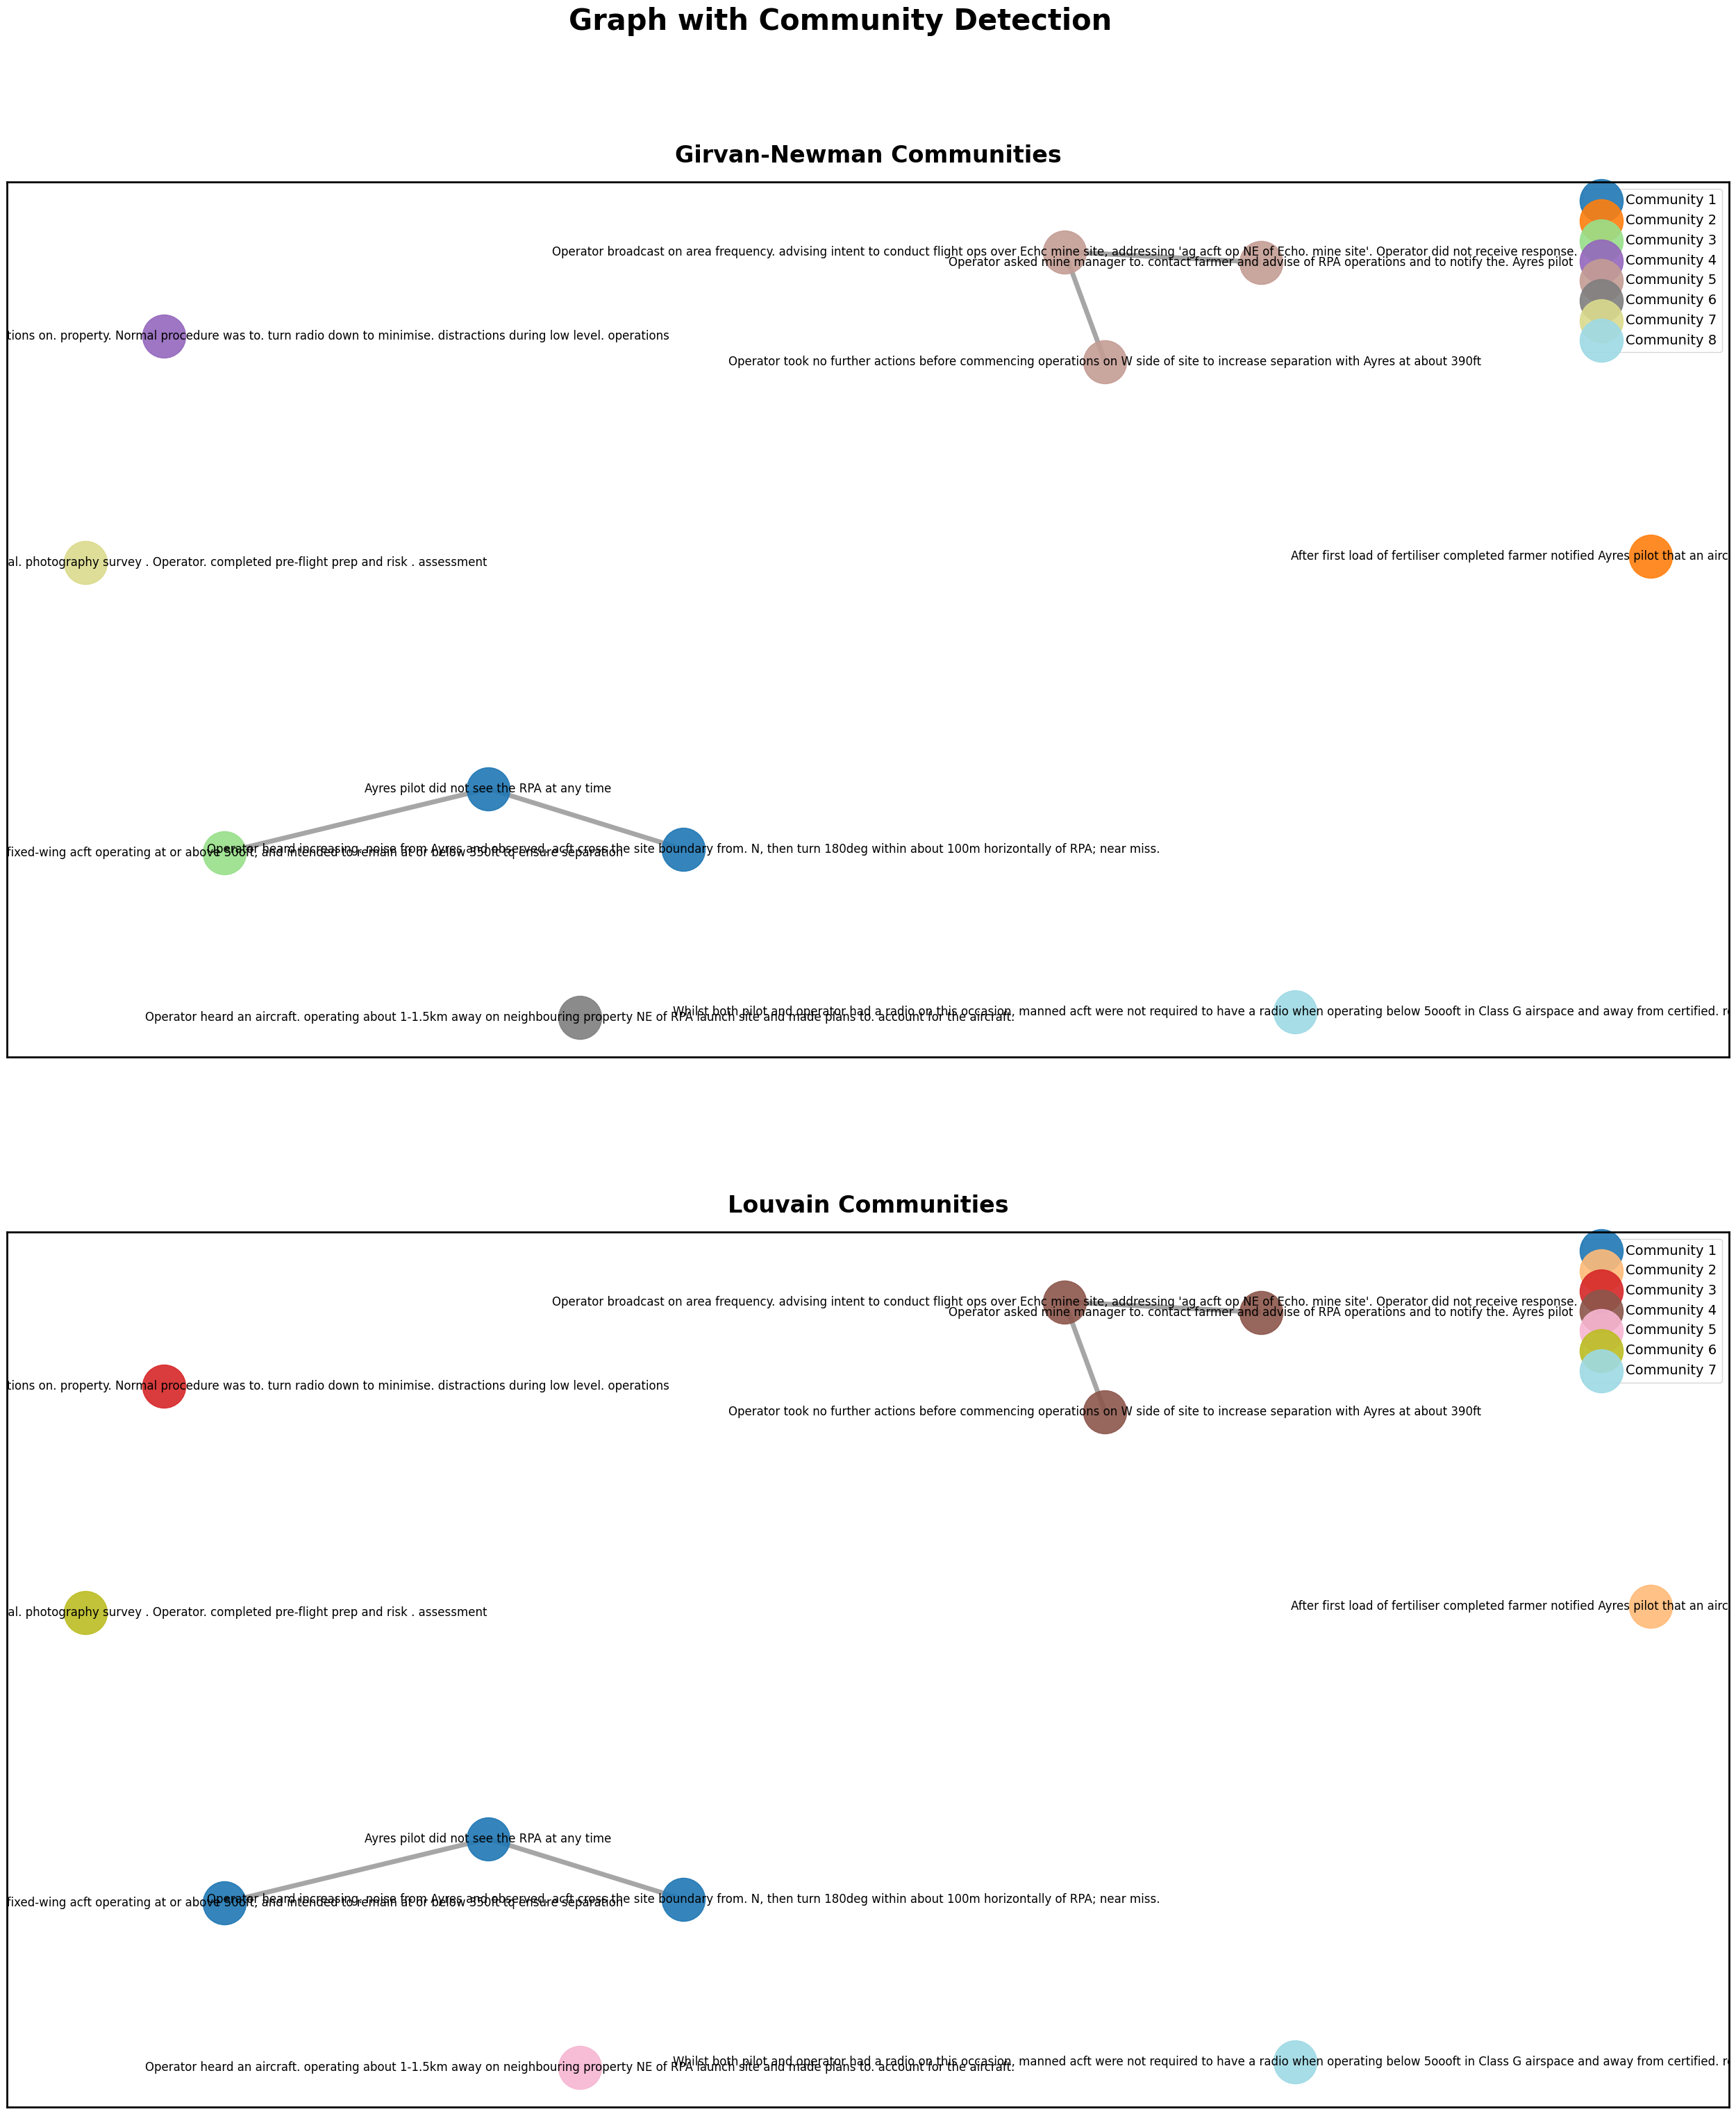

[SUCCESS] Community plot saved to: community_results/Ayres S2R & RPAS_text_graph_communities.png
[SUCCESS] Community results saved to: community_results/Ayres S2R & RPAS_text_graph_community_results.json

[INFO] Community Detection Results:
 Girvan-Newman Count  Girvan-Newman Modularity  Louvain Count  Louvain Modularity                                                     Plot Path
                   8                   0.34375              7                 0.5 community_results/Ayres S2R & RPAS_text_graph_communities.png
[INFO] Processed graphml_files/Ayres S2R & RPAS_text_graph.graphml successfully.


[INFO] Community Detection Summary:
File                                     | GN Count   | GN Mod       | LV Count   | LV Mod       | Plot File
----------------------------------------------------------------------------------------------------
Airbus Zephyr_text_graph                 | 11         | 0.7346       | 10         | 0.7901       | community_results/Airbus Zephyr_text_graph_

In [19]:
import networkx as nx
import json
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman, louvain_communities
from networkx.algorithms.community.quality import modularity
import os
import pandas as pd

# Global variables to store results
community_results_global = {}
community_summaries = {}
labels = {}

# Load rectangle text mapping
def load_rectangle_text_mapping(rectangle_json_file):
    with open(rectangle_json_file, "r") as file:
        data = json.load(file)
    return {str(item["Rectangle No"]): item["Text"] for item in data["rectangles"]}

# Girvan-Newman community detection
def girvan_newman_communities(G, depth=1):
    communities_generator = girvan_newman(G)
    for _ in range(depth):
        try:
            communities = next(communities_generator)
        except StopIteration:
            print("[INFO] Reached the end of community splits.")
            return []
    return [list(community) for community in communities]

# Louvain community detection
def louvain_community_detection(G):
    return list(louvain_communities(G))

# Calculate modularity
def calculate_modularity(G, communities):
    if G.number_of_edges() == 0:
        return 0.0  # Return 0 for empty graphs to avoid division by zero
    return modularity(G, communities)

# Visualise graph with communities
def draw_graph_with_communities(G, communities_gn, communities_lv, node_labels, output_directory, output_filename):
    pos = nx.spring_layout(G, seed=42, k=0.6)
    fig, axes = plt.subplots(2, 1, figsize=(32, 36))  # Changed to 2 rows, 1 column (top-bottom)

    colors_gn = plt.get_cmap('tab20', max(len(communities_gn), 1))  # Ensure at least 1 color
    colors_lv = plt.get_cmap('tab20', max(len(communities_lv), 1))

    # Girvan-Newman (Top)
    axes[0].set_title('Girvan-Newman Communities', fontsize=24, fontweight='bold', pad=20)
    for i, comm in enumerate(communities_gn):
        nx.draw_networkx_nodes(G, pos, nodelist=comm, ax=axes[0], node_color=[colors_gn(i)], node_size=2000, alpha=0.9, label=f'Community {i + 1}')
    nx.draw_networkx_edges(G, pos, ax=axes[0], alpha=0.7, edge_color="gray", width=5)
    nx.draw_networkx_labels(G, pos, labels=node_labels, ax=axes[0], font_size=12, font_color="black")
    # Ensure bounding box is visible
    for spine in axes[0].spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(2)
        spine.set_zorder(10)  # Bring spines to the foreground
    axes[0].set_facecolor('white')  # Set background to white for contrast
    axes[0].legend(fontsize=14, loc='best')

    # Louvain (Bottom)
    axes[1].set_title('Louvain Communities', fontsize=24, fontweight='bold', pad=20)
    for i, comm in enumerate(communities_lv):
        nx.draw_networkx_nodes(G, pos, nodelist=comm, ax=axes[1], node_color=[colors_lv(i)], node_size=2000, alpha=0.9, label=f'Community {i + 1}')
    nx.draw_networkx_edges(G, pos, ax=axes[1], alpha=0.7, edge_color="gray", width=5)
    nx.draw_networkx_labels(G, pos, labels=node_labels, ax=axes[1], font_size=12, font_color="black")
    # Ensure bounding box is visible
    for spine in axes[1].spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(2)
        spine.set_zorder(10)  # Bring spines to the foreground
    axes[1].set_facecolor('white')  # Set background to white for contrast
    axes[1].legend(fontsize=14, loc='best')

    plt.suptitle('Graph with Community Detection', fontsize=30, fontweight='bold', y=0.95)

    os.makedirs(output_directory, exist_ok=True)
    output_path = os.path.join(output_directory, f"{output_filename}_communities.png")
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()
    print(f"[SUCCESS] Community plot saved to: {output_path}")

    return output_path

# Display results in a table
def display_results_as_table(community_results):
    df = pd.DataFrame([{
        'Girvan-Newman Count': community_results["Girvan-Newman"]["Count"],
        'Girvan-Newman Modularity': community_results["Girvan-Newman"]["Modularity"],
        'Louvain Count': community_results["Louvain"]["Count"],
        'Louvain Modularity': community_results["Louvain"]["Modularity"],
        'Plot Path': community_results["Plot Path"]
    }])
    print("\n[INFO] Community Detection Results:")
    print(df.to_string(index=False))

# Process a single graph
def process_graph(graphml_file, rectangle_json_file, output_directory="community_results", depth=1):
    if not os.path.exists(graphml_file):
        print(f"[ERROR] GraphML file not found: {graphml_file}. Skipping.")
        return

    if not os.path.exists(rectangle_json_file):
        print(f"[ERROR] Rectangle JSON file not found: {rectangle_json_file}. Skipping.")
        return

    # Load graph and rectangle data
    graph = nx.read_graphml(graphml_file, node_type=str)
    rectangle_text_map = load_rectangle_text_mapping(rectangle_json_file)
    node_labels = {node: rectangle_text_map.get(node, f"Node {node}") for node in graph.nodes}

    labels[graphml_file] = list(node_labels.values())

    # Detect communities
    communities_gn = girvan_newman_communities(graph, depth=depth)
    communities_lv = louvain_community_detection(graph)

    if not communities_gn or not communities_lv:
        print(f"[WARNING] No communities detected in {graphml_file}. Skipping.")
        return

    # Visualise and save graph
    output_filename = os.path.splitext(os.path.basename(graphml_file))[0]
    plot_path = draw_graph_with_communities(graph, communities_gn, communities_lv, node_labels, output_directory, output_filename)

    # Calculate modularity with check for empty graph
    girvan_mod = calculate_modularity(graph, communities_gn) if graph.number_of_edges() > 0 else 0.0
    louvain_mod = calculate_modularity(graph, communities_lv) if graph.number_of_edges() > 0 else 0.0

    if graph.number_of_edges() == 0:
        print(f"[WARNING] Graph {graphml_file} has no edges; modularity set to 0.0")

    # Convert sets to lists for JSON serialization
    communities_gn = [list(comm) for comm in communities_gn]
    communities_lv = [list(comm) for comm in communities_lv]

    # Store results
    community_results = {
        "Girvan-Newman": {
            "Communities": communities_gn,
            "Count": len(communities_gn),
            "Modularity": girvan_mod
        },
        "Louvain": {
            "Communities": communities_lv,
            "Count": len(communities_lv),
            "Modularity": louvain_mod
        },
        "Plot Path": plot_path
    }
    community_results_global[graphml_file] = community_results

    summary = {
        "graphml_file": graphml_file,
        "Girvan-Newman": {
            "Count": len(communities_gn),
            "Modularity": girvan_mod
        },
        "Louvain": {
            "Count": len(communities_lv),
            "Modularity": louvain_mod
        }
    }
    community_summaries[graphml_file] = summary

    # Save individual results to a JSON file
    os.makedirs(output_directory, exist_ok=True)
    json_output_file = os.path.join(output_directory, f"{output_filename}_community_results.json")
    with open(json_output_file, "w") as outfile:
        json.dump(community_results, outfile, indent=4)
    print(f"[SUCCESS] Community results saved to: {json_output_file}")

    # Display results in table format
    display_results_as_table(community_results)

    print(f"[INFO] Processed {graphml_file} successfully.\n")

# Process multiple files
def process_multiple_files(graphml_files, rectangle_json_files, output_directory="community_results", depth=1):
    if not graphml_files or not rectangle_json_files:
        print("[ERROR] GraphML or rectangle JSON files are missing.")
        return

    if len(graphml_files) != len(rectangle_json_files):
        print(f"[ERROR] Mismatch in the number of GraphML and rectangle JSON files.")
        return

    total_files = len(graphml_files)
    errors = []
    for i, (graphml_file, rectangle_json_file) in enumerate(zip(graphml_files, rectangle_json_files), 1):
        print(f"[INFO] Processing {i:02d}/{total_files:02d}: {os.path.basename(graphml_file)}")
        process_graph(graphml_file, rectangle_json_file, output_directory, depth)

    # Print summary of results in a table
    print("\n[INFO] Community Detection Summary:")
    print(f"{'File':<40} | {'GN Count':<10} | {'GN Mod':<12} | {'LV Count':<10} | {'LV Mod':<12} | {'Plot File'}")
    print("-" * 100)
    for graphml_file, summary in community_summaries.items():
        base_name = os.path.splitext(os.path.basename(graphml_file))[0]
        plot_file = os.path.join(output_directory, f"{base_name}_communities.png")
        print(f"{base_name:<40} | {summary['Girvan-Newman']['Count']:<10} | {summary['Girvan-Newman']['Modularity']:<12.4f} | {summary['Louvain']['Count']:<10} | {summary['Louvain']['Modularity']:<12.4f} | {plot_file}")

    if errors:
        print("\n[ERROR SUMMARY]")
        print("\n".join(errors))
    else:
        print(f"\n[SUCCESS] Processed {len(community_summaries)}/{total_files} files successfully")

# Usage Example
if (
    'graphml_files' in globals() and graphml_files and
    'rectangle_json_files' in globals() and rectangle_json_files
):
    process_multiple_files(graphml_files, rectangle_json_files, output_directory="community_results", depth=1)
else:
    print("[ERROR] Required variables (graphml_files or rectangle_json_files) are missing.")

In [20]:
!pip install node2vec

In [21]:
import networkx as nx
import os

# Dynamically load all GraphML files stored in the global list
graphs = {}

# Check if graphml_files is defined and not empty
if 'graphml_files' not in globals() or not graphml_files:
    print("[ERROR] 'graphml_files' is not defined or empty. Please generate GraphML files first.")
else:
    total_files = len(graphml_files)
    errors = []
    
    print("[INFO] Starting GraphML file loading...")
    for i, graphml_file in enumerate(graphml_files, 1):
        graph_name = os.path.splitext(os.path.basename(graphml_file))[0]
        print(f"[INFO] Loading {i:02d}/{total_files:02d}: {graphml_file} as '{graph_name}'")
        
        if not os.path.exists(graphml_file):
            errors.append(f"[ERROR] File not found: {graphml_file}")
            continue
        
        try:
            graphs[graph_name] = nx.read_graphml(graphml_file, node_type=str)
        except Exception as e:
            errors.append(f"[ERROR] Failed to load {graphml_file}: {e}")

    # Summary of loaded graphs
    print("\n[INFO] Loaded Graphs Summary:")
    print(f"{'Graph Name':<40} | {'Nodes':<8} | {'Edges':<8} | {'File Path'}")
    print("-" * 80)
    for graph_name, graph in graphs.items():
        print(f"{graph_name:<40} | {graph.number_of_nodes():<8} | {graph.number_of_edges():<8} | {graphml_files[list(graphs.keys()).index(graph_name)]}")

    if errors:
        print("\n[ERROR SUMMARY]")
        print("\n".join(errors))
    else:
        print(f"\n[SUCCESS] Successfully loaded {len(graphs)}/{total_files} GraphML files")

[INFO] Starting GraphML file loading...
[INFO] Loading 01/03: graphml_files/Airbus Zephyr_text_graph.graphml as 'Airbus Zephyr_text_graph'
[INFO] Loading 02/03: graphml_files/Airship 11_text_graph.graphml as 'Airship 11_text_graph'
[INFO] Loading 03/03: graphml_files/Ayres S2R & RPAS_text_graph.graphml as 'Ayres S2R & RPAS_text_graph'

[INFO] Loaded Graphs Summary:
Graph Name                               | Nodes    | Edges    | File Path
--------------------------------------------------------------------------------
Airbus Zephyr_text_graph                 | 19       | 9        | graphml_files/Airbus Zephyr_text_graph.graphml
Airship 11_text_graph                    | 19       | 11       | graphml_files/Airship 11_text_graph.graphml
Ayres S2R & RPAS_text_graph              | 11       | 4        | graphml_files/Ayres S2R & RPAS_text_graph.graphml

[SUCCESS] Successfully loaded 3/3 GraphML files


In [22]:
import json
import os
import networkx as nx

def load_rectangle_text_mapping(graph_name, processed_files_directory):
    """
    Loads rectangle text mapping for a given graph name from the processed files directory.
    Maps node numbers (like '1', '2', ...) to their text content.
    """
    # Adjust file name to match earlier filename convention
    base_name = graph_name.replace("_text_graph", "")
    json_path = os.path.join(processed_files_directory, f"{base_name}_text.json")

    if not os.path.exists(json_path):
        print(f"[ERROR] Rectangle text mapping file not found: {json_path}")
        return {}

    with open(json_path, "r") as infile:
        data = json.load(infile)

    # Create a dictionary mapping node numbers to text content
    return {
        str(rect['Rectangle No']): rect['Text']
        for rect in data.get("rectangles", [])
    }

def girvan_newman_first_level_with_texts(G, rectangle_text_mapping):
    """
    Runs the Girvan-Newman algorithm to find first-level communities and 
    replaces node identifiers with their corresponding text content.
    Also returns valid node identifiers for modularity calculation.
    """
    print("[INFO] Starting Girvan-Newman community detection for first-level communities...")

    try:
        # Generate the first level of communities
        communities_generator = girvan_newman(G)
        first_level_communities = next(communities_generator)
    except StopIteration:
        print("[WARN] No communities could be detected.")
        return [], []

    # Separate communities as node identifiers and mapped text content
    communities_with_texts = []
    communities_with_identifiers = []

    for community in first_level_communities:
        communities_with_texts.append(
            [rectangle_text_mapping.get(node, f"[Text not found for {node}]") for node in community]
        )
        communities_with_identifiers.append(list(community))

    return communities_with_identifiers, communities_with_texts

def process_all_graphs_first_level_with_texts(graphs, processed_files_directory):
    """
    Processes all graphs to detect first-level communities, replacing node identifiers with text content,
    and also returning node identifiers for modularity calculations.
    """
    all_communities = {}  # Store results by graph name
    total_graphs = len(graphs)
    errors = []

    print("[INFO] Starting processing of all graphs for first-level communities...")
    for i, (graph_name, graph) in enumerate(graphs.items(), 1):
        print(f"\n[INFO] Processing {i:02d}/{total_graphs:02d}: {graph_name}")

        # Load rectangle text mapping
        rectangle_text_mapping = load_rectangle_text_mapping(graph_name, processed_files_directory)
        if not rectangle_text_mapping:
            errors.append(f"[ERROR] Skipping graph '{graph_name}' due to missing text mapping")
            continue

        try:
            # Run Girvan-Newman algorithm for first-level communities
            communities_with_identifiers, communities_with_texts = girvan_newman_first_level_with_texts(graph, rectangle_text_mapping)
            all_communities[graph_name] = {
                "file": f"{graph_name}.graphml",
                "communities": communities_with_texts
            }

            print(f"[SUCCESS] First-level communities detected for '{graph_name}':")
            print(f"{'Community':<12} | {'Nodes'}")
            print("-" * 60)
            for idx, community in enumerate(communities_with_texts, start=1):
                nodes_str = ", ".join(community)
                # Wrap long node lists at 60 characters
                node_lines = [nodes_str[i:i+60] for i in range(0, len(nodes_str), 60)]
                print(f"Community {idx:<10} | {node_lines[0]}")
                for line in node_lines[1:]:
                    print(f"{'':<12} | {line}")

        except Exception as e:
            errors.append(f"[ERROR] Failed to process graph '{graph_name}': {e}")

    # Summary
    print("\n[INFO] Processing Summary:")
    print(f"{'Graph Name':<40} | {'Communities':<12} | {'File'}")
    print("-" * 80)
    for graph_name, result in all_communities.items():
        print(f"{graph_name:<40} | {len(result['communities']):<12} | {result['file']}")

    if errors:
        print("\n[ERROR SUMMARY]")
        print("\n".join(errors))
    else:
        print(f"\n[SUCCESS] Processed {len(all_communities)}/{total_graphs} graphs successfully")

    return all_communities

# Locate the processed files directory dynamically (assumed from previous definition)
def find_processed_files_directory(file_paths):
    if not file_paths:
        print("[ERROR] No files provided to locate 'processed_files' directory.")
        return None
    parent_folder = os.path.dirname(os.path.dirname(file_paths[0]))
    processed_files_path = os.path.join(parent_folder, "processed_files")
    if os.path.exists(processed_files_path):
        return processed_files_path
    print("[ERROR] 'processed_files' directory not found.")
    return None

# Run the function and save results
if 'graphml_files' in globals() and graphml_files and 'graphs' in globals() and graphs:
    processed_files_directory = find_processed_files_directory(graphml_files)
    if processed_files_directory:
        print(f"[INFO] Using processed files directory: {processed_files_directory}")
        all_graph_first_level_communities_with_texts = process_all_graphs_first_level_with_texts(graphs, processed_files_directory)

        # Save the results to a JSON file
        output_file_with_texts = "graph_first_level_communities_with_texts.json"
        with open(output_file_with_texts, "w") as f:
            json.dump(all_graph_first_level_communities_with_texts, f, indent=4)
        print(f"\n[INFO] First-level communities with text content have been saved to '{output_file_with_texts}'.")
    else:
        print("[ERROR] Could not locate processed files directory.")
else:
    print("[ERROR] Required variables ('graphml_files' or 'graphs') are missing.")

[INFO] Using processed files directory: processed_files
[INFO] Starting processing of all graphs for first-level communities...

[INFO] Processing 01/03: Airbus Zephyr_text_graph
[INFO] Starting Girvan-Newman community detection for first-level communities...
[SUCCESS] First-level communities detected for 'Airbus Zephyr_text_graph':
Community    | Nodes
------------------------------------------------------------
Community 1          | Locally launched radiosondes were required to assist with fo
             | recast. modelling due to lower resolution. forecasting data 
             | in remote location., Wyndham Airport is in a remote Iocation
             |  (providing separation from standard flight routes and popul
             | ated areas
Community 2          | RPA performed a series of uncommanded turns
Community 3          | Designed for high-altitude flight this RPA was extremely sen
             | sitive to atmospheric instability in climb and descent, Crew
             |  de

In [23]:
import networkx as nx
import json
import numpy as np
from networkx.algorithms.community.quality import modularity
import os

def calculate_modularity(G, communities):
    """
    Calculates the modularity of a graph based on the detected communities.
    """
    # Ensure communities are passed as sets of node identifiers
    if G.number_of_edges() == 0:
        return 0.0  # Handle empty graphs
    return modularity(G, [set(community) for community in communities])

def load_rectangle_text_mapping(graph_name, processed_files_directory):
    """
    Loads rectangle text mapping for a given graph name from the processed files directory.
    Maps node numbers (like '1', '2', ...) to their text content.
    """
    base_name = graph_name.replace("_text_graph", "")
    json_path = os.path.join(processed_files_directory, f"{base_name}_text.json")

    if not os.path.exists(json_path):
        print(f"[ERROR] Rectangle text mapping file not found: {json_path}")
        return {}

    with open(json_path, "r") as infile:
        data = json.load(infile)

    return {
        str(rect['Rectangle No']): rect['Text']
        for rect in data.get("rectangles", [])
    }

def girvan_newman_first_level_with_texts(G, rectangle_text_mapping):
    """
    Runs the Girvan-Newman algorithm to find first-level communities and 
    replaces node identifiers with their corresponding text content.
    Also returns valid node identifiers for modularity calculation.
    """
    print("[INFO] Starting Girvan-Newman community detection for first-level communities...")

    try:
        communities_generator = girvan_newman(G)
        first_level_communities = next(communities_generator)
    except StopIteration:
        print("[WARN] No communities could be detected.")
        return [], []

    communities_with_texts = []
    communities_with_identifiers = []

    for community in first_level_communities:
        communities_with_texts.append(
            [rectangle_text_mapping.get(node, f"[Text not found for {node}]") for node in community]
        )
        communities_with_identifiers.append(list(community))

    return communities_with_identifiers, communities_with_texts

# Process modularity for all graphs
if 'graphs' in globals() and graphs and 'processed_files_directory' in globals():
    modularities = []
    total_graphs = len(graphs)
    errors = []

    print("[INFO] Starting modularity calculation for all graphs...")
    for i, (graph_name, graph) in enumerate(graphs.items(), 1):
        print(f"\n[INFO] Processing {i:02d}/{total_graphs:02d}: {graph_name}")
        
        # Load rectangle text mapping
        rectangle_text_mapping = load_rectangle_text_mapping(graph_name, processed_files_directory)
        if not rectangle_text_mapping:
            errors.append(f"[ERROR] Skipping graph '{graph_name}' due to missing text mapping")
            continue

        # Detect first-level communities and get node identifiers
        communities_with_identifiers, _ = girvan_newman_first_level_with_texts(graph, rectangle_text_mapping)

        # Convert to valid node identifier communities for modularity calculation
        node_identifier_communities = [
            set(community) for community in communities_with_identifiers if set(community).issubset(graph.nodes)
        ]
        
        if node_identifier_communities:
            # Calculate modularity based on the detected communities
            mod = calculate_modularity(graph, node_identifier_communities)
            modularities.append(mod)
            print(f"[SUCCESS] Modularity for {graph_name}: {mod:.4f}")
        else:
            errors.append(f"[ERROR] Communities could not be found for '{graph_name}'")

    # Summary table
    print("\n[INFO] Modularity Summary:")
    print(f"{'Graph Name':<40} | {'Modularity'}")
    print("-" * 60)
    for graph_name, mod in zip(graphs.keys(), modularities):
        print(f"{graph_name:<40} | {mod:.4f}")

    # Compute and display the average modularity
    if modularities:
        average_modularity = sum(modularities) / len(modularities)
        print(f"\n[INFO] Average Modularity: {average_modularity:.4f}")
        print(f"[SUCCESS] Processed {len(modularities)}/{total_graphs} graphs successfully")
    else:
        print("[WARN] No modularity values to average.")

    if errors:
        print("\n[ERROR SUMMARY]")
        print("\n".join(errors))
else:
    print("[ERROR] Required variables ('graphs' or 'processed_files_directory') are missing.")

[INFO] Starting modularity calculation for all graphs...

[INFO] Processing 01/03: Airbus Zephyr_text_graph
[INFO] Starting Girvan-Newman community detection for first-level communities...
[SUCCESS] Modularity for Airbus Zephyr_text_graph: 0.7346

[INFO] Processing 02/03: Airship 11_text_graph
[INFO] Starting Girvan-Newman community detection for first-level communities...
[SUCCESS] Modularity for Airship 11_text_graph: 0.6818

[INFO] Processing 03/03: Ayres S2R & RPAS_text_graph
[INFO] Starting Girvan-Newman community detection for first-level communities...
[SUCCESS] Modularity for Ayres S2R & RPAS_text_graph: 0.3438

[INFO] Modularity Summary:
Graph Name                               | Modularity
------------------------------------------------------------
Airbus Zephyr_text_graph                 | 0.7346
Airship 11_text_graph                    | 0.6818
Ayres S2R & RPAS_text_graph              | 0.3438

[INFO] Average Modularity: 0.5867
[SUCCESS] Processed 3/3 graphs successfully


In [24]:
import json
import os
import networkx as nx

def load_rectangle_text_mapping(graph_name, processed_files_directory):
    """
    Loads rectangle text mapping for a given graph name from the processed files directory.
    Maps node numbers (like '1', '2', ...) to their text content.
    """
    base_name = graph_name.replace("_text_graph", "")
    json_path = os.path.join(processed_files_directory, f"{base_name}_text.json")

    if not os.path.exists(json_path):
        print(f"[ERROR] Rectangle text mapping file not found: {json_path}")
        return {}

    with open(json_path, "r") as infile:
        data = json.load(infile)

    return {
        str(rect['Rectangle No']): rect['Text']
        for rect in data.get("rectangles", [])
    }

def girvan_newman_first_level_with_texts(G, rectangle_text_mapping):
    """
    Runs the Girvan-Newman algorithm to find first-level communities and 
    replaces node identifiers with their corresponding text content.
    Also returns valid node identifiers for modularity calculation.
    """
    print("[INFO] Starting Girvan-Newman community detection for first-level communities...")

    try:
        communities_generator = girvan_newman(G)
        first_level_communities = next(communities_generator)
    except StopIteration:
        print("[WARN] No communities could be detected.")
        return [], []

    communities_with_texts = []
    communities_with_identifiers = []

    for community in first_level_communities:
        communities_with_texts.append(
            [rectangle_text_mapping.get(node, f"[Text not found for {node}]") for node in community]
        )
        communities_with_identifiers.append(list(community))

    return communities_with_identifiers, communities_with_texts

def collect_graph_community_information(graphs, processed_files_directory):
    """
    Collects community information for each graph without displaying plots.
    Returns a dictionary with graph names as keys and community information as values.
    """
    all_graph_community_info = {}
    total_graphs = len(graphs)
    errors = []

    print("[INFO] Starting community information collection for all graphs...")
    for i, (graph_name, graph) in enumerate(graphs.items(), 1):
        print(f"\n[INFO] Processing {i:02d}/{total_graphs:02d}: {graph_name}")

        # Load rectangle text mapping
        rectangle_text_mapping = load_rectangle_text_mapping(graph_name, processed_files_directory)
        if not rectangle_text_mapping:
            errors.append(f"[ERROR] Skipping graph '{graph_name}' due to missing text mapping")
            continue

        # Detect first-level communities
        communities_with_identifiers, communities_with_texts = girvan_newman_first_level_with_texts(graph, rectangle_text_mapping)

        if communities_with_identifiers:
            # Store the information
            all_graph_community_info[graph_name] = {
                "communities_with_identifiers": communities_with_identifiers,
                "communities_with_texts": communities_with_texts,
                "node_count": graph.number_of_nodes(),
                "edge_count": graph.number_of_edges()
            }
            print(f"[SUCCESS] Community information collected for: {graph_name}")
        else:
            errors.append(f"[WARN] No communities found for graph: {graph_name}")

    # Summary table
    print("\n[INFO] Community Information Summary:")
    print(f"{'Graph Name':<40} | {'Nodes':<8} | {'Edges':<8} | {'Communities'}")
    print("-" * 80)
    for graph_name, info in all_graph_community_info.items():
        print(f"{graph_name:<40} | {info['node_count']:<8} | {info['edge_count']:<8} | {len(info['communities_with_texts'])}")

    if errors:
        print("\n[ERROR SUMMARY]")
        print("\n".join(errors))
    else:
        print(f"\n[SUCCESS] Processed {len(all_graph_community_info)}/{total_graphs} graphs successfully")

    return all_graph_community_info

# Collect community information for all graphs
if 'graphs' in globals() and graphs and 'processed_files_directory' in globals():
    all_community_info = collect_graph_community_information(graphs, processed_files_directory)

    # Save the community information to a JSON file
    output_file = "graph_community_information.json"
    with open(output_file, "w") as f:
        json.dump(all_community_info, f, indent=4)

    print(f"\n[INFO] Community information saved to '{output_file}'.")
else:
    print("[ERROR] Required variables ('graphs' or 'processed_files_directory') are missing.")

[INFO] Starting community information collection for all graphs...

[INFO] Processing 01/03: Airbus Zephyr_text_graph
[INFO] Starting Girvan-Newman community detection for first-level communities...
[SUCCESS] Community information collected for: Airbus Zephyr_text_graph

[INFO] Processing 02/03: Airship 11_text_graph
[INFO] Starting Girvan-Newman community detection for first-level communities...
[SUCCESS] Community information collected for: Airship 11_text_graph

[INFO] Processing 03/03: Ayres S2R & RPAS_text_graph
[INFO] Starting Girvan-Newman community detection for first-level communities...
[SUCCESS] Community information collected for: Ayres S2R & RPAS_text_graph

[INFO] Community Information Summary:
Graph Name                               | Nodes    | Edges    | Communities
--------------------------------------------------------------------------------
Airbus Zephyr_text_graph                 | 19       | 9        | 11
Airship 11_text_graph                    | 19       | 11

In [25]:
from node2vec import Node2Vec
import numpy as np
import json
import os
import networkx as nx

def node2vec_embedding(G):
    """
    Generates node embeddings for a graph using Node2Vec.
    """
    n2v = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, seed=42)
    model = n2v.fit(window=10, min_count=1, sg=1)
    return model

def girvan_newman_first_level_with_texts(G, rectangle_text_mapping):
    """
    Runs the Girvan-Newman algorithm to find first-level communities and 
    replaces node identifiers with their corresponding text content.
    Also returns valid node identifiers for modularity calculation.
    """
    print("[INFO] Starting Girvan-Newman community detection for first-level communities...")
    try:
        communities_generator = girvan_newman(G)
        first_level_communities = next(communities_generator)
    except StopIteration:
        print("[WARN] No communities could be detected.")
        return [], []

    communities_with_texts = []
    communities_with_identifiers = []

    for community in first_level_communities:
        communities_with_texts.append(
            [rectangle_text_mapping.get(node, f"[Text not found for {node}]") for node in community]
        )
        communities_with_identifiers.append(list(community))

    return communities_with_identifiers, communities_with_texts

def average_community_embeddings(G, communities, model):
    """
    Calculates the average embeddings for each community in the graph.
    """
    community_embeddings = {}
    for i, comm in enumerate(communities):
        comm_nodes = list(comm)
        comm_embeddings = [model.wv[node] for node in comm_nodes if node in model.wv]
        if comm_embeddings:
            avg_embedding = np.mean(comm_embeddings, axis=0)
            community_embeddings[f"Community {i + 1}"] = avg_embedding
    return community_embeddings

# Dictionary to store embeddings and average community embeddings
embeddings = {}
community_avg_embeddings = {}

# Check prerequisites
if 'graphs' not in globals() or not graphs:
    print("[ERROR] 'graphs' is not defined or empty. Please load graphs first.")
else:
    total_graphs = len(graphs)
    errors = []

    print("[INFO] Starting Node2Vec embedding generation and community averaging for all graphs...")
    for i, (graph_name, graph) in enumerate(graphs.items(), 1):
        print(f"\n[INFO] Processing {i:02d}/{total_graphs:02d}: {graph_name}")
        
        try:
            # Generate Node2Vec embeddings
            model = node2vec_embedding(graph)
            embeddings[graph_name] = model
            
            # Detect first-level communities (using empty mapping as placeholder)
            communities_with_identifiers, _ = girvan_newman_first_level_with_texts(graph, {})
            
            if communities_with_identifiers:
                # Calculate average community embeddings
                avg_embeddings = average_community_embeddings(graph, communities_with_identifiers, model)
                community_avg_embeddings[graph_name] = avg_embeddings
                print(f"[SUCCESS] Embeddings and average community embeddings generated for: {graph_name}")
            else:
                print(f"[WARN] No communities found for graph: {graph_name}")
                errors.append(f"[WARN] No communities found for graph: {graph_name}")
            
        except Exception as e:
            errors.append(f"[ERROR] Failed to process '{graph_name}': {e}")

    # Save embeddings and summarize
    if embeddings or community_avg_embeddings:
        print("\n[INFO] Saving Results Summary:")
        print(f"{'Graph Name':<40} | {'Nodes':<8} | {'Communities':<12} | {'Embedding File':<40} | {'Avg Embedding File'}")
        print("-" * 140)
        
        for graph_name in embeddings:
            embedding_file = f"{graph_name}_embeddings.txt"
            try:
                embeddings[graph_name].wv.save_word2vec_format(embedding_file)
                comm_count = len(community_avg_embeddings.get(graph_name, {})) if graph_name in community_avg_embeddings else 0
                print(f"{graph_name:<40} | {graphs[graph_name].number_of_nodes():<8} | {comm_count:<12} | {embedding_file:<40} | {'community_avg_embeddings.json' if comm_count > 0 else 'N/A'}")
            except Exception as e:
                errors.append(f"[ERROR] Failed to save embeddings for '{graph_name}': {e}")

        # Save average community embeddings to a single JSON file
        if community_avg_embeddings:
            output_avg_embeddings_file = "community_avg_embeddings.json"
            with open(output_avg_embeddings_file, "w") as f:
                json.dump({k: {ck: v.tolist() for ck, v in v.items()} for k, v in community_avg_embeddings.items()}, f, indent=4)

        print(f"\n[SUCCESS] Processed {len(embeddings)}/{total_graphs} graphs with embeddings")
        if community_avg_embeddings:
            print(f"[SUCCESS] Saved average community embeddings for {len(community_avg_embeddings)} graphs to '{output_avg_embeddings_file}'")
        else:
            print("[WARN] No average community embeddings were calculated")

    if errors:
        print("\n[ERROR SUMMARY]")
        print("\n".join(errors))

[INFO] Starting Node2Vec embedding generation and community averaging for all graphs...

[INFO] Processing 01/03: Airbus Zephyr_text_graph


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 738.80it/s]


[INFO] Starting Girvan-Newman community detection for first-level communities...
[SUCCESS] Embeddings and average community embeddings generated for: Airbus Zephyr_text_graph

[INFO] Processing 02/03: Airship 11_text_graph


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 759.93it/s]


[INFO] Starting Girvan-Newman community detection for first-level communities...
[SUCCESS] Embeddings and average community embeddings generated for: Airship 11_text_graph

[INFO] Processing 03/03: Ayres S2R & RPAS_text_graph


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1847.39it/s]

[INFO] Starting Girvan-Newman community detection for first-level communities...
[SUCCESS] Embeddings and average community embeddings generated for: Ayres S2R & RPAS_text_graph

[INFO] Saving Results Summary:
Graph Name                               | Nodes    | Communities  | Embedding File                           | Avg Embedding File
--------------------------------------------------------------------------------------------------------------------------------------------
Airbus Zephyr_text_graph                 | 19       | 11           | Airbus Zephyr_text_graph_embeddings.txt  | community_avg_embeddings.json
Airship 11_text_graph                    | 19       | 10           | Airship 11_text_graph_embeddings.txt     | community_avg_embeddings.json
Ayres S2R & RPAS_text_graph              | 11       | 8            | Ayres S2R & RPAS_text_graph_embeddings.txt | community_avg_embeddings.json

[SUCCESS] Processed 3/3 graphs with embeddings
[SUCCESS] Saved average community embeddin

In [26]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import json

def prepare_clustering_data(community_avg_embeddings):
    """
    Prepares data and labels for clustering from community average embeddings.
    """
    data = []
    labels = []
    for graph_name, embeddings in community_avg_embeddings.items():
        for comm_str, embedding in embeddings.items():
            data.append(embedding)
            labels.append(f"{graph_name}_{comm_str}")
    return np.array(data), labels

if 'community_avg_embeddings' not in globals() or not community_avg_embeddings:
    print("[ERROR] 'community_avg_embeddings' is not defined or empty. Please generate embeddings first.")
else:
    print("[INFO] Starting data preparation for clustering...")
    try:
        print("[INFO] Step 1: Preparing data and labels from community embeddings...")
        data, labels = prepare_clustering_data(community_avg_embeddings)
        print(f"[SUCCESS] Prepared {len(data)} data points with {len(labels)} labels")
    except Exception as e:
        print(f"[ERROR] Failed to prepare data: {e}")
        data, labels = np.array([]), []

    if data.size > 0:
        try:
            n_samples = len(data)
            perplexity = min(5, n_samples - 1)  # Safe default, adjust if needed
            print(f"[INFO] Step 2: Applying t-SNE for dimensionality reduction with perplexity={perplexity} (adjusted for {n_samples} samples)...")
            tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
            data_tsne = tsne.fit_transform(data)
            print("[SUCCESS] t-SNE reduction completed: reduced to 2D")
        except Exception as e:
            print(f"[ERROR] Failed to apply t-SNE: {e}")
            data_tsne = np.array([])

        if data_tsne.size > 0:
            try:
                print("[INFO] Step 3: Standardizing the reduced data...")
                scaler = StandardScaler()
                data_tsne = scaler.fit_transform(data_tsne)
                print(f"[SUCCESS] Data standardized: shape {data_tsne.shape}")
                
                # Save data_tsne and labels
                np.save("data_tsne.npy", data_tsne)
                with open("labels.json", "w") as f:
                    json.dump(labels, f, indent=4)
                print(f"[INFO] Saved 'data_tsne' to 'data_tsne.npy'")
                print(f"[INFO] Saved 'labels' to 'labels.json'")
            except Exception as e:
                print(f"[ERROR] Failed to standardize or save data: {e}")
                data_tsne = np.array([])
        else:
            print("[WARN] No data available for standardization after t-SNE")
    else:
        print("[WARN] No data available for t-SNE reduction")

    if data_tsne.size > 0 and labels:
        print("\n[INFO] Data Preparation Summary:")
        print(f"{'Total Data Points':<20} | {'Dimensions':<12} | {'Labels'}")
        print("-" * 60)
        print(f"{len(data_tsne):<20} | {data_tsne.shape[1]:<12} | {len(labels)}")
        print("[SUCCESS] Data prepared and transformed using t-SNE successfully")
    else:
        print("[ERROR] Data preparation failed; no valid data or labels generated")

[INFO] Starting data preparation for clustering...
[INFO] Step 1: Preparing data and labels from community embeddings...
[SUCCESS] Prepared 29 data points with 29 labels
[INFO] Step 2: Applying t-SNE for dimensionality reduction with perplexity=5 (adjusted for 29 samples)...
[SUCCESS] t-SNE reduction completed: reduced to 2D
[INFO] Step 3: Standardizing the reduced data...
[SUCCESS] Data standardized: shape (29, 2)
[INFO] Saved 'data_tsne' to 'data_tsne.npy'
[INFO] Saved 'labels' to 'labels.json'

[INFO] Data Preparation Summary:
Total Data Points    | Dimensions   | Labels
------------------------------------------------------------
29                   | 2            | 29
[SUCCESS] Data prepared and transformed using t-SNE successfully


[INFO] Starting bandwidth optimization for MeanShift clustering...
[INFO] Testing 01/10: Bandwidth = 0.500
[SUCCESS] Silhouette Score = 0.522
[INFO] Testing 02/10: Bandwidth = 0.556
[SUCCESS] Silhouette Score = 0.565
[INFO] Testing 03/10: Bandwidth = 0.611
[SUCCESS] Silhouette Score = 0.505
[INFO] Testing 04/10: Bandwidth = 0.667
[SUCCESS] Silhouette Score = 0.523
[INFO] Testing 05/10: Bandwidth = 0.722
[SUCCESS] Silhouette Score = 0.504
[INFO] Testing 06/10: Bandwidth = 0.778
[SUCCESS] Silhouette Score = 0.503
[INFO] Testing 07/10: Bandwidth = 0.833
[SUCCESS] Silhouette Score = 0.497
[INFO] Testing 08/10: Bandwidth = 0.889
[SUCCESS] Silhouette Score = 0.497
[INFO] Testing 09/10: Bandwidth = 0.944
[SUCCESS] Silhouette Score = 0.497
[INFO] Testing 10/10: Bandwidth = 1.000
[SUCCESS] Silhouette Score = 0.497

[INFO] Bandwidth Optimization Summary:
Bandwidth    | Silhouette Score
------------------------------
0.500        | 0.522
0.556        | 0.565
0.611        | 0.505
0.667        | 0.

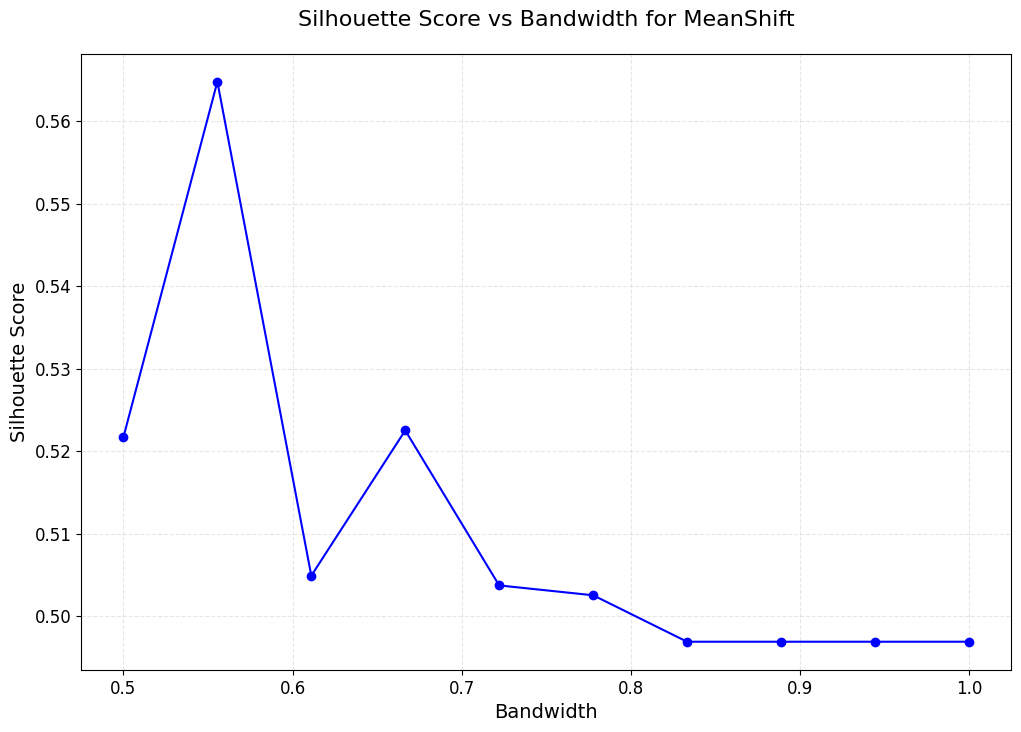

[SUCCESS] Silhouette score plot saved to 'silhouette_scores.png'


In [27]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

def perform_clustering(data, bandwidth):
    clustering = MeanShift(bandwidth=bandwidth)
    clustering.fit(data)
    return clustering

def find_best_bandwidth(data, bandwidth_values):
    best_score = -1
    best_bandwidth = None
    scores = []
    errors = []
    total_bandwidths = len(bandwidth_values)

    print("[INFO] Starting bandwidth optimization for MeanShift clustering...")
    for i, bandwidth in enumerate(bandwidth_values, 1):
        print(f"[INFO] Testing {i:02d}/{total_bandwidths:02d}: Bandwidth = {bandwidth:.3f}")
        try:
            meanshift = MeanShift(bandwidth=bandwidth)
            cluster_labels = meanshift.fit_predict(data)
            num_labels = len(np.unique(cluster_labels))
            if 2 <= num_labels < len(data):
                score = silhouette_score(data, cluster_labels)
                scores.append(score)
                print(f"[SUCCESS] Silhouette Score = {score:.3f}")
                if score > best_score:
                    best_score = score
                    best_bandwidth = bandwidth
            else:
                scores.append(-1)
                print(f"[WARN] Resulted in {num_labels} clusters, not suitable for silhouette score")
        except Exception as e:
            scores.append(-1)
            errors.append(f"[ERROR] Bandwidth = {bandwidth:.3f} failed: {e}")
            print(f"[ERROR] Failed: {e}")

    return best_bandwidth, best_score, scores, errors

if 'data_tsne' not in globals() or data_tsne.size == 0:
    print("[ERROR] 'data_tsne' is not defined or empty. Please prepare data first.")
else:
    bandwidth_values = np.linspace(0.5, 1, 10)
    best_bandwidth, best_score, scores, errors = find_best_bandwidth(data_tsne, bandwidth_values)

    print("\n[INFO] Bandwidth Optimization Summary:")
    print(f"{'Bandwidth':<12} | {'Silhouette Score'}")
    print("-" * 30)
    for bw, score in zip(bandwidth_values, scores):
        score_str = f"{score:.3f}" if score != -1 else "N/A"
        print(f"{bw:<12.3f} | {score_str}")

    if best_bandwidth is not None:
        print(f"\n[INFO] Best Bandwidth: {best_bandwidth:.3f}, Best Silhouette Score: {best_score:.3f}")
        print("[INFO] Applying MeanShift clustering with best bandwidth...")
        clustering = perform_clustering(data_tsne, best_bandwidth)
        cluster_labels = clustering.labels_
        print(f"[SUCCESS] Clustering completed: {len(np.unique(cluster_labels))} clusters identified")
        
        # Save cluster_labels
        np.save("cluster_labels.npy", cluster_labels)
        print(f"[INFO] Saved 'cluster_labels' to 'cluster_labels.npy'")
    else:
        print("[WARN] No valid bandwidth found")
        cluster_labels = np.array([])

    if errors:
        print("\n[ERROR SUMMARY]")
        print("\n".join(errors))

    if scores:
        print("[INFO] Generating silhouette score plot...")
        plt.figure(figsize=(12, 8))
        plt.plot(bandwidth_values, scores, marker='o', linestyle='-', color='b')
        plt.title('Silhouette Score vs Bandwidth for MeanShift', fontsize=16, pad=20)
        plt.xlabel('Bandwidth', fontsize=14)
        plt.ylabel('Silhouette Score', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.tick_params(axis='both', labelsize=12)
        output_plot_file = "silhouette_scores.png"
        plt.savefig(output_plot_file, bbox_inches='tight')
        plt.show()
        print(f"[SUCCESS] Silhouette score plot saved to '{output_plot_file}'")
    else:
        print("[WARN] No scores available to plot")

[INFO] Starting t-SNE clustering visualization...


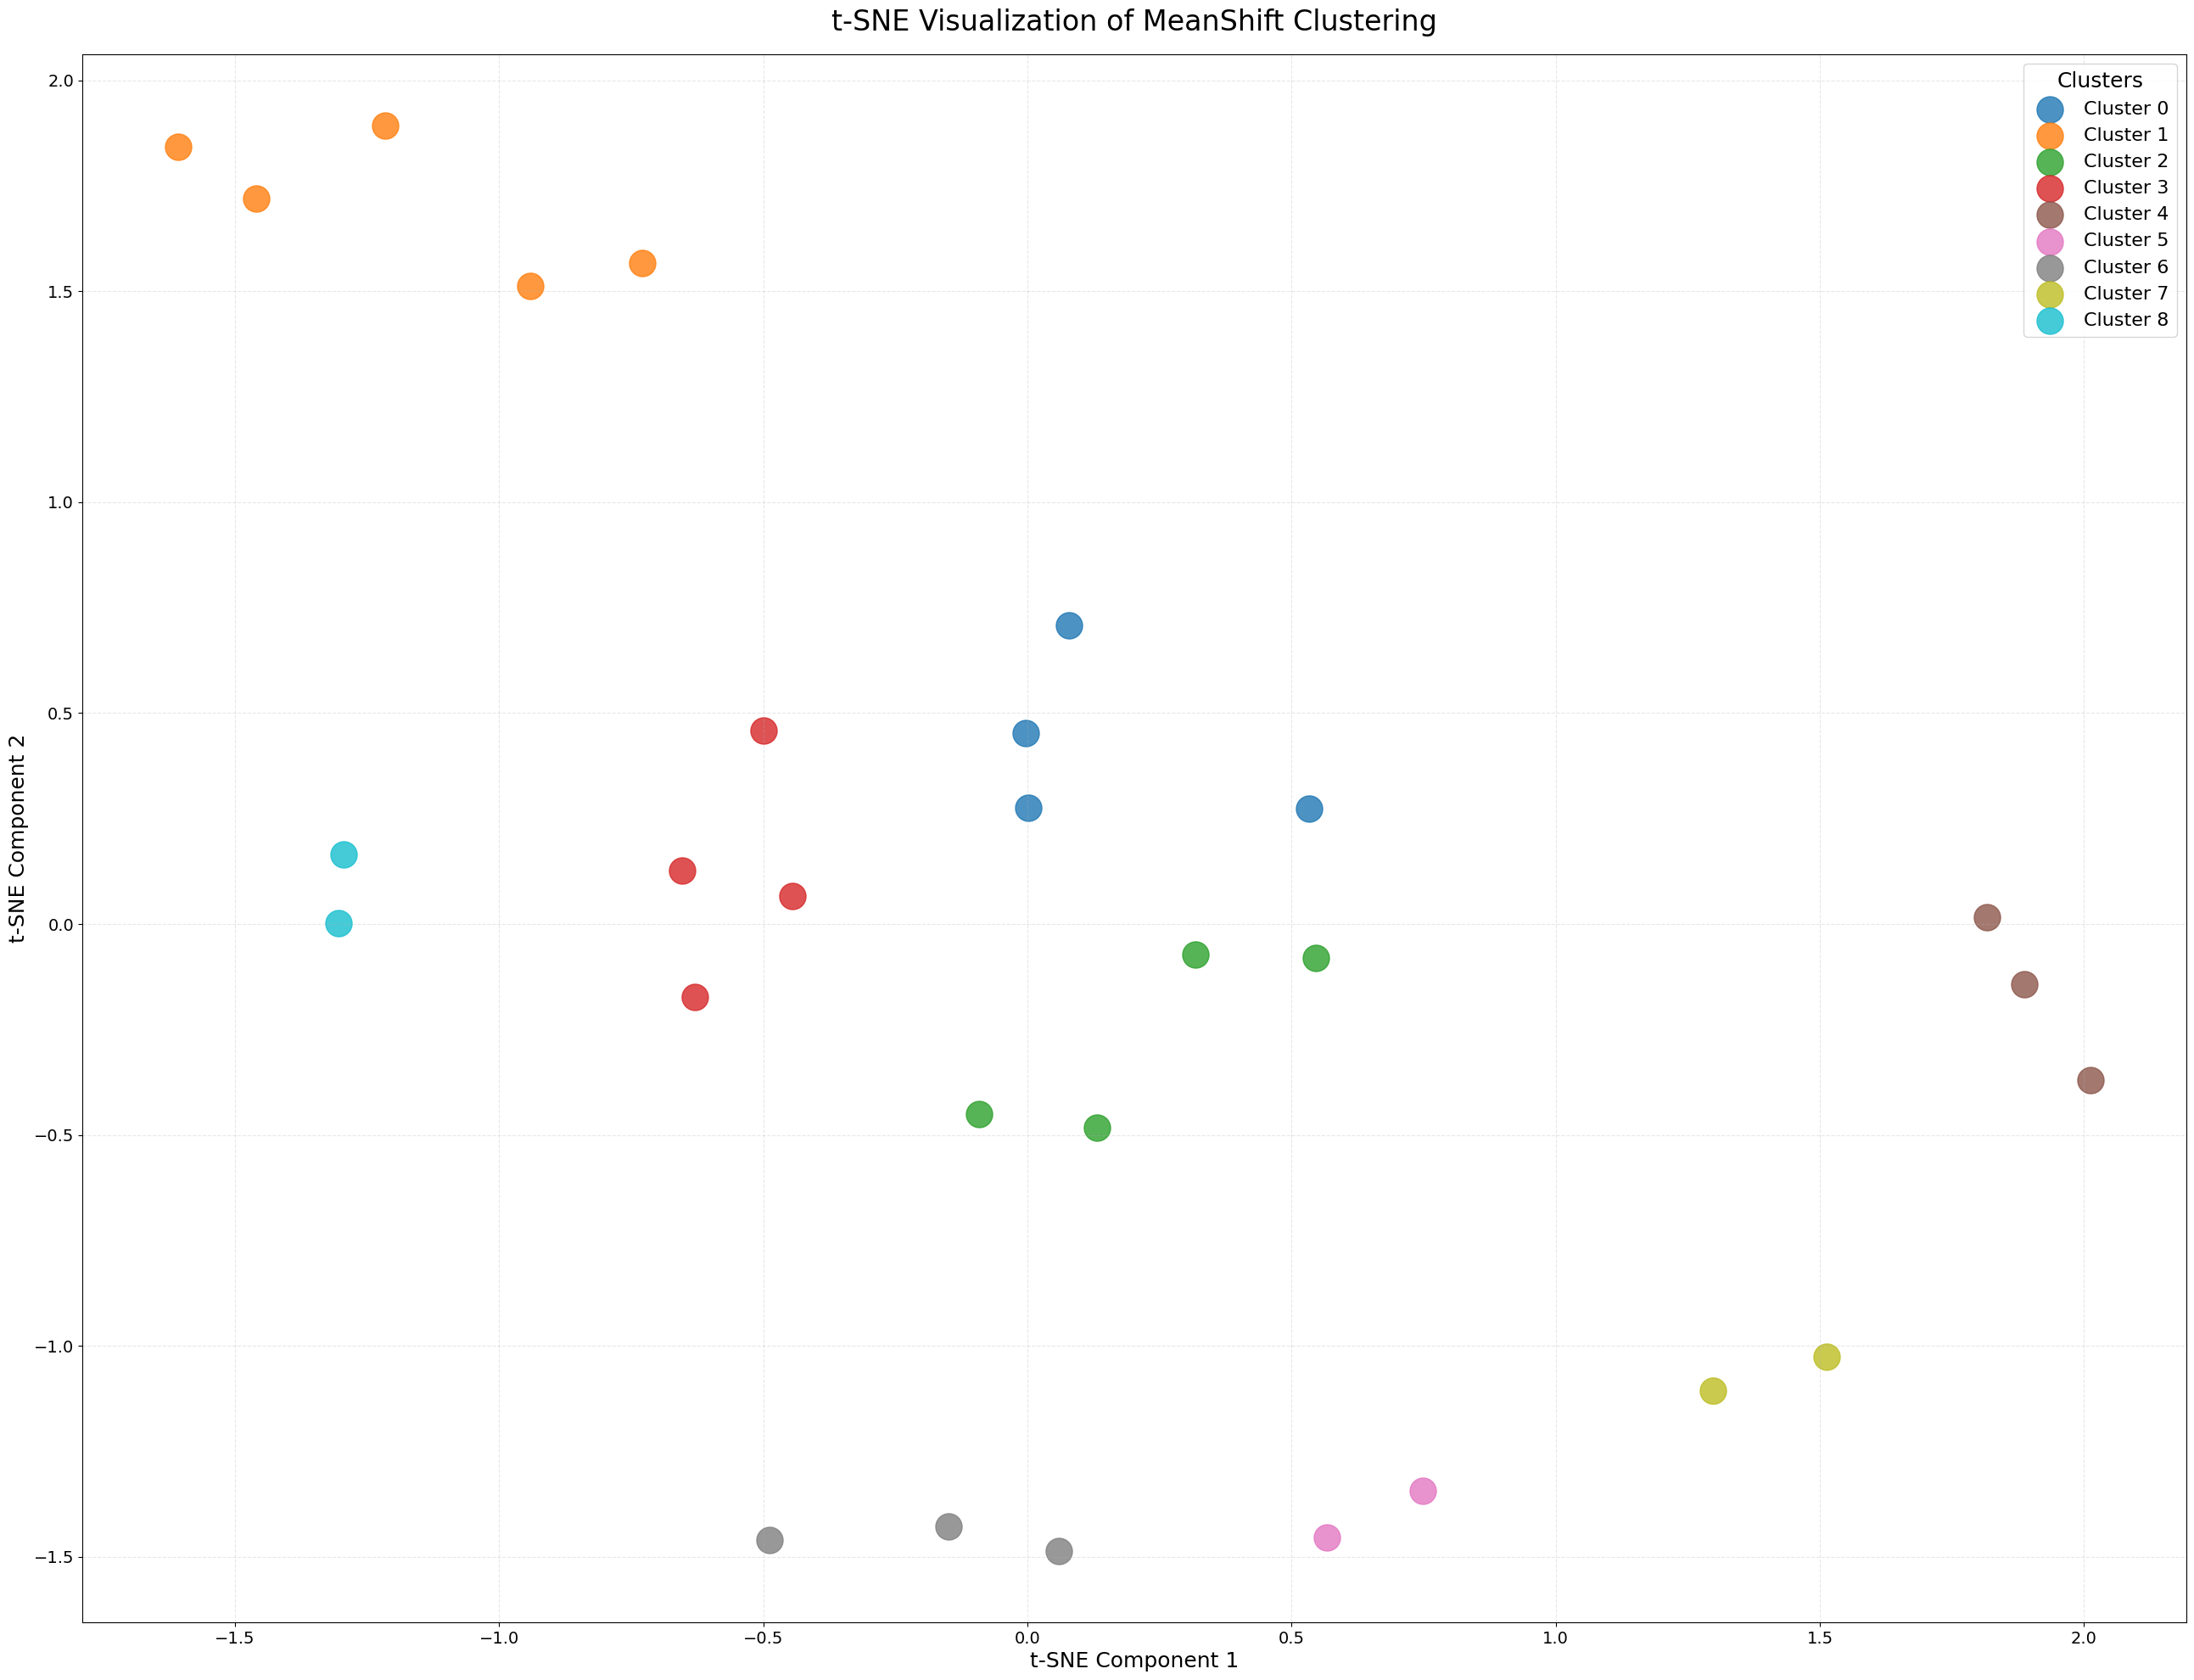

[SUCCESS] t-SNE clustering plot saved to 'tsne_clustering.png'

[INFO] Cluster Details with Community Texts:
Cluster      | Community                                | Text
----------------------------------------------------------------------------------------------------
Cluster 0          | Airship 11_text_graph_Community 8        | Operator heard an aircraft. operating about 1-1.5km away on neighbouring property NE of RPA launch site and made plans to. account for the aircraft.
Cluster 0          | Ayres S2R & RPAS_text_graph_Community 2  | After first load of fertiliser completed farmer notified Ayres pilot that an aircraft' would be operating over the Echo mine site.
Cluster 0          | Ayres S2R & RPAS_text_graph_Community 4  | Ayres S2R aircraft pilot commenced aerial agricultural operations on. property. Normal procedure was to. turn radio down to minimise. distractions during low level. operations
Cluster 0          | Ayres S2R & RPAS_text_graph_Community 8  | Operator heard 

In [28]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import json

# Attempt to load variables if missing
if 'data_tsne' not in globals() or 'cluster_labels' not in globals() or 'labels' not in globals():
    print("[WARN] One or more required variables are missing. Attempting to load from files...")
    try:
        if 'data_tsne' not in globals() and os.path.exists("data_tsne.npy"):
            data_tsne = np.load("data_tsne.npy")
            print("[INFO] Loaded 'data_tsne' from 'data_tsne.npy'")
        if 'cluster_labels' not in globals() and os.path.exists("cluster_labels.npy"):
            cluster_labels = np.load("cluster_labels.npy")
            print("[INFO] Loaded 'cluster_labels' from 'cluster_labels.npy'")
        if 'labels' not in globals() and os.path.exists("labels.json"):
            with open("labels.json", "r") as f:
                labels = json.load(f)
            print("[INFO] Loaded 'labels' from 'labels.json'")
    except Exception as e:
        print(f"[ERROR] Failed to load variables: {e}")

# Final check
if 'data_tsne' not in globals() or 'cluster_labels' not in globals() or 'labels' not in globals():
    print("[ERROR] Required variables are still missing. Please ensure prior cells are run:")
    if 'data_tsne' not in globals():
        print("  - 'data_tsne': Run the t-SNE preparation cell.")
    if 'cluster_labels' not in globals():
        print("  - 'cluster_labels': Run the MeanShift clustering cell.")
    if 'labels' not in globals():
        print("  - 'labels': Run the t-SNE preparation cell.")
else:
    print("[INFO] Starting t-SNE clustering visualization...")
    plt.figure(figsize=(32, 24))
    unique_labels = np.unique(cluster_labels)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))

    for label in unique_labels:
        cluster_points = data_tsne[cluster_labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {label}", c=[colors(label)], s=500, alpha=0.8)

    plt.title("t-SNE Visualization of MeanShift Clustering", fontsize=24, pad=20)
    plt.xlabel("t-SNE Component 1", fontsize=18)
    plt.ylabel("t-SNE Component 2", fontsize=18)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    plt.legend(fontsize=16, loc='upper right', title="Clusters", title_fontsize=18)
    plt.grid(True, linestyle='--', alpha=0.3)

    output_plot_file = "tsne_clustering.png"
    plt.savefig(output_plot_file, bbox_inches='tight')
    plt.show()
    print(f"[SUCCESS] t-SNE clustering plot saved to '{output_plot_file}'")

    clusters = {i: [] for i in range(len(unique_labels))}
    for idx, cluster_label in enumerate(cluster_labels):
        clusters[cluster_label].append(labels[idx])

    print("\n[INFO] Cluster Details with Community Texts:")
    print(f"{'Cluster':<12} | {'Community':<40} | {'Text'}")
    print("-" * 100)
    try:
        for cluster_label, communities in clusters.items():
            for community in communities:
                parts = community.split('_', 1)
                if len(parts) == 2:
                    graph_name, comm_str = parts
                    community_number = comm_str.split()[-1]
                    community_text = rectangle_text_mapping.get(community_number, f"[Text not found for {community_number}]") if 'rectangle_text_mapping' in globals() else "[Text mapping not available]"
                    print(f"Cluster {cluster_label:<10} | {community:<40} | {community_text}")
                else:
                    print(f"Cluster {cluster_label:<10} | {community:<40} | [Invalid label format]")
    except Exception as e:
        print(f"[ERROR] Failed to process cluster details: {e}")

    print("\n[INFO] Clustering Summary:")
    print(f"{'Cluster':<12} | {'Community Count'}")
    print("-" * 30)
    for cluster_label, communities in clusters.items():
        print(f"Cluster {cluster_label:<10} | {len(communities)}")
    print(f"\n[SUCCESS] Processed {len(unique_labels)} clusters with {len(labels)} total communities")